In [146]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import t
import numpy as np
import seaborn as sns


In [147]:
df_human_generated = pd.read_csv('human_generated.csv')
df_model_generated = pd.read_csv('model_generated.csv')
df_baseline_generated = pd.read_csv('baseline_generated.csv')

In [148]:
# drop the email columns for privacy
df_human_generated = df_human_generated.drop(columns=['Email address'])
df_model_generated = df_model_generated.drop(columns=['Email address'])
df_baseline_generated = df_baseline_generated.drop(columns=['Email address'])

In [149]:
df_baseline_generated

x` What is your age range? What is your gender?  \
0   20/08/2024 17:50:47                   25-34                 Male   
1   22/08/2024 15:06:02                   25-34                 Male   
2   23/08/2024 17:26:27                   25-34                 Male   
3   23/08/2024 23:55:27                   25-34                 Male   
4   25/08/2024 23:11:12                   25-34                 Male   
5   28/08/2024 12:28:44                   25-34               Female   
6   28/08/2024 12:38:40                   25-34                 Male   
7   30/08/2024 20:42:07                   25-34                 Male   
8   31/08/2024 18:26:22                   25-34                 Male   
9   02/09/2024 09:06:45                   25-34                 Male   
10  04/09/2024 01:00:08                   18-24                 Male   

   What is the highest level of education you have completed?  \
0                                   Bachelor's degree           
1                                   Bachelor's degree           
2                                        Some college           
3                                     Master's degree           
4                                   Bachelor's degree           
5                                   Bachelor's degree           
6                                   Bachelor's degree           
7                                   Bachelor's degree           
8                                   Bachelor's degree           
9                                     Master's degree           
10                                  Bachelor's degree           

   What is the highest level of English proficiency you have achieved?  \
0                                       C1 (Advanced)                    
1                                       C1 (Advanced)                    
2                                       C1 (Advanced)                    
3                                       C1 (Advanced)                    
4                                   B1 (Intermediate)                    
5                                       C1 (Advanced)                    
6                                     C2 (Proficient)                    
7                                       C1 (Advanced)                    
8                                       C1 (Advanced)                    
9                                       C1 (Advanced)                    
10                                      C1 (Advanced)                    

   Please read the following document called League of Legends Solo Queue Ranked Games carefully:\n\n"League of Legends is a multiplayer online battle arena where two teams, blue and red, face off. There are three lanes, a jungle, and five roles. The goal is to take down the enemy Nexus to win the game.\n\nThis dataset contains statistics of ranked games from a Platinum Elo. Each game is unique and can be identified by its gameId, which can be used to fetch more attributes from the Riot API. Each game has features from different time frames, from ten minutes to the end of the game. For example, game one at ten minutes, game one at twelve minutes, game one at fourteen minutes, and so on. In total, there are over two hundred forty thousand game frames. There are fifty-five features collected for the Blue team, including kills, deaths, gold, experience, and level. It is up to the user to do some feature engineering to get more insights."\n\n\nNow, examine the list of tags below. One of these tags is an 'intruder' that doesn't belong with the other tags. Please identify this intruder tag:  \
0                                       Advertisement                                                                                                                                                                                                                                                                                                                                        

In [150]:
df_model_generated

Timestamp What is your age range? What is your gender?  \
0  21/08/2024 00:11:58                   25-34                 Male   
1  22/08/2024 14:50:41                   25-34                 Male   
2  23/08/2024 17:43:45                   25-34                 Male   
3  23/08/2024 23:59:49                   25-34                 Male   
4  26/08/2024 10:39:31                   25-34                 Male   
5  28/08/2024 12:44:15                   25-34               Female   
6  30/08/2024 20:42:09                   25-34                 Male   
7  01/09/2024 15:24:34                   25-34                 Male   
8  02/09/2024 23:44:59                   18-24                 Male   

  What is the highest level of education you have completed?  \
0                                  Bachelor's degree           
1                                  Bachelor's degree           
2                                       Some college           
3                                    Master's degree           
4                                  Bachelor's degree           
5                                  Bachelor's degree           
6                                  Bachelor's degree           
7                                  Bachelor's degree           
8                                  Bachelor's degree           

  What is the highest level of English proficiency you have achieved?  \
0                                      C1 (Advanced)                    
1                                      C1 (Advanced)                    
2                                      C1 (Advanced)                    
3                                      C1 (Advanced)                    
4                                  B1 (Intermediate)                    
5                                      C1 (Advanced)                    
6                                  Bachelor's degree                    
7                                      C1 (Advanced)                    
8                                      C1 (Advanced)                    

  Please read the following document called League of Legends Solo Queue Ranked Games carefully:\n\n"League of Legends is a multiplayer online battle arena where two teams, blue and red, face off. There are three lanes, a jungle, and five roles. The goal is to take down the enemy Nexus to win the game.\n\nThis dataset contains statistics of ranked games from a Platinum Elo. Each game is unique and can be identified by its gameId, which can be used to fetch more attributes from the Riot API. Each game has features from different time frames, from ten minutes to the end of the game. For example, game one at ten minutes, game one at twelve minutes, game one at fourteen minutes, and so on. In total, there are over two hundred forty thousand game frames. There are fifty-five features collected for the Blue team, including kills, deaths, gold, experience, and level. It is up to the user to do some feature engineering to get more insights."\n\n\nNow, examine the list of tags below. One of these tags is an 'intruder' that doesn't belong with the other tags. Please identify this intruder tag:  \
0                                              Chess                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [151]:
new_column_names = [
    # 'timestamp', 'email', 'age_range', 'gender', 'education', 'english_prof',
    'timestamp', 'age_range', 'gender', 'education', 'english_prof',
    'lol_game_desc', 'tag_lol', 'tag_video_games', 'tag_multiplayer', 'tag_game_data',
    'tag_riot_api', 'tag_battle_arena', 'spec_lol', 'spec_video_games', 'spec_multiplayer',
    'spec_game_data', 'spec_riot_api', 'spec_battle_arena', 'tags_coverage_lol',
    'suggested_tags_lol', 'forex_desc', 'tag_hist_price', 'tag_forex', 'tag_usd_jpy',
    'tag_currency_pairs', 'tag_yearly_data', 'tag_finance', 'tag_minute_high',
    'spec_hist_price', 'spec_forex', 'spec_usd_jpy', 'spec_currency_pairs',
    'spec_yearly_data', 'spec_finance', 'spec_minute_high', 'tags_coverage_forex',
    'suggested_tags_forex', 'lung_cancer_desc', 'tag_lung_cancer', 'tag_cancer',
    'tag_oncology', 'tag_mrna_prof', 'tag_biology', 'tag_carcinomas', 'tag_gene_expr',
    'spec_lung_cancer', 'spec_cancer', 'spec_oncology', 'spec_mrna_prof', 'spec_biology',
    'spec_carcinomas', 'spec_gene_expr', 'tags_coverage_lung', 'suggested_tags_lung',
    'colleges_desc', 'common_tags1', 'common_tags_coverage1', 'suggested_common_tags1',
    'common_tags2', 'common_tags_coverage2', 'suggested_common_tags2'
]

df_human_generated.columns = new_column_names
df_human_generated.columns

Index(['timestamp', 'age_range', 'gender', 'education', 'english_prof',
       'lol_game_desc', 'tag_lol', 'tag_video_games', 'tag_multiplayer',
       'tag_game_data', 'tag_riot_api', 'tag_battle_arena', 'spec_lol',
       'spec_video_games', 'spec_multiplayer', 'spec_game_data',
       'spec_riot_api', 'spec_battle_arena', 'tags_coverage_lol',
       'suggested_tags_lol', 'forex_desc', 'tag_hist_price', 'tag_forex',
       'tag_usd_jpy', 'tag_currency_pairs', 'tag_yearly_data', 'tag_finance',
       'tag_minute_high', 'spec_hist_price', 'spec_forex', 'spec_usd_jpy',
       'spec_currency_pairs', 'spec_yearly_data', 'spec_finance',
       'spec_minute_high', 'tags_coverage_forex', 'suggested_tags_forex',
       'lung_cancer_desc', 'tag_lung_cancer', 'tag_cancer', 'tag_oncology',
       'tag_mrna_prof', 'tag_biology', 'tag_carcinomas', 'tag_gene_expr',
       'spec_lung_cancer', 'spec_cancer', 'spec_oncology', 'spec_mrna_prof',
       'spec_biology', 'spec_carcinomas', 'spec_gene_expr'

In [152]:
new_column_names = [
    # 'timestamp', 'email', 'age_range', 'gender', 'education', 'english_prof',
    'timestamp', 'age_range', 'gender', 'education', 'english_prof',
    'lol_game_desc', 'tag_ranked_matches', 'tag_games', 'tag_league_of_legends',
    'tag_game_data_analysis', 'tag_computer_games', 'tag_gaming', 'tag_esports',
    'spec_ranked_matches', 'spec_games', 'spec_league_of_legends',
    'spec_game_data_analysis', 'spec_computer_games', 'spec_gaming', 'spec_esports',
    'tags_coverage_lol', 'suggested_tags_lol',
    'forex_desc', 'tag_historical_price_data', 'tag_minute_interval',
    'tag_historical_data', 'tag_forex', 'tag_candlestick', 'tag_minute', 'tag_high',
    'spec_historical_price_data', 'spec_minute_interval', 'spec_historical_data',
    'spec_forex', 'spec_candlestick', 'spec_minute', 'spec_high',
    'tags_coverage_forex', 'suggested_tags_forex',
    'lung_cancer_desc', 'tag_lung_cancer', 'tag_cancer', 'tag_science',
    'tag_cancer_research', 'tag_biology', 'tag_medicine', 'tag_health',
    'spec_lung_cancer', 'spec_cancer', 'spec_science', 'spec_cancer_research',
    'spec_biology', 'spec_medicine', 'spec_health',
    'tags_coverage_lung', 'suggested_tags_lung',
    'colleges_desc', 'common_tags1', 'common_tags_coverage1', 'suggested_common_tags1',
    'common_tags2', 'common_tags_coverage2', 'suggested_common_tags2'
]

df_model_generated.columns = new_column_names
df_model_generated.columns

Index(['timestamp', 'age_range', 'gender', 'education', 'english_prof',
       'lol_game_desc', 'tag_ranked_matches', 'tag_games',
       'tag_league_of_legends', 'tag_game_data_analysis', 'tag_computer_games',
       'tag_gaming', 'tag_esports', 'spec_ranked_matches', 'spec_games',
       'spec_league_of_legends', 'spec_game_data_analysis',
       'spec_computer_games', 'spec_gaming', 'spec_esports',
       'tags_coverage_lol', 'suggested_tags_lol', 'forex_desc',
       'tag_historical_price_data', 'tag_minute_interval',
       'tag_historical_data', 'tag_forex', 'tag_candlestick', 'tag_minute',
       'tag_high', 'spec_historical_price_data', 'spec_minute_interval',
       'spec_historical_data', 'spec_forex', 'spec_candlestick', 'spec_minute',
       'spec_high', 'tags_coverage_forex', 'suggested_tags_forex',
       'lung_cancer_desc', 'tag_lung_cancer', 'tag_cancer', 'tag_science',
       'tag_cancer_research', 'tag_biology', 'tag_medicine', 'tag_health',
       'spec_lung_cancer',

In [153]:
new_column_names = [
    # 'timestamp', 'email', 'age_range', 'gender', 'education', 'english_prof',
    'timestamp', 'age_range', 'gender', 'education', 'english_prof',
    'lol_game_desc', 'tag_turret', 'tag_lost', 'tag_destroyed', 'tag_impressions',
    'tag_clicking', 'tag_cost', 'tag_advertisement', 'spec_turret', 'spec_lost',
    'spec_destroyed', 'spec_advertisement', 'spec_impressions', 'spec_clicking',
    'spec_cost', 'tags_coverage_lol', 'suggested_tags_lol',
    'forex_desc', 'tag_thyrotropin', 'tag_minute', 'tag_usd', 'tag_releasing',
    'tag_high', 'tag_bid', 'tag_ask', 'spec_thyrotropin', 'spec_minute', 'spec_usd',
    'spec_releasing', 'spec_high', 'spec_bid', 'spec_ask',
    'tags_coverage_forex', 'suggested_tags_forex',
    'lung_cancer_desc', 'tag_cancer', 'tag_microarray', 'tag_prostate',
    'tag_ovarian', 'tag_gliomas', 'tag_lung', 'tag_genes',
    'spec_cancer', 'spec_microarray', 'spec_prostate', 'spec_ovarian',
    'spec_gliomas', 'spec_lung', 'spec_genes',
    'tags_coverage_lung', 'suggested_tags_lung',
    'colleges_desc', 'common_tags1', 'common_tags_coverage1', 'suggested_common_tags1',
    'common_tags2', 'common_tags_coverage2', 'suggested_common_tags2'
]

df_baseline_generated.columns = new_column_names
df_baseline_generated.columns

Index(['timestamp', 'age_range', 'gender', 'education', 'english_prof',
       'lol_game_desc', 'tag_turret', 'tag_lost', 'tag_destroyed',
       'tag_impressions', 'tag_clicking', 'tag_cost', 'tag_advertisement',
       'spec_turret', 'spec_lost', 'spec_destroyed', 'spec_advertisement',
       'spec_impressions', 'spec_clicking', 'spec_cost', 'tags_coverage_lol',
       'suggested_tags_lol', 'forex_desc', 'tag_thyrotropin', 'tag_minute',
       'tag_usd', 'tag_releasing', 'tag_high', 'tag_bid', 'tag_ask',
       'spec_thyrotropin', 'spec_minute', 'spec_usd', 'spec_releasing',
       'spec_high', 'spec_bid', 'spec_ask', 'tags_coverage_forex',
       'suggested_tags_forex', 'lung_cancer_desc', 'tag_cancer',
       'tag_microarray', 'tag_prostate', 'tag_ovarian', 'tag_gliomas',
       'tag_lung', 'tag_genes', 'spec_cancer', 'spec_microarray',
       'spec_prostate', 'spec_ovarian', 'spec_gliomas', 'spec_lung',
       'spec_genes', 'tags_coverage_lung', 'suggested_tags_lung',
       'coll

# Filter out failed attention check answers

In [154]:
# filter out rows and record how many rows are dropped and left, filter out where colleges_desc is not "Social Science"
print("Before filtering: ", df_baseline_generated.shape, df_model_generated.shape, df_human_generated.shape)
df_baseline_generated = df_baseline_generated[df_baseline_generated['colleges_desc'] == "Social Science"]
df_model_generated = df_model_generated[df_model_generated['colleges_desc'] == "Social Science"]
df_human_generated = df_human_generated[df_human_generated['colleges_desc'] == "Social Science"]
print("After filtering: ", df_baseline_generated.shape, df_model_generated.shape, df_human_generated.shape)

Before filtering:  (11, 63) (9, 63) (11, 61)
After filtering:  (11, 63) (9, 63) (11, 61)


In [155]:
df_baseline_generated

timestamp age_range  gender          education  \
0   20/08/2024 17:50:47     25-34    Male  Bachelor's degree   
1   22/08/2024 15:06:02     25-34    Male  Bachelor's degree   
2   23/08/2024 17:26:27     25-34    Male       Some college   
3   23/08/2024 23:55:27     25-34    Male    Master's degree   
4   25/08/2024 23:11:12     25-34    Male  Bachelor's degree   
5   28/08/2024 12:28:44     25-34  Female  Bachelor's degree   
6   28/08/2024 12:38:40     25-34    Male  Bachelor's degree   
7   30/08/2024 20:42:07     25-34    Male  Bachelor's degree   
8   31/08/2024 18:26:22     25-34    Male  Bachelor's degree   
9   02/09/2024 09:06:45     25-34    Male    Master's degree   
10  04/09/2024 01:00:08     18-24    Male  Bachelor's degree   

         english_prof  lol_game_desc           tag_turret  \
0       C1 (Advanced)  Advertisement    2 - Somewhat well   
1       C1 (Advanced)      Passenger    2 - Somewhat well   
2       C1 (Advanced)      Passenger        4 - Very well   
3       C1 (Advanced)  Advertisement    2 - Somewhat well   
4   B1 (Intermediate)      Passenger       1 - Not at all   
5       C1 (Advanced)      Passenger        4 - Very well   
6     C2 (Proficient)      Passenger    2 - Somewhat well   
7       C1 (Advanced)  Advertisement       1 - Not at all   
8       C1 (Advanced)  Advertisement  3 - Moderately well   
9       C1 (Advanced)      Passenger   5 - Extremely well   
10      C1 (Advanced)      Passenger  3 - Moderately well   

               tag_lost        tag_destroyed    tag_impressions  ...  \
0   3 - Moderately well    2 - Somewhat well     1 - Not at all  ...   
1        1 - Not at all       1 - Not at all     1 - Not at all  ...   
2   3 - Moderately well        4 - Very well  2 - Somewhat well  ...   
3   3 - Moderately well  3 - Moderately well     1 - Not at all  ...   
4   3 - Moderately well  3 - Moderately well     1 - Not at all  ...   
5   3 - Moderately well        4 - Very well  2 - Somewhat well  ...   
6     2 - Somewhat well    2 - Somewhat well     1 - Not at all  ...   
7     2 - Somewhat well       1 - Not at all     1 - Not at all  ...   
8     2 - Somewhat well    2 - Somewhat well     1 - Not at all  ...   
9    5 - Extremely well   5 - Extremely well      4 - Very well  ...   
10    2 - Somewhat well    2 - Somewhat well     1 - Not at all  ...   

                                         spec_genes tags_coverage_lung  \
0                              4 - Somewhat general                  4   
1                                      3 - Balanced                  2   
2                             2 - Somewhat specific                  3   
3                              4 - Somewhat general                  4   
4   5 - Very general, could apply to many documents                  2   
5                             2 - Somewhat specific                  4   
6                             2 - Somewhat specific                  4   
7   5 - Very general, could apply to many documents                  2   
8                                      3 - Balanced                  4   
9                1 - Very specific to this document                  5   
10                             4 - Somewhat general                  3   

                                  suggested_tags_lung   colleges_desc  \
0   mRNA Expression Profiling, Lung Cancer, Adenoc...  Social Science   
1       Lung cancer, Medicine, Treatments (mRNA, etc)  Social Science   
2                                                 NaN  Social Science   
3   Captures cancer, lung, microarray, doesn't cap...  Social Science   
4    Lung cancer, classes, dataset,Potential targets,  Social Science   
5                    Adenocarcinoma, mRNA, subclasses  Social Science   
6                                               Stage  Social Science   
7                                                 NaN  Social Science   
8                                   Lung Cancer, mRNA  Social Science   
9                           

In [156]:
df_model_generated

timestamp age_range  gender          education  \
0  21/08/2024 00:11:58     25-34    Male  Bachelor's degree   
1  22/08/2024 14:50:41     25-34    Male  Bachelor's degree   
2  23/08/2024 17:43:45     25-34    Male       Some college   
3  23/08/2024 23:59:49     25-34    Male    Master's degree   
4  26/08/2024 10:39:31     25-34    Male  Bachelor's degree   
5  28/08/2024 12:44:15     25-34  Female  Bachelor's degree   
6  30/08/2024 20:42:09     25-34    Male  Bachelor's degree   
7  01/09/2024 15:24:34     25-34    Male  Bachelor's degree   
8  02/09/2024 23:44:59     18-24    Male  Bachelor's degree   

        english_prof lol_game_desc   tag_ranked_matches            tag_games  \
0      C1 (Advanced)         Chess   5 - Extremely well  3 - Moderately well   
1      C1 (Advanced)         Chess        4 - Very well  3 - Moderately well   
2      C1 (Advanced)         Chess  3 - Moderately well  3 - Moderately well   
3      C1 (Advanced)         Chess   5 - Extremely well        4 - Very well   
4  B1 (Intermediate)         Chess        4 - Very well        4 - Very well   
5      C1 (Advanced)         Chess   5 - Extremely well        4 - Very well   
6  Bachelor's degree         Chess        4 - Very well        4 - Very well   
7      C1 (Advanced)         Chess        4 - Very well        4 - Very well   
8      C1 (Advanced)         Chess        4 - Very well  3 - Moderately well   

  tag_league_of_legends tag_game_data_analysis  ...  \
0    5 - Extremely well          4 - Very well  ...   
1    5 - Extremely well          4 - Very well  ...   
2    5 - Extremely well      2 - Somewhat well  ...   
3    5 - Extremely well          4 - Very well  ...   
4    5 - Extremely well          4 - Very well  ...   
5    5 - Extremely well          4 - Very well  ...   
6    5 - Extremely well     5 - Extremely well  ...   
7    5 - Extremely well    3 - Moderately well  ...   
8    5 - Extremely well          4 - Very well  ...   

                                       spec_health tags_coverage_lung  \
0                             4 - Somewhat general                  4   
1  5 - Very general, could apply to many documents                  4   
2                             4 - Somewhat general                  4   
3                             4 - Somewhat general                  4   
4                             4 - Somewhat general                  4   
5  5 - Very general, could apply to many documents                  5   
6  5 - Very general, could apply to many documents                  2   
7                             4 - Somewhat general                  4   
8                             4 - Somewhat general                  4   

                                 suggested_tags_lung   colleges_desc  \
0  mRNA expression profiling, adenocarcinoma, lun...  Social Science   
1        carcinomas and/or mRNA profiling/treatement  Social Science   
2                                                NaN  Social Science   
3  mRNA expression profiling, gene expression pro...  Social Science   
4                        Lung cancer data, treatment  Social Science   
5                                                NaN  Social Science   
6                                                NaN  Social Science   
7                          mRNA Expression Profiling  Social Science   
8                                                NaN  Social Science   

                                        common_tags1 common_tags_coverage1  \
0  Coronavirus, Covid-19, Health, Science, Epidem...                     5   
1  Coronavirus, Covid-19, Time Series, Health, Sc...                     4   
2  Coronavirus, Health, Epidemiology, Country-Lev...                     4   
3  Coronavirus, Covid-19, Health, Science, Epidem...                     5   
4  Coronavirus, Covid-19, Health, Public Health, ...                     5   
5  Coronavirus, Covid-19, Health, Science, Epidem...                     5   
6  Coronavirus, Covid-19, Time S

In [157]:
df_human_generated

timestamp age_range  gender          education  \
0   21/08/2024 00:24:00     25-34    Male  Bachelor's degree   
1   22/08/2024 14:37:34     25-34    Male  Bachelor's degree   
2   23/08/2024 17:40:15     25-34    Male  Bachelor's degree   
3   23/08/2024 17:49:04     25-34    Male       Some college   
4   23/08/2024 23:48:01     25-34    Male    Master's degree   
5   25/08/2024 17:20:37     25-34    Male  Bachelor's degree   
6   28/08/2024 12:52:00     25-34  Female  Bachelor's degree   
7   30/08/2024 20:42:05     25-34    Male  Bachelor's degree   
8   01/09/2024 21:16:42     25-34    Male    Master's degree   
9   03/09/2024 20:02:55     18-24    Male  Bachelor's degree   
10  04/09/2024 17:58:31     25-34    Male  Bachelor's degree   

         english_prof lol_game_desc              tag_lol     tag_video_games  \
0       C1 (Advanced)         Chess   5 - Extremely well  5 - Extremely well   
1       C1 (Advanced)         Chess   5 - Extremely well       4 - Very well   
2       C1 (Advanced)         Chess   5 - Extremely well  5 - Extremely well   
3       C1 (Advanced)         Chess   5 - Extremely well       4 - Very well   
4       C1 (Advanced)         Chess   5 - Extremely well  5 - Extremely well   
5   B1 (Intermediate)         Chess        4 - Very well   2 - Somewhat well   
6       C1 (Advanced)         Chess        4 - Very well   2 - Somewhat well   
7       C1 (Advanced)         Chess   5 - Extremely well       4 - Very well   
8       C1 (Advanced)         Chess   5 - Extremely well  5 - Extremely well   
9       C1 (Advanced)         Chess   5 - Extremely well  5 - Extremely well   
10      C1 (Advanced)         Chess  3 - Moderately well   2 - Somewhat well   

        tag_multiplayer        tag_game_data  ...  \
0    5 - Extremely well   5 - Extremely well  ...   
1   3 - Moderately well   5 - Extremely well  ...   
2    5 - Extremely well   5 - Extremely well  ...   
3         4 - Very well        4 - Very well  ...   
4         4 - Very well        4 - Very well  ...   
5     2 - Somewhat well   5 - Extremely well  ...   
6   3 - Moderately well  3 - Moderately well  ...   
7         4 - Very well   5 - Extremely well  ...   
8    5 - Extremely well  3 - Moderately well  ...   
9         4 - Very well        4 - Very well  ...   
10    2 - Somewhat well   5 - Extremely well  ...   

                        spec_gene_expr tags_coverage_lung  \
0   1 - Very specific to this document                  5   
1                2 - Somewhat specific                  5   
2                 4 - Somewhat general                  5   
3                2 - Somewhat specific                  5   
4   1 - Very specific to this document                  4   
5                2 - Somewhat specific                  5   
6                2 - Somewhat specific                  3   
7                2 - Somewhat specific                  5   
8   1 - Very specific to this document                  5   
9   1 - Very specific to this document                  5   
10               2 - Somewhat specific                  4   

                            suggested_tags_lung   colleges_desc  \
0                                           NaN  Social Science   
1                                           NaN  Social Science   
2                                           NaN  Social Science   
3                                           NaN  Social Science   
4   cell signaling, metabolism, immune response  Social Science   
5                                           NaN  Social Science   
6                               Classifications  Social Science   
7                                           NaN  Social Science   
8                                           NaN  Social Science   
9                                           NaN  Social Science   
10                       Classification Dataset  Social Science   

                                         common_tags1 common_tags_coverage1  \
0   Coronavirus, Covid-19, Epi

In [158]:
df_baseline_generated

timestamp age_range  gender          education  \
0   20/08/2024 17:50:47     25-34    Male  Bachelor's degree   
1   22/08/2024 15:06:02     25-34    Male  Bachelor's degree   
2   23/08/2024 17:26:27     25-34    Male       Some college   
3   23/08/2024 23:55:27     25-34    Male    Master's degree   
4   25/08/2024 23:11:12     25-34    Male  Bachelor's degree   
5   28/08/2024 12:28:44     25-34  Female  Bachelor's degree   
6   28/08/2024 12:38:40     25-34    Male  Bachelor's degree   
7   30/08/2024 20:42:07     25-34    Male  Bachelor's degree   
8   31/08/2024 18:26:22     25-34    Male  Bachelor's degree   
9   02/09/2024 09:06:45     25-34    Male    Master's degree   
10  04/09/2024 01:00:08     18-24    Male  Bachelor's degree   

         english_prof  lol_game_desc           tag_turret  \
0       C1 (Advanced)  Advertisement    2 - Somewhat well   
1       C1 (Advanced)      Passenger    2 - Somewhat well   
2       C1 (Advanced)      Passenger        4 - Very well   
3       C1 (Advanced)  Advertisement    2 - Somewhat well   
4   B1 (Intermediate)      Passenger       1 - Not at all   
5       C1 (Advanced)      Passenger        4 - Very well   
6     C2 (Proficient)      Passenger    2 - Somewhat well   
7       C1 (Advanced)  Advertisement       1 - Not at all   
8       C1 (Advanced)  Advertisement  3 - Moderately well   
9       C1 (Advanced)      Passenger   5 - Extremely well   
10      C1 (Advanced)      Passenger  3 - Moderately well   

               tag_lost        tag_destroyed    tag_impressions  ...  \
0   3 - Moderately well    2 - Somewhat well     1 - Not at all  ...   
1        1 - Not at all       1 - Not at all     1 - Not at all  ...   
2   3 - Moderately well        4 - Very well  2 - Somewhat well  ...   
3   3 - Moderately well  3 - Moderately well     1 - Not at all  ...   
4   3 - Moderately well  3 - Moderately well     1 - Not at all  ...   
5   3 - Moderately well        4 - Very well  2 - Somewhat well  ...   
6     2 - Somewhat well    2 - Somewhat well     1 - Not at all  ...   
7     2 - Somewhat well       1 - Not at all     1 - Not at all  ...   
8     2 - Somewhat well    2 - Somewhat well     1 - Not at all  ...   
9    5 - Extremely well   5 - Extremely well      4 - Very well  ...   
10    2 - Somewhat well    2 - Somewhat well     1 - Not at all  ...   

                                         spec_genes tags_coverage_lung  \
0                              4 - Somewhat general                  4   
1                                      3 - Balanced                  2   
2                             2 - Somewhat specific                  3   
3                              4 - Somewhat general                  4   
4   5 - Very general, could apply to many documents                  2   
5                             2 - Somewhat specific                  4   
6                             2 - Somewhat specific                  4   
7   5 - Very general, could apply to many documents                  2   
8                                      3 - Balanced                  4   
9                1 - Very specific to this document                  5   
10                             4 - Somewhat general                  3   

                                  suggested_tags_lung   colleges_desc  \
0   mRNA Expression Profiling, Lung Cancer, Adenoc...  Social Science   
1       Lung cancer, Medicine, Treatments (mRNA, etc)  Social Science   
2                                                 NaN  Social Science   
3   Captures cancer, lung, microarray, doesn't cap...  Social Science   
4    Lung cancer, classes, dataset,Potential targets,  Social Science   
5                    Adenocarcinoma, mRNA, subclasses  Social Science   
6                                               Stage  Social Science   
7                                                 NaN  Social Science   
8                                   Lung Cancer, mRNA  Social Science   
9                           

# Intruder Detection

In [159]:
def intruder_detected(row, prefix, intruder_tag):
    tag_columns = [col for col in row.index if col.startswith(prefix)]
    return intruder_tag in row[tag_columns].values

def process_intruder_detection(df, intruder_dict, results_dict):
    for prefix, intruder in intruder_dict.items():
        detected_count = df.apply(intruder_detected, axis=1, args=(prefix, intruder)).sum()
        not_detected_count = len(df) - detected_count
        results_dict[prefix]['detected'] = detected_count
        results_dict[prefix]['not_detected'] = not_detected_count

baseline_intruders = {
    'lol_game_desc': 'Passenger',
    'forex_desc': 'Jump',
    'lung_cancer_desc': 'Piece',
}
baseline_results = {
    'lol_game_desc': {'detected': 0, 'not_detected': 0},
    'forex_desc': {'detected': 0, 'not_detected': 0},
    'lung_cancer_desc': {'detected': 0, 'not_detected': 0},
}

model_intruders = {
    'lol_game_desc': 'Chess',
    'forex_desc': 'Species',
    'lung_cancer_desc': 'Breast Cancer',
}
model_results = {
    'lol_game_desc': {'detected': 0, 'not_detected': 0},
    'forex_desc': {'detected': 0, 'not_detected': 0},
    'lung_cancer_desc': {'detected': 0, 'not_detected': 0},
}

human_intruders = {
    'lol_game_desc': 'Chess',
    'forex_desc': 'Species',
    'lung_cancer_desc': 'Breast Cancer',
}
human_results = {
    'lol_game_desc': {'detected': 0, 'not_detected': 0},
    'forex_desc': {'detected': 0, 'not_detected': 0},
    'lung_cancer_desc': {'detected': 0, 'not_detected': 0},
}

# Process intruder detection for each dataset
process_intruder_detection(df_baseline_generated, baseline_intruders, baseline_results)
process_intruder_detection(df_model_generated, model_intruders, model_results)
process_intruder_detection(df_human_generated, human_intruders, human_results)

print(baseline_results)
print(model_results)
print(human_results)

{'lol_game_desc': {'detected': 7, 'not_detected': 4}, 'forex_desc': {'detected': 0, 'not_detected': 11}, 'lung_cancer_desc': {'detected': 8, 'not_detected': 3}}
{'lol_game_desc': {'detected': 9, 'not_detected': 0}, 'forex_desc': {'detected': 8, 'not_detected': 1}, 'lung_cancer_desc': {'detected': 8, 'not_detected': 1}}
{'lol_game_desc': {'detected': 11, 'not_detected': 0}, 'forex_desc': {'detected': 11, 'not_detected': 0}, 'lung_cancer_desc': {'detected': 11, 'not_detected': 0}}


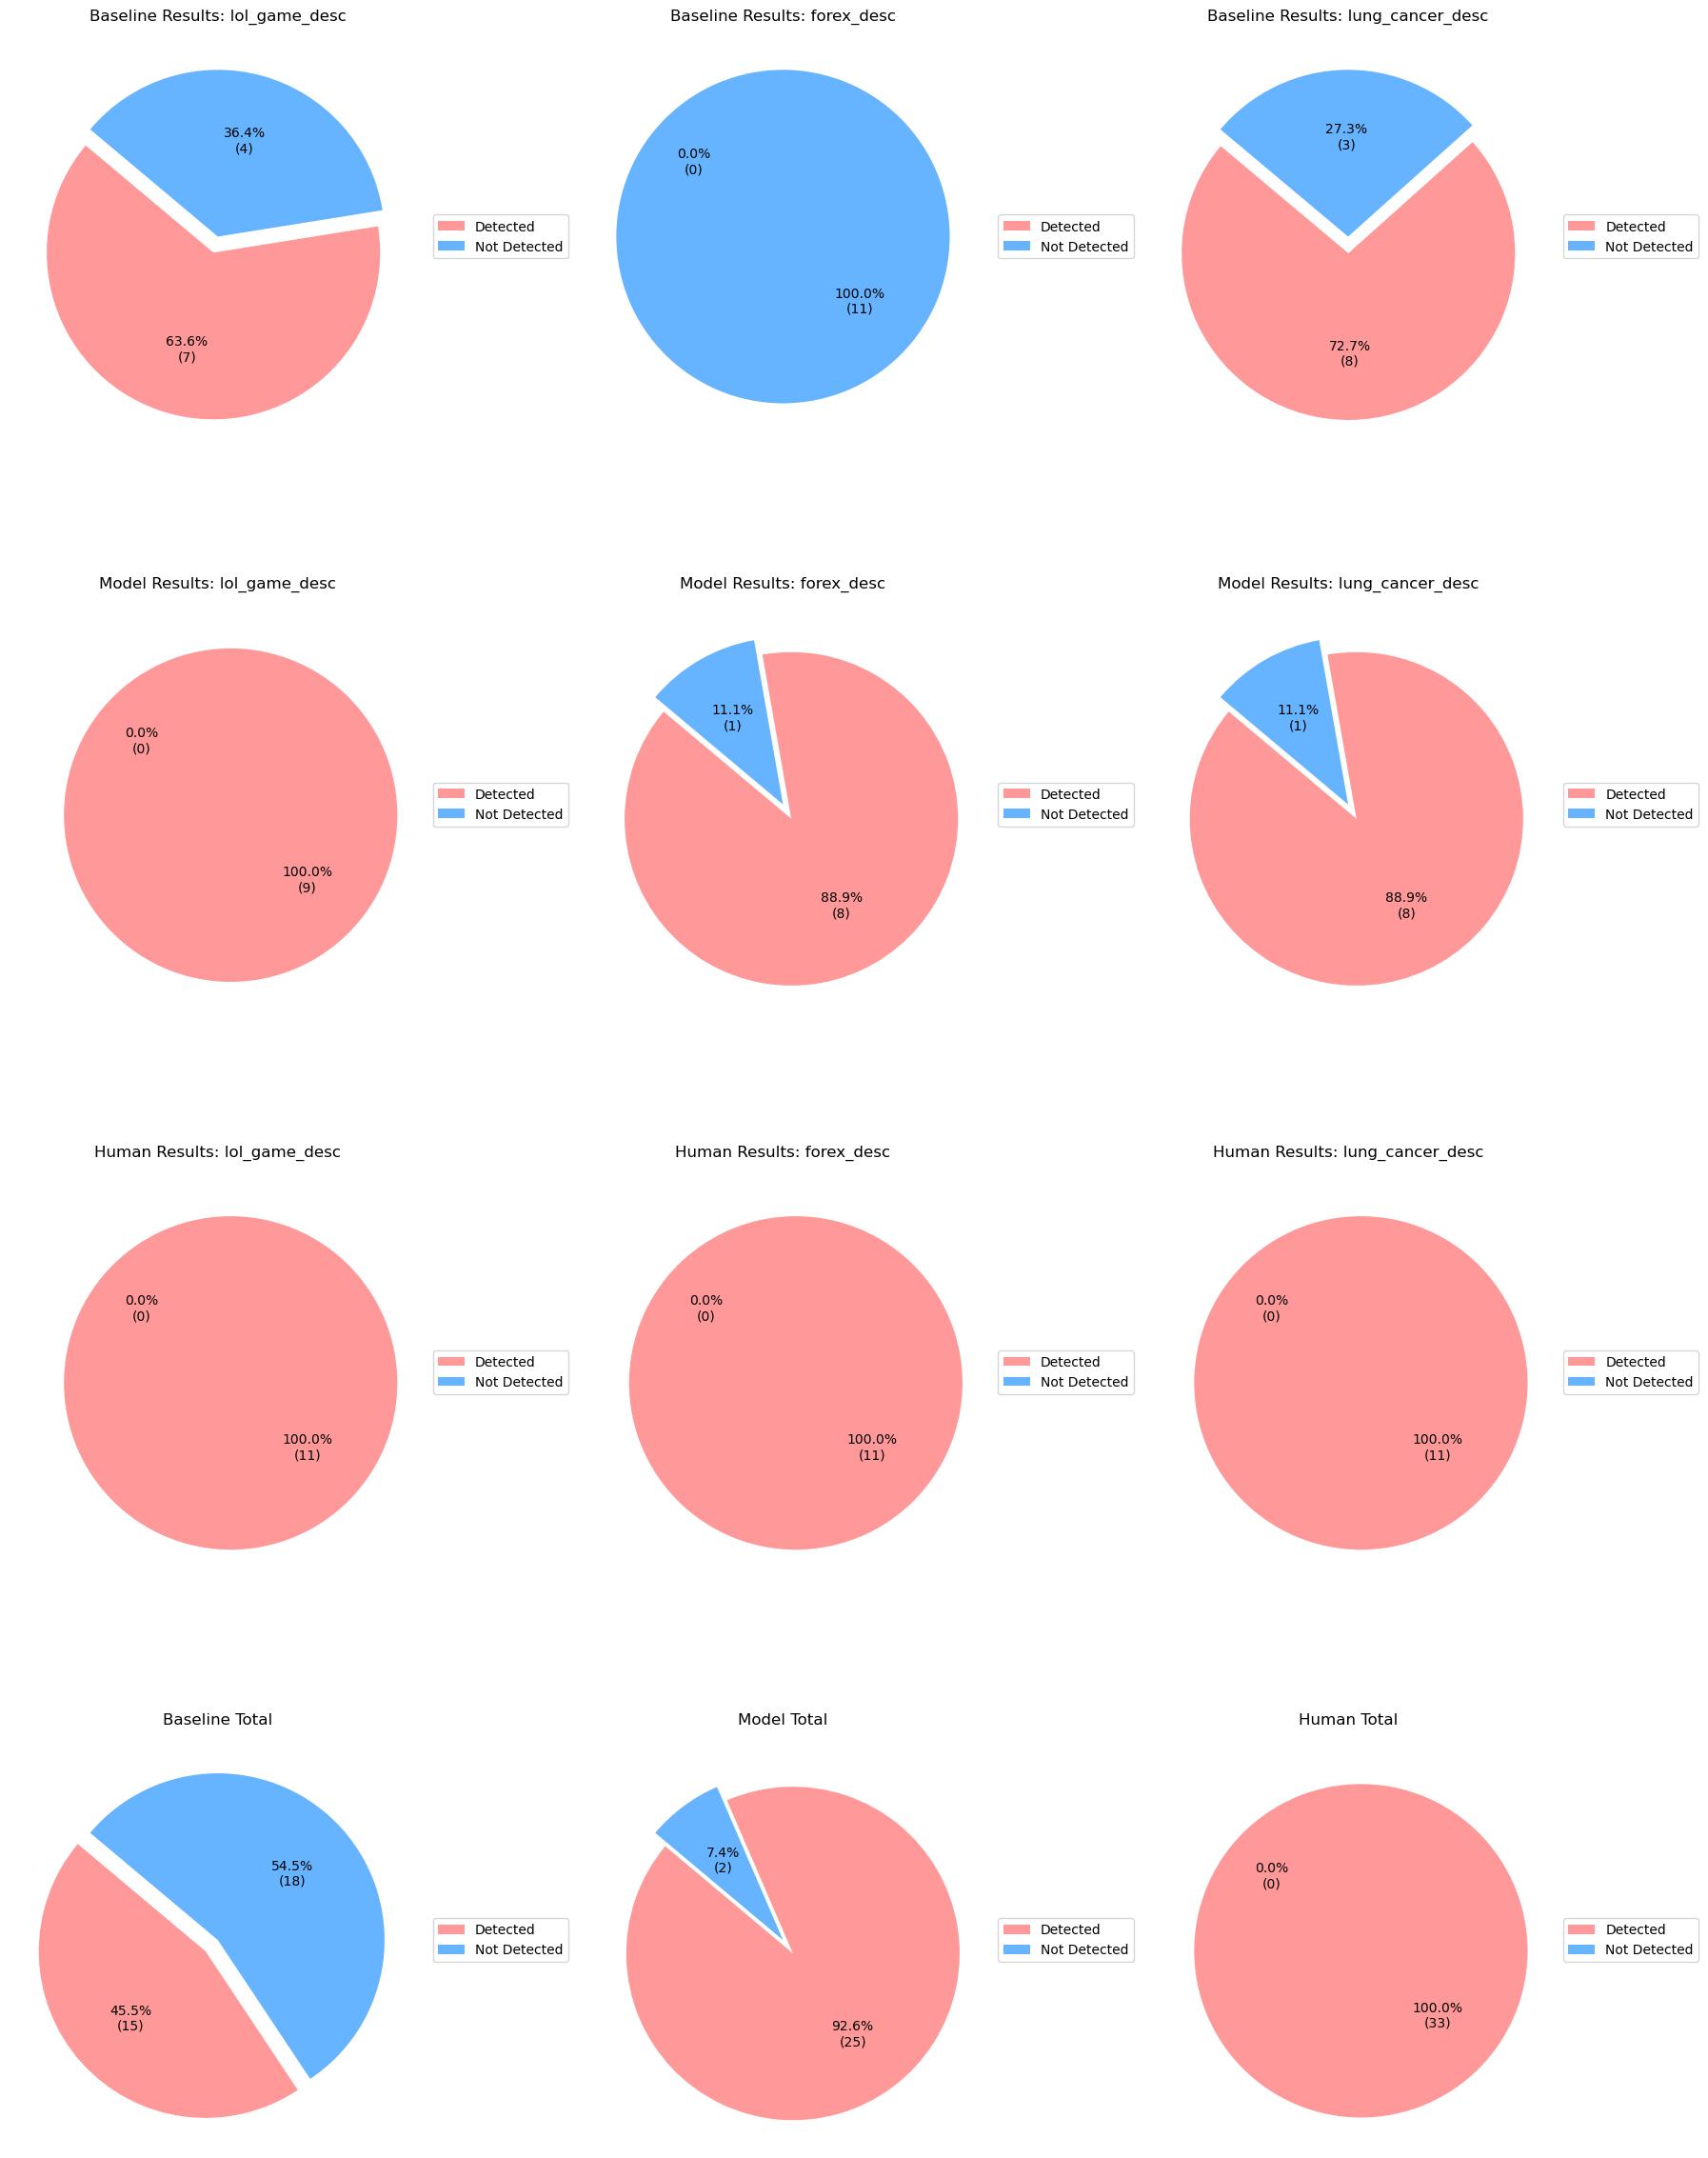

In [160]:
def plot_pie_charts_with_totals(baseline_results, model_results, human_results):
    # Calculate accumulated totals for each result set
    def calculate_totals(results_dict):
        total_detected = sum(result['detected'] for result in results_dict.values())
        total_not_detected = sum(result['not_detected'] for result in results_dict.values())
        return {'detected': total_detected, 'not_detected': total_not_detected}
    
    baseline_totals = calculate_totals(baseline_results)
    model_totals = calculate_totals(model_results)
    human_totals = calculate_totals(human_results)

    # Data for plotting
    pie_data = [
        (baseline_results, "Baseline Results"),
        (model_results, "Model Results"),
        (human_results, "Human Results")
    ]
    
    # Include totals
    total_data = [
        ({'Total': baseline_totals}, "Baseline Total"),
        ({'Total': model_totals}, "Model Total"),
        ({'Total': human_totals}, "Human Total"),
    ]

    # Set up the subplot grid
    fig, axs = plt.subplots(4, 3, figsize=(18, 24))  # 4 rows, 3 columns

    # Define labels, colors, and legend
    labels = ['Detected', 'Not Detected']
    colors = ['#ff9999', '#66b3ff']

    # Function to format the autopct to show both percentage and absolute number
    def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            absolute = int(round(pct / 100. * total))
            return f"{pct:.1f}%\n({absolute:d})"
        return my_format

    # Plot the detection results
    for i, (results_dict, title_prefix) in enumerate(pie_data):
        for j, (desc, result) in enumerate(results_dict.items()):
            ax = axs[i, j]
            
            sizes = [result['detected'], result['not_detected']]
            explode = (0.1, 0)  # explode the first slice (Detected)

            wedges, texts, autotexts = ax.pie(sizes, colors=colors, autopct=autopct_format(sizes), startangle=140, explode=explode)
            ax.set_title(f'{title_prefix}: {desc}')

            # Add legend to each pie chart
            ax.legend(wedges, labels, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

    # Plot the accumulated totals
    for j, (total_dict, title) in enumerate(total_data):
        ax = axs[3, j]
        result = total_dict['Total']
        
        sizes = [result['detected'], result['not_detected']]
        explode = (0.1, 0)  # explode the first slice (Detected)

        wedges, texts, autotexts = ax.pie(sizes, colors=colors, autopct=autopct_format(sizes), startangle=140, explode=explode)
        ax.set_title(title)

        # Add legend to each pie chart
        ax.legend(wedges, labels, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    
    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

# Plotting the pie charts
plot_pie_charts_with_totals(baseline_results, model_results, human_results)


# Average relevance score per tag, per set of tags for a document and overall + distribution per tag, per set of tags and overall

In [161]:
def analyze_tags(df, 
                 relevance_columns_list, 
                 spec_columns_list, 
                 coverage_columns_list, 
                 suggested_columns_list, 
                 common_tags_columns_1, 
                 common_tags_true_tags_1, 
                 common_tags_coverage_1,
                 common_tags_columns_2, 
                 common_tags_true_tags_2,
                 common_tags_coverage_2):
    
    # Lists to hold aggregated data across all documents
    all_relevance_data = []
    all_spec_data = []
    all_coverage_data = []

    # Iterate over each set of document columns
    for i, (relevance_columns, spec_columns, coverage_columns, suggested_columns) in enumerate(zip(relevance_columns_list, spec_columns_list, coverage_columns_list, suggested_columns_list)):
        print(f"\n--- Analyzing Document {i+1} ---")
        
        # Preprocess numerical columns to turn e.g. 3 - Moderately well into 3
        columns_to_preprocess = relevance_columns + spec_columns
        df = preprocess_numerical_columns(df, columns_to_preprocess)
        
        # Calculate and display distribution statistics
        def calculate_distribution(df, columns):
            return df[columns].agg(['std', 'min', 'max', 'mean'])

        # Document statistics
        document_dist_relevance = calculate_distribution(df, relevance_columns)
        document_dist_spec = calculate_distribution(df, spec_columns)
        
        print(f"Document {i+1} Relevance Distribution:")
        print(document_dist_relevance)
        print(f"Document {i+1} Specificity Distribution:")
        print(document_dist_spec)
        
        # Visualize distributions
        plot_scores_with_mean_std_ci_grid(df, relevance_columns, f'Document {i+1} - Raw Relevance Scores')
        plot_scores_with_mean_std_ci_grid(df, spec_columns, f'Document {i+1} - Raw Specificity Scores')
        plot_coverage_with_mean_std_grid(df, coverage_columns, f'Document {i+1} - Tag Coverage')

        # Calculate and visualize correlations
        calculate_and_plot_correlations(df, relevance_columns, spec_columns, coverage_columns)
        
        # Aggregate data for overall analysis
        all_relevance_data.extend(df[relevance_columns].values.flatten())
        all_spec_data.extend(df[spec_columns].values.flatten())
        all_coverage_data.extend(df[coverage_columns].values.flatten())

    # Convert aggregated data to NumPy arrays for easier processing
    all_relevance_data = np.array(all_relevance_data)
    all_spec_data = np.array(all_spec_data)
    all_coverage_data = np.array(all_coverage_data)
    
    # Plot aggregated relevance, specificity, and coverage scores
    plot_aggregated_scores(
        all_relevance_data, 
        all_spec_data, 
        all_coverage_data, 
        'Aggregated Scores Across All Documents'
    )
    
    # First pair common tags coverage
    plot_common_tags_coverage_with_stats(df, common_tags_coverage_1, 'First Pair Common Tags Coverage')

    # Second pair common tags coverage
    plot_common_tags_coverage_with_stats(df, common_tags_coverage_2, 'Second Pair Common Tags Coverage')

    # Compare common tags with true tags across all documents
    # First pair of common tags
    first_pair_common_tags = df[common_tags_columns_1].apply(lambda x: ', '.join(x.dropna()), axis=1)
    
    # Second pair of common tags
    second_pair_common_tags = df[common_tags_columns_2].apply(lambda x: ', '.join(x.dropna()), axis=1)
    
    # Calculate confusion matrix for the first pair using the first document's relevance columns
    first_pair_confusion_matrix = calculate_confusion_matrix(first_pair_common_tags, common_tags_true_tags_1, relevance_columns_list[0])
    
    # Calculate confusion matrix for the second pair using the second document's relevance columns
    second_pair_confusion_matrix = calculate_confusion_matrix(second_pair_common_tags, common_tags_true_tags_2, relevance_columns_list[1])
    
    # Calculate metrics for the first pair
    accuracy_1, precision_1, recall_1, f1_score_1 = calculate_metrics(first_pair_confusion_matrix)
    
    # Calculate metrics for the second pair
    accuracy_2, precision_2, recall_2, f1_score_2 = calculate_metrics(second_pair_confusion_matrix)
    
    # Print the metrics for the first pair
    print_metrics("First Pair Common Tags", accuracy_1, precision_1, recall_1, f1_score_1)
    
    # Print the metrics for the second pair
    print_metrics("Second Pair Common Tags", accuracy_2, precision_2, recall_2, f1_score_2)
    
    # Visualize the confusion matrix for first and second pairs
    plot_confusion_matrix(first_pair_confusion_matrix, "First Pair Common Tags")
    plot_confusion_matrix(second_pair_confusion_matrix, "Second Pair Common Tags")


# Utility Functions

def preprocess_numerical_columns(df, columns):
    df = df.copy()
    for col in columns:
        if df[col].dtype == 'object':
            df[col] = df[col].str.extract('(\d+)', expand=False).astype(float)
    return df

def plot_scores_with_mean_std_ci_grid(df, columns, title_prefix, n_cols=3, confidence_level=0.95):
    num_columns = len(columns) + 1  # +1 to include the aggregated histogram
    n_rows = (num_columns + n_cols - 1) // n_cols  # Calculate the number of rows needed
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))
    
    # Flatten the axs array if it's multi-dimensional for easy iteration
    axs = axs.flatten()

    # Collect all data for the aggregate histogram
    aggregated_data = []

    for i, col in enumerate(columns):
        data = df[col].dropna()  # Drop NaN values for accurate calculation
        nan_count = df[col].isna().sum()  # Count NaN values
        mean = data.mean()
        std = data.std()
        n = len(data)
        
        # Add data to the aggregated list
        aggregated_data.extend(data)
        
        # Calculate the margin of error for the confidence interval
        t_stat = t.ppf((1 + confidence_level) / 2., n - 1)  # t-statistic for confidence interval
        margin_of_error = t_stat * (std / np.sqrt(n))
        ci_lower = mean - margin_of_error
        ci_upper = mean + margin_of_error
        
        axs[i].hist(data, bins=10, color='lightblue', edgecolor='black', alpha=0.7)
        axs[i].set_title(f'{title_prefix} - {col}')
        axs[i].set_xlabel('Score')
        axs[i].set_ylabel('Frequency')
        axs[i].grid(True)
        
        # Plot mean line
        axs[i].axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
        
        # Plot ±1 standard deviation lines
        axs[i].axvline(mean - std, color='green', linestyle='dashed', linewidth=2, label=f'-1 Std: {mean - std:.2f}')
        axs[i].axvline(mean + std, color='green', linestyle='dashed', linewidth=2, label=f'+1 Std: {mean + std:.2f}')
        
        # Plot confidence interval lines
        axs[i].axvline(ci_lower, color='blue', linestyle='dotted', linewidth=2, label=f'CI Lower: {ci_lower:.2f}')
        axs[i].axvline(ci_upper, color='blue', linestyle='dotted', linewidth=2, label=f'CI Upper: {ci_upper:.2f}')
        
        # Add NaN count to the legend only if NaN count > 0
        if nan_count > 0:
            axs[i].legend(title=f'Not Applicable: {nan_count}')
        else:
            axs[i].legend()

    # Now plot the aggregated histogram
    aggregated_data = np.array(aggregated_data)
    mean_agg = aggregated_data.mean()
    std_agg = aggregated_data.std()
    n_agg = len(aggregated_data)
    nan_count_agg = df[columns].isna().sum().sum()  # Total NaN count across all columns
    
    # Calculate the margin of error for the confidence interval for aggregated data
    t_stat_agg = t.ppf((1 + confidence_level) / 2., n_agg - 1)
    margin_of_error_agg = t_stat_agg * (std_agg / np.sqrt(n_agg))
    ci_lower_agg = mean_agg - margin_of_error_agg
    ci_upper_agg = mean_agg + margin_of_error_agg
    
    axs[-1].hist(aggregated_data, bins=10, color='lightcoral', edgecolor='black', alpha=0.7)
    axs[-1].set_title(f'{title_prefix} - Aggregated')
    axs[-1].set_xlabel('Score')
    axs[-1].set_ylabel('Frequency')
    axs[-1].grid(True)
    
    # Plot mean line
    axs[-1].axvline(mean_agg, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_agg:.2f}')
    
    # Plot ±1 standard deviation lines
    axs[-1].axvline(mean_agg - std_agg, color='green', linestyle='dashed', linewidth=2, label=f'-1 Std: {mean_agg - std_agg:.2f}')
    axs[-1].axvline(mean_agg + std_agg, color='green', linestyle='dashed', linewidth=2, label=f'+1 Std: {mean_agg + std_agg:.2f}')
    
    # Plot confidence interval lines
    axs[-1].axvline(ci_lower_agg, color='blue', linestyle='dotted', linewidth=2, label=f'CI Lower: {ci_lower_agg:.2f}')
    axs[-1].axvline(ci_upper_agg, color='blue', linestyle='dotted', linewidth=2, label=f'CI Upper: {ci_upper_agg:.2f}')
    
    # Add NaN count to the legend for aggregated data only if NaN count > 0
    if nan_count_agg > 0:
        axs[-1].legend(title=f'Not Applicable: {nan_count_agg}')
    else:
        axs[-1].legend()

    # Turn off any unused subplots (if any)
    for j in range(len(columns), len(axs) - 1):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.show()

def plot_coverage_with_mean_std_grid(df, coverage_columns, title_prefix, n_cols=3):
    num_columns = len(coverage_columns)  # No accumulated histogram needed
    n_rows = (num_columns + n_cols - 1) // n_cols  # Calculate the number of rows needed
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))
    
    # Flatten the axs array if it's multi-dimensional for easy iteration
    axs = axs.flatten()

    for i, col in enumerate(coverage_columns):
        data = df[col]  # No need to drop NaN values since there are none
        mean = data.mean()
        std = data.std()
        
        axs[i].hist(data, bins=10, color='lightblue', edgecolor='black', alpha=0.7)
        axs[i].set_title(f'{title_prefix} - {col}')
        axs[i].set_xlabel('Coverage')
        axs[i].set_ylabel('Frequency')
        axs[i].grid(True)
        
        # Plot mean line
        axs[i].axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
        
        # Plot ±1 standard deviation lines
        axs[i].axvline(mean - std, color='green', linestyle='dashed', linewidth=2, label=f'-1 Std: {mean - std:.2f}')
        axs[i].axvline(mean + std, color='green', linestyle='dashed', linewidth=2, label=f'+1 Std: {mean + std:.2f}')
        
        # Add legend
        axs[i].legend()

    # Turn off any unused subplots (if any)
    for j in range(len(coverage_columns), len(axs)):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.show()

def calculate_and_plot_correlations(df, relevance_columns, generality_columns, coverage_columns):
    correlations = {}
    
    # Ensure that the coverage_columns is a list and take the first element
    coverage_column = coverage_columns[0]
    
    # Calculate correlations per tag
    for relevance_col, generality_col in zip(relevance_columns, generality_columns):
        tag = relevance_col.split('_')[1]  # Assuming the tag identifier is part of the column name
        
        # Correlation between relevance and generality for this tag
        corr_relevance_generality = df[relevance_col].corr(df[generality_col], method='spearman')
        
        # Correlation between relevance and the single coverage column for this tag
        corr_relevance_coverage = df[relevance_col].corr(df[coverage_column], method='spearman')
        
        # Correlation between generality and the single coverage column for this tag
        corr_generality_coverage = df[generality_col].corr(df[coverage_column], method='spearman')
        
        correlations[tag] = {
            'Relevance vs Generality': corr_relevance_generality,
            'Relevance vs Coverage': corr_relevance_coverage,
            'Generality vs Coverage': corr_generality_coverage
        }
    
    # Convert the correlations dictionary to a DataFrame for easier display
    correlations_df = pd.DataFrame(correlations).T
    
    # Overall correlations across all tags
    relevance_data = df[relevance_columns].mean(axis=1)
    generality_data = df[generality_columns].mean(axis=1)
    coverage_data = df[coverage_column]
    
    overall_corr_relevance_generality = relevance_data.corr(generality_data, method='spearman')
    overall_corr_relevance_coverage = relevance_data.corr(coverage_data, method='spearman')
    overall_corr_generality_coverage = generality_data.corr(coverage_data, method='spearman')
    
    overall_correlations = pd.DataFrame({
        'Relevance vs Generality': [overall_corr_relevance_generality],
        'Relevance vs Coverage': [overall_corr_relevance_coverage],
        'Generality vs Coverage': [overall_corr_generality_coverage]
    }, index=['Overall'])

    # Display the tag-wise correlation table
    print("Correlation per Tag:")
    print(correlations_df)
    
    # Display the overall correlations
    print("\nOverall Correlations:")
    print(overall_correlations)
    
    # Heatmap for per-tag correlations
    plt.figure(figsize=(10, 6))
    sns.heatmap(correlations_df, annot=True, cmap='coolwarm', center=0, linewidths=.5)
    plt.title('Per-Tag Correlations')
    plt.show()

    # Heatmap for overall correlations
    plt.figure(figsize=(8, 2))
    sns.heatmap(overall_correlations, annot=True, cmap='coolwarm', center=0, linewidths=.5)
    plt.title('Overall Correlations')
    plt.show()

def plot_aggregated_scores(all_relevance_data, all_spec_data, all_coverage_data, title_prefix, confidence_level=0.95):
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))
    
    # Relevance Scores
    plot_distribution_with_stats(axs[0], all_relevance_data, f'{title_prefix} - Relevance Scores', 'Relevance Score', confidence_level)
    
    # Specificity Scores (with NaN count handling)
    nan_count_spec = np.isnan(all_spec_data).sum()
    plot_distribution_with_stats(axs[1], all_spec_data, f'{title_prefix} - Specificity Scores', 'Specificity Score', confidence_level, nan_count=nan_count_spec)
    
    # Coverage Scores
    plot_distribution_with_stats(axs[2], all_coverage_data, f'{title_prefix} - Coverage Scores', 'Coverage Score', confidence_level)
    
    plt.tight_layout()
    plt.show()

def plot_distribution_with_stats(ax, data, title, xlabel, confidence_level=0.95, nan_count=None):
    data = np.array(data)
    data = data[~np.isnan(data)]  # Remove NaN values for calculations
    
    mean = data.mean()
    std = data.std()
    n = len(data)
    
    # Calculate the margin of error for the confidence interval
    t_stat = t.ppf((1 + confidence_level) / 2., n - 1)
    margin_of_error = t_stat * (std / np.sqrt(n))
    ci_lower = mean - margin_of_error
    ci_upper = mean + margin_of_error
    
    ax.hist(data, bins=10, color='lightblue', edgecolor='black', alpha=0.7)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Frequency')
    ax.grid(True)
    
    # Plot mean line
    ax.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
    
    # Plot ±1 standard deviation lines
    ax.axvline(mean - std, color='green', linestyle='dashed', linewidth=2, label=f'-1 Std: {mean - std:.2f}')
    ax.axvline(mean + std, color='green', linestyle='dashed', linewidth=2, label=f'+1 Std: {mean + std:.2f}')
    
    # Plot confidence interval lines
    ax.axvline(ci_lower, color='blue', linestyle='dotted', linewidth=2, label=f'CI Lower: {ci_lower:.2f}')
    ax.axvline(ci_upper, color='blue', linestyle='dotted', linewidth=2, label=f'CI Upper: {ci_upper:.2f}')
    
    # Add NaN count to the legend only if NaN count > 0
    if nan_count is not None and nan_count > 0:
        ax.legend(title=f'Not Applicable: {nan_count}')
    else:
        ax.legend()

def calculate_and_plot_aggregated_correlations(all_relevance_data, all_spec_data, all_coverage_data):
    # Convert the lists into a DataFrame, where each column represents one type of data
    data = {
        'Relevance': pd.Series(all_relevance_data, dtype=np.float64),
        'Specificity': pd.Series(all_spec_data, dtype=np.float64),
        'Coverage': pd.Series(all_coverage_data, dtype=np.float64)
    }
    
    # Create a DataFrame from the data dictionary
    df_agg = pd.DataFrame(data)
    
    # Calculate the correlation matrix, which will automatically handle NaN values by ignoring them
    overall_correlations = df_agg.corr(method='spearman')

    # Display the overall correlations
    print("\nAggregated Overall Correlations (pandas):")
    print(overall_correlations)
    
    # Heatmap for overall correlations
    plt.figure(figsize=(6, 4))
    sns.heatmap(overall_correlations, annot=True, cmap='coolwarm', center=0, linewidths=.5)
    plt.title('Aggregated Overall Correlations')
    plt.show()

def plot_common_tags_coverage_with_stats(df, coverage_columns, title_prefix, n_cols=3, confidence_level=0.95):
    """
    This function plots the coverage scores for common tags with mean, standard deviation, and confidence intervals.
    """
    num_columns = len(coverage_columns)  # Number of columns to plot
    n_rows = (num_columns + n_cols - 1) // n_cols  # Calculate the number of rows needed
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))
    
    # Flatten the axs array if it's multi-dimensional for easy iteration
    axs = axs.flatten()

    for i, col in enumerate(coverage_columns):
        data = df[col].dropna()  # Drop NaN values for accurate calculation
        nan_count = df[col].isna().sum()  # Count NaN values
        mean = data.mean()
        std = data.std()
        n = len(data)
        
        # Calculate the margin of error for the confidence interval
        if n > 1:  # Ensure there are enough data points
            t_stat = t.ppf((1 + confidence_level) / 2., n - 1)  # t-statistic for confidence interval
            margin_of_error = t_stat * (std / np.sqrt(n))
            ci_lower = mean - margin_of_error
            ci_upper = mean + margin_of_error
        else:
            ci_lower, ci_upper = mean, mean  # If not enough data, CI is the mean itself
        
        # Plot histogram
        axs[i].hist(data, bins=10, color='lightblue', edgecolor='black', alpha=0.7)
        axs[i].set_title(f'{title_prefix} - {col}')
        axs[i].set_xlabel('Coverage Score')
        axs[i].set_ylabel('Frequency')
        axs[i].grid(True)
        
        # Plot mean line
        axs[i].axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
        
        # Plot ±1 standard deviation lines
        axs[i].axvline(mean - std, color='green', linestyle='dashed', linewidth=2, label=f'-1 Std: {mean - std:.2f}')
        axs[i].axvline(mean + std, color='green', linestyle='dashed', linewidth=2, label=f'+1 Std: {mean + std:.2f}')
        
        # Plot confidence interval lines
        axs[i].axvline(ci_lower, color='blue', linestyle='dotted', linewidth=2, label=f'CI Lower: {ci_lower:.2f}')
        axs[i].axvline(ci_upper, color='blue', linestyle='dotted', linewidth=2, label=f'CI Upper: {ci_upper:.2f}')
        
        # Add NaN count to the legend only if NaN count > 0
        if nan_count > 0:
            axs[i].legend(title=f'Not Applicable: {nan_count}')
        else:
            axs[i].legend()

    # Turn off any unused subplots (if any)
    for j in range(len(coverage_columns), len(axs)):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.show()

# Function to calculate confusion matrix (TP, FP, FN, TN)
def calculate_confusion_matrix(common_tags_series, true_tags, relevance_columns):
    confusion_matrices = []
    
    for common_tags in common_tags_series:
        common_tags_set = set(common_tags.split(', '))
        true_tags_set = set(true_tags)

        # Calculate True Positives (TP)
        TP = len(common_tags_set & true_tags_set)

        # Calculate False Positives (FP)
        FP = len(common_tags_set - true_tags_set)

        # Calculate False Negatives (FN)
        FN = len(true_tags_set - common_tags_set)

        # Calculate True Negatives (TN)
        all_possible_tags = set(relevance_columns)  # Use relevance columns as the set of possible tags
        TN = len(all_possible_tags - (common_tags_set | true_tags_set))

        confusion_matrices.append([TP, FP, FN, TN])
    
    return confusion_matrices

# Function to plot the confusion matrix using seaborn
def plot_confusion_matrix(confusion_matrix, title):
    # Sum the confusion matrix across all documents to get an overall matrix
    cm_array = np.array(confusion_matrix).sum(axis=0).reshape(2, 2)

    # Create a heatmap
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm_array, annot=True, fmt="d", cmap='Blues', 
                xticklabels=["Positive", "Negative"], 
                yticklabels=["Positive", "Negative"])

    plt.title(f"Confusion Matrix: {title}")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Function to calculate metrics (Accuracy, Precision, Recall, F1-Score)
def calculate_metrics(confusion_matrix):
    TP, FP, FN, TN = np.sum(confusion_matrix, axis=0)  # Sum across all documents

    # Calculate metrics
    accuracy = (TP + TN) / (TP + FP + FN + TN)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return accuracy, precision, recall, f1_score

# Function to print metrics
def print_metrics(title, accuracy, precision, recall, f1_score):
    print(f"\nMetrics for {title}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1_score:.2f}")

In [162]:
df_baseline_generated.columns

Index(['timestamp', 'age_range', 'gender', 'education', 'english_prof',
       'lol_game_desc', 'tag_turret', 'tag_lost', 'tag_destroyed',
       'tag_impressions', 'tag_clicking', 'tag_cost', 'tag_advertisement',
       'spec_turret', 'spec_lost', 'spec_destroyed', 'spec_advertisement',
       'spec_impressions', 'spec_clicking', 'spec_cost', 'tags_coverage_lol',
       'suggested_tags_lol', 'forex_desc', 'tag_thyrotropin', 'tag_minute',
       'tag_usd', 'tag_releasing', 'tag_high', 'tag_bid', 'tag_ask',
       'spec_thyrotropin', 'spec_minute', 'spec_usd', 'spec_releasing',
       'spec_high', 'spec_bid', 'spec_ask', 'tags_coverage_forex',
       'suggested_tags_forex', 'lung_cancer_desc', 'tag_cancer',
       'tag_microarray', 'tag_prostate', 'tag_ovarian', 'tag_gliomas',
       'tag_lung', 'tag_genes', 'spec_cancer', 'spec_microarray',
       'spec_prostate', 'spec_ovarian', 'spec_gliomas', 'spec_lung',
       'spec_genes', 'tags_coverage_lung', 'suggested_tags_lung',
       'coll

In [163]:
baseline_first_document_relevance_columns = ['tag_turret', 'tag_lost', 'tag_destroyed', 'tag_impressions', 'tag_clicking', 'tag_cost', 'tag_advertisement']
baseline_first_document_spec_columns = ['spec_turret', 'spec_lost', 'spec_destroyed', 'spec_impressions', 'spec_clicking', 'spec_cost', 'spec_advertisement']
baseline_first_document_coverage_columns = ['tags_coverage_lol']
baseline_first_document_suggested_columns = ['suggested_tags_lol']

baseline_second_document_relevance_columns = ['tag_thyrotropin', 'tag_minute', 'tag_usd', 'tag_releasing', 'tag_high', 'tag_bid', 'tag_ask']
baseline_second_document_spec_columns = ['spec_thyrotropin', 'spec_minute', 'spec_usd', 'spec_releasing', 'spec_high', 'spec_bid', 'spec_ask']
baseline_second_document_coverage_columns = ['tags_coverage_forex']
baseline_second_document_suggested_columns = ['suggested_tags_forex']

baseline_third_document_relevance_columns = ['tag_cancer', 'tag_microarray', 'tag_prostate', 'tag_ovarian', 'tag_gliomas', 'tag_lung', 'tag_genes']
baseline_third_document_spec_columns = ['spec_cancer', 'spec_microarray', 'spec_prostate', 'spec_ovarian', 'spec_gliomas', 'spec_lung', 'spec_genes']
baseline_third_document_coverage_columns = ['tags_coverage_lung']
baseline_third_document_suggested_columns = ['suggested_tags_lung']

baseline_first_pair_common_tags_columns = ['common_tags1']
baseline_first_pair_common_tags_true_tags = ["Cases", "Deaths", "Coronavirus"]
baseline_first_pair_coverage_columns = ['common_tags_coverage1']

baseline_second_pair_common_tags_columns = ['common_tags2']
baseline_second_pair_common_tags_true_tags = ["Movies", "IMDb", "Weekend", "Office", "Earnings", "Streaming", "TMDB", "Gross", "Audience"]
baseline_second_pair_coverage_columns = ['common_tags_coverage2']



--- Analyzing Document 1 ---
Document 1 Relevance Distribution:
      tag_turret  tag_lost  tag_destroyed  tag_impressions  tag_clicking  \
std     1.286291  1.026911       1.286291         0.934199      1.095445   
min     1.000000  1.000000       1.000000         1.000000      1.000000   
max     5.000000  5.000000       5.000000         4.000000      4.000000   
mean    2.636364  2.636364       2.636364         1.454545      2.000000   

      tag_cost  tag_advertisement  
std   1.221028           0.820200  
min   1.000000           1.000000  
max   4.000000           3.000000  
mean  1.909091           1.454545  
Document 1 Specificity Distribution:
      spec_turret  spec_lost  spec_destroyed  spec_impressions  spec_clicking  \
std      1.368476   1.213560        1.328020          1.527525       1.272418   
min      1.000000   1.000000        1.000000          2.000000       2.000000   
max      5.000000   5.000000        5.000000          5.000000       5.000000   
mean     2.45

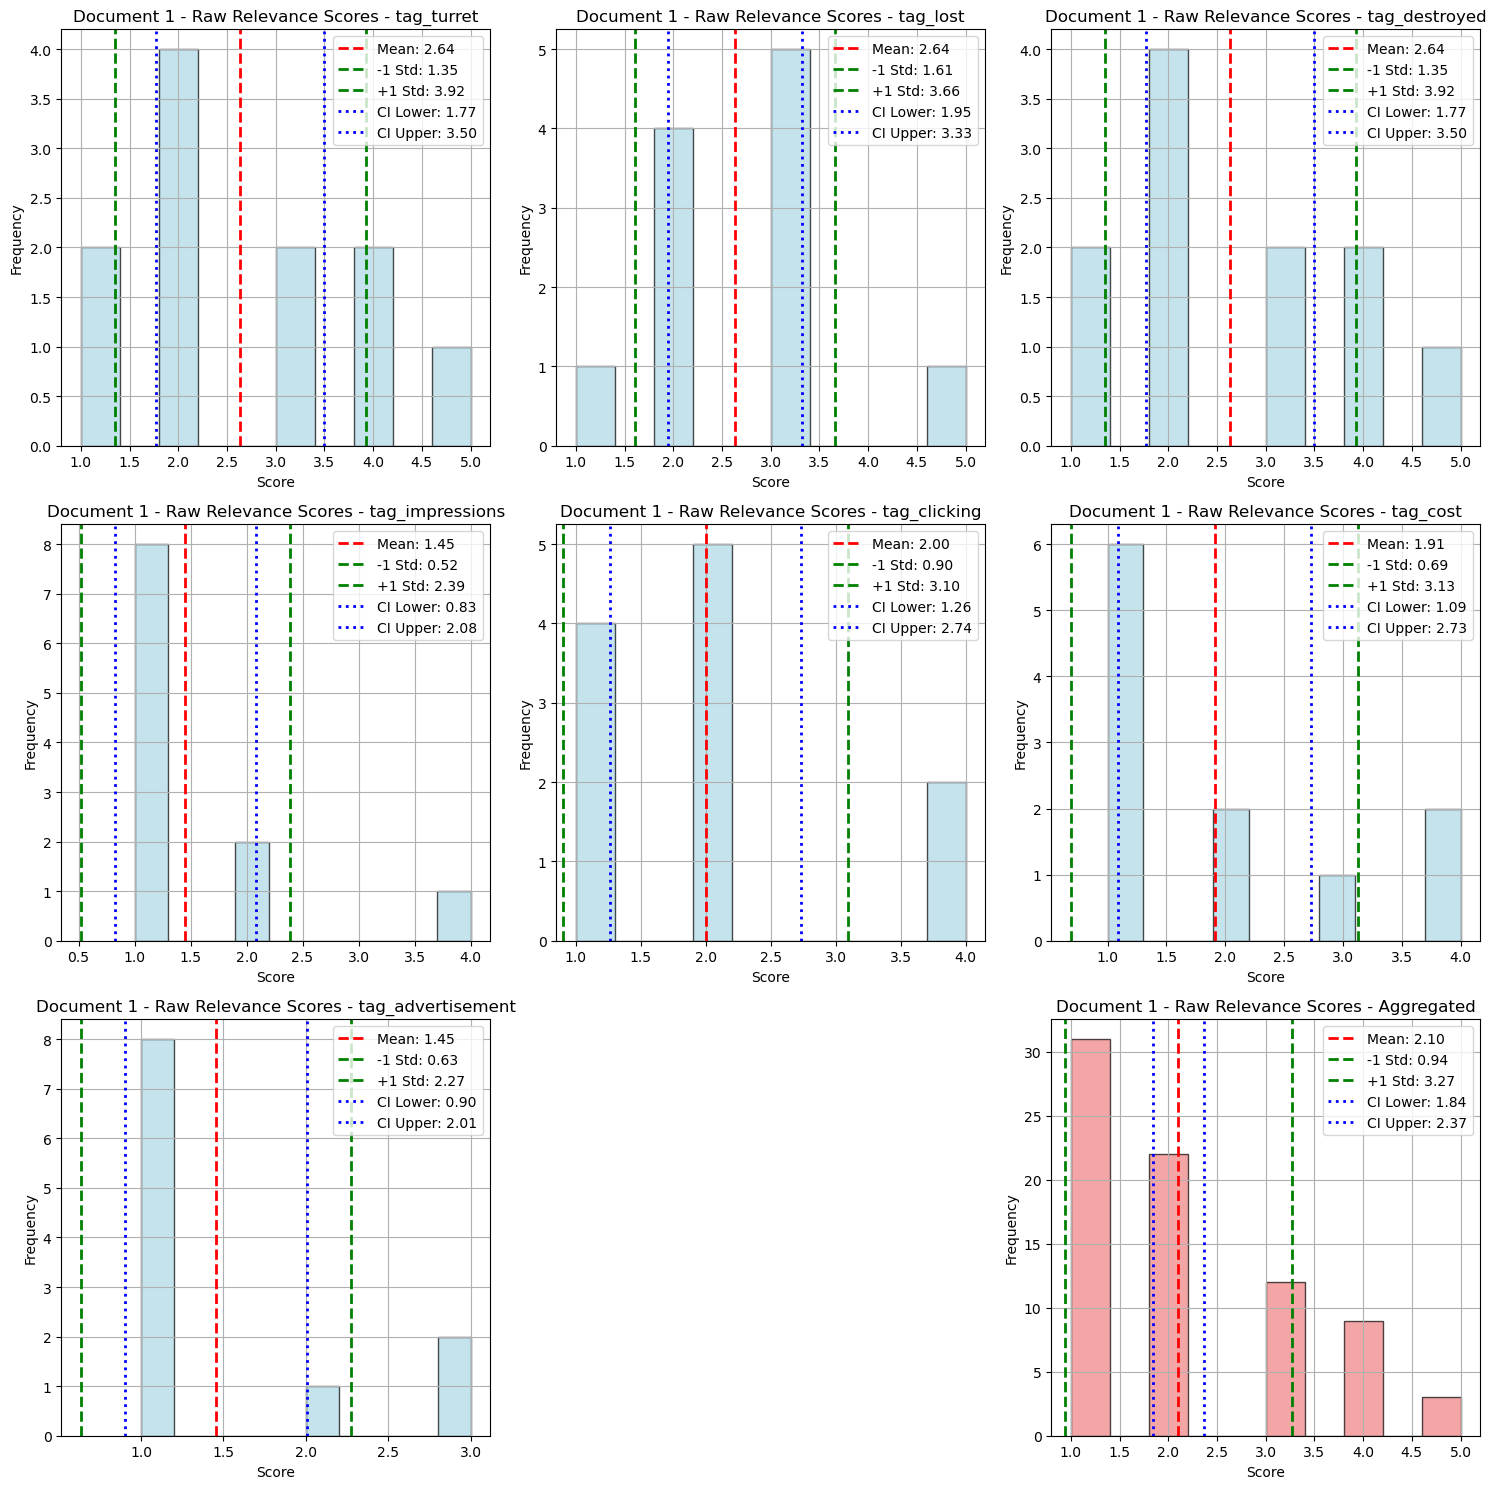

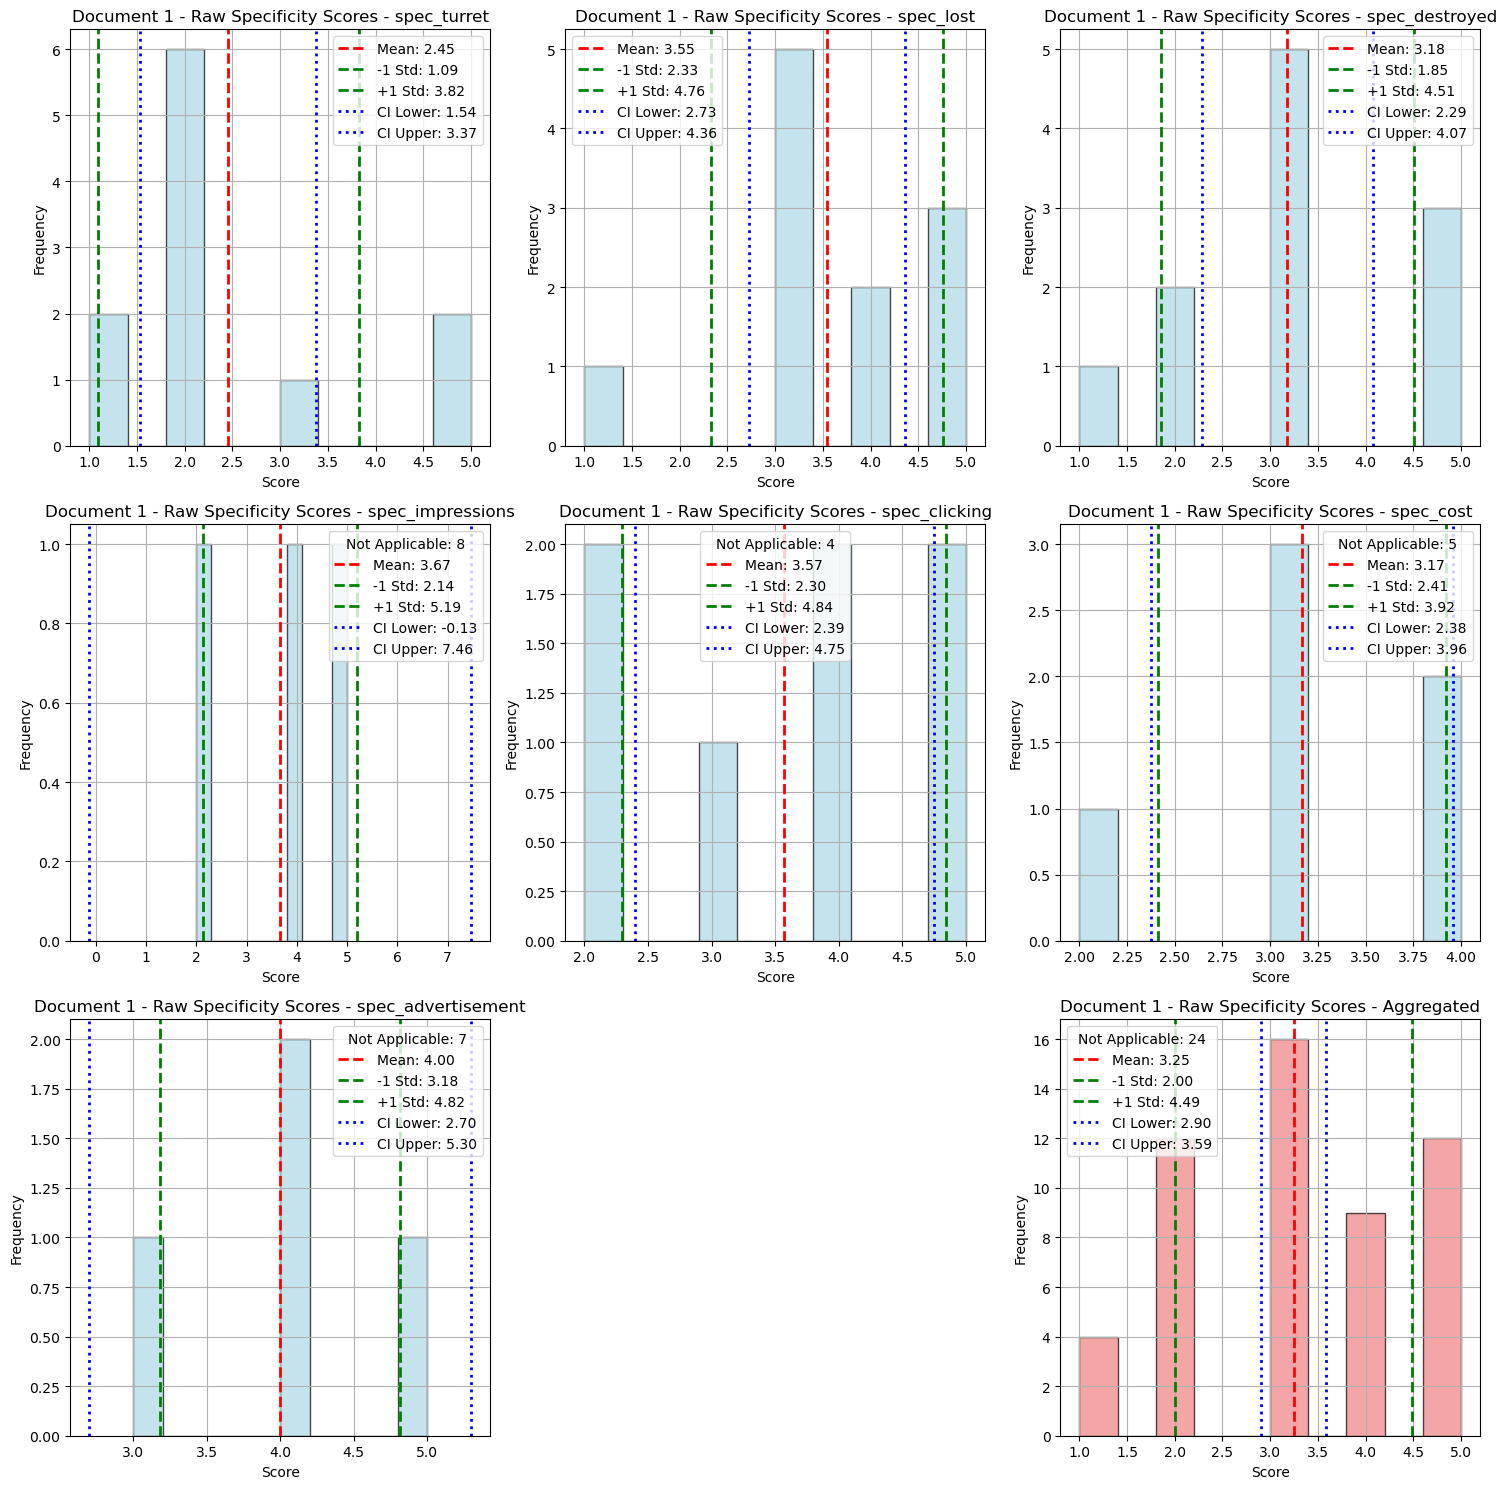

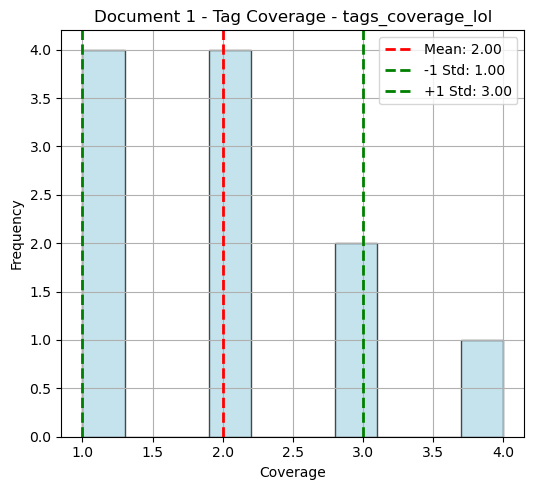

Correlation per Tag:
               Relevance vs Generality  Relevance vs Coverage  \
turret                       -0.310846               0.231572   
lost                         -0.171443               0.683988   
destroyed                    -0.467870               0.645446   
impressions                  -0.866025               0.396570   
clicking                     -0.325054               0.446024   
cost                         -0.572078               0.353714   
advertisement                -0.833333               0.814494   

               Generality vs Coverage  
turret                      -0.516160  
lost                        -0.187827  
destroyed                   -0.822377  
impressions                 -1.000000  
clicking                    -0.730904  
cost                        -0.163956  
advertisement               -1.000000  

Overall Correlations:
         Relevance vs Generality  Relevance vs Coverage  \
Overall                -0.381634               0.657496 

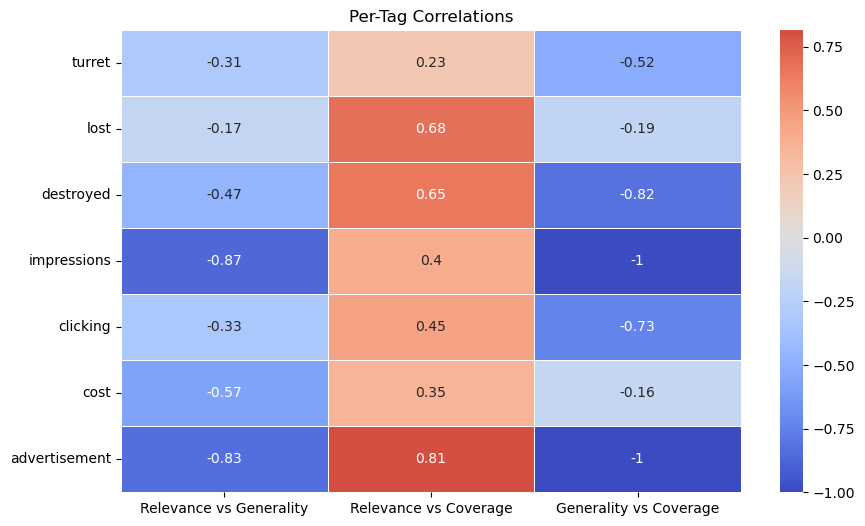

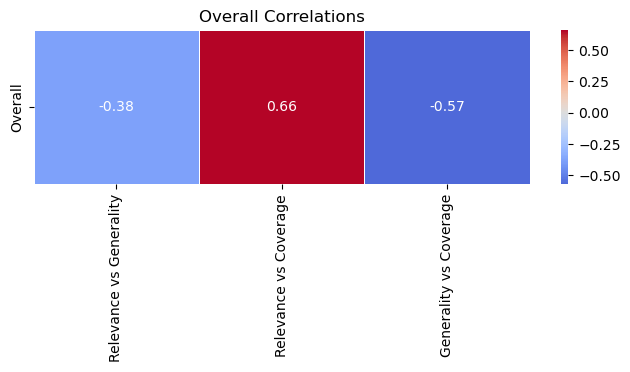


--- Analyzing Document 2 ---
Document 2 Relevance Distribution:
      tag_thyrotropin  tag_minute   tag_usd  tag_releasing  tag_high  \
std          0.301511    0.904534  1.095445       1.009050  1.286291   
min          1.000000    2.000000  2.000000       1.000000  1.000000   
max          2.000000    5.000000  5.000000       4.000000  5.000000   
mean         1.090909    3.272727  4.000000       1.727273  2.636364   

       tag_bid   tag_ask  
std   1.009050  1.078720  
min   2.000000  1.000000  
max   5.000000  4.000000  
mean  2.727273  2.181818  
Document 2 Specificity Distribution:
      spec_thyrotropin  spec_minute  spec_usd  spec_releasing  spec_high  \
std           2.309401     1.300350  1.128152        1.643168   1.349897   
min           1.000000     1.000000  1.000000        2.000000   1.000000   
max           5.000000     5.000000  5.000000        5.000000   5.000000   
mean          3.666667     3.090909  2.454545        3.500000   3.600000   

      spec_bid  spec_

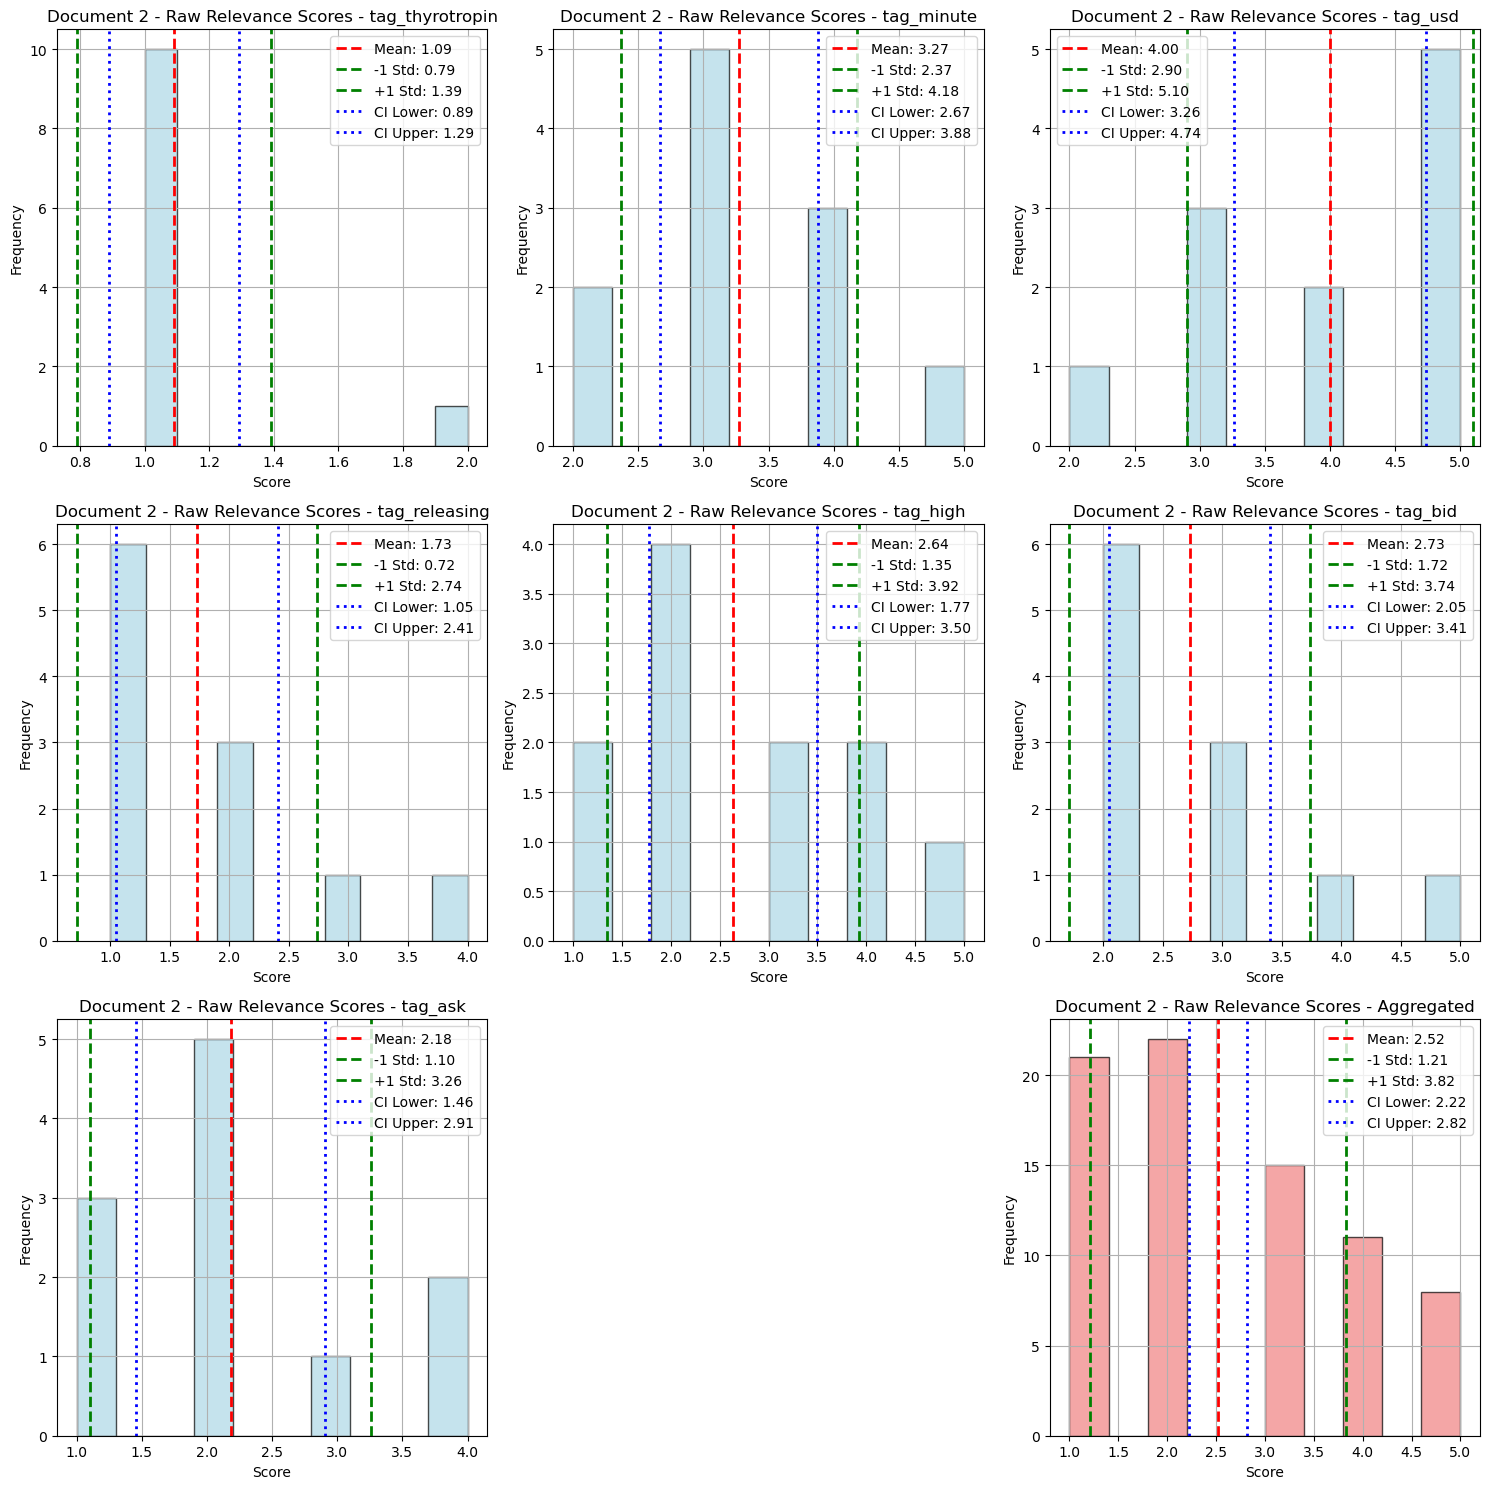

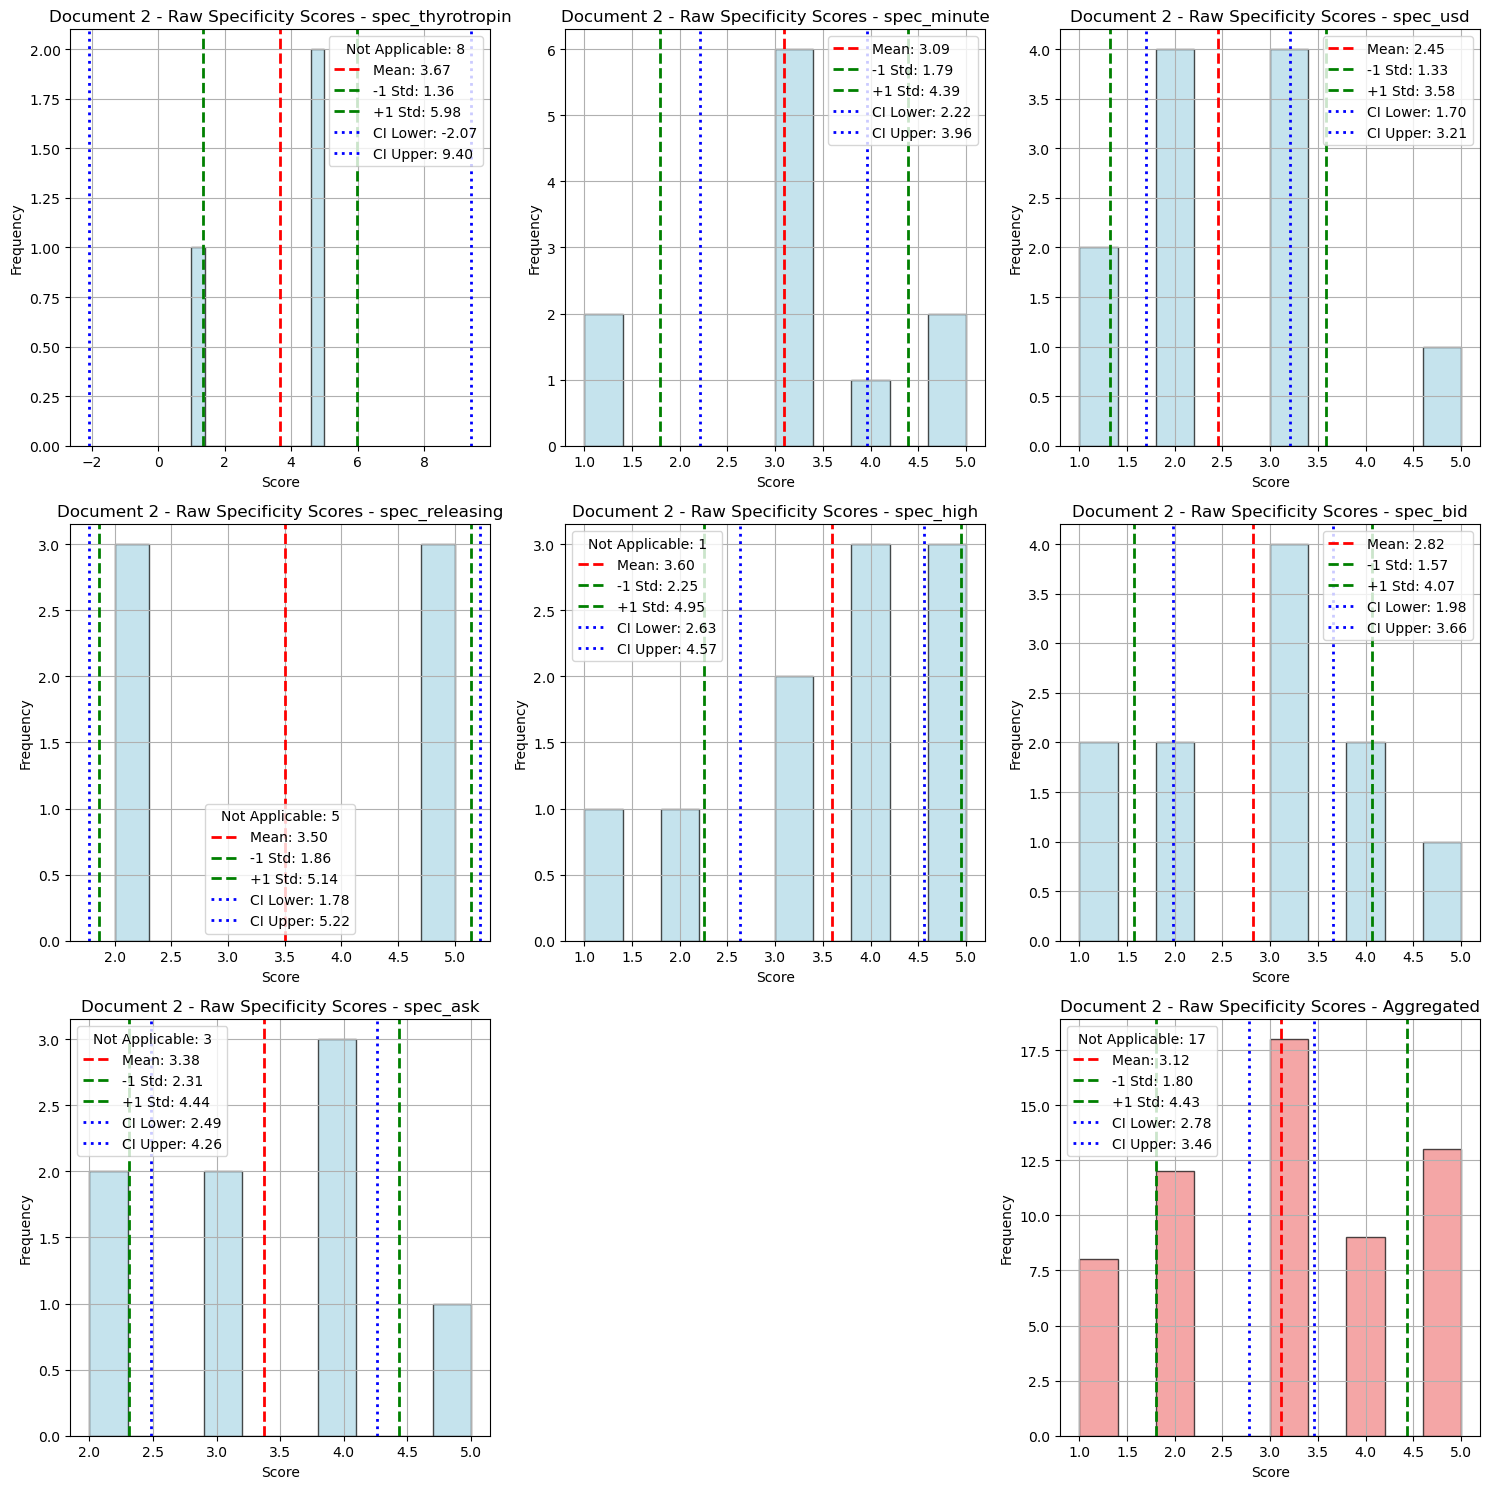

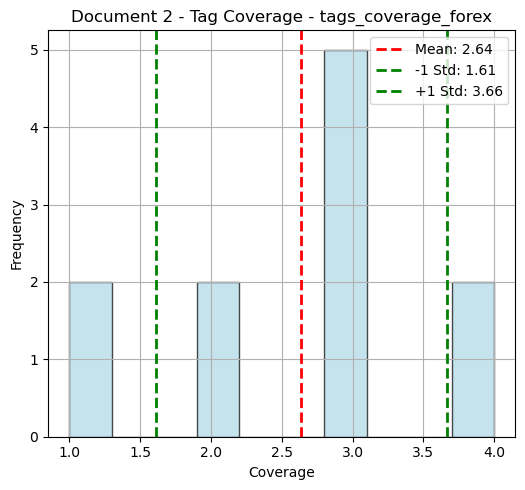

Correlation per Tag:
             Relevance vs Generality  Relevance vs Coverage  \
thyrotropin                 0.500000               0.105676   
minute                     -0.667003               0.255105   
usd                        -0.512717               0.573987   
releasing                  -0.725866               0.328337   
high                       -0.557336               0.552149   
bid                        -0.441714               0.476618   
ask                        -0.641941               0.688784   

             Generality vs Coverage  
thyrotropin               -0.500000  
minute                    -0.563540  
usd                       -0.300509  
releasing                 -0.603023  
high                      -0.585838  
bid                       -0.913646  
ask                       -0.901156  

Overall Correlations:
         Relevance vs Generality  Relevance vs Coverage  \
Overall                -0.573692               0.840963   

         Generality vs Cover

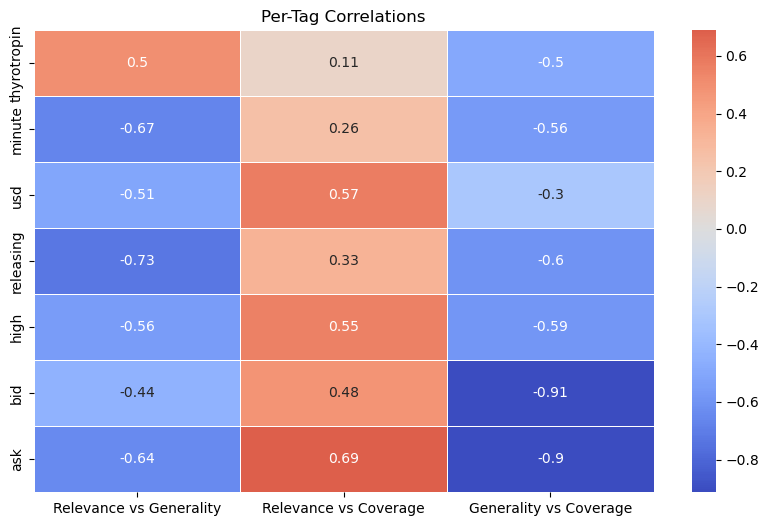

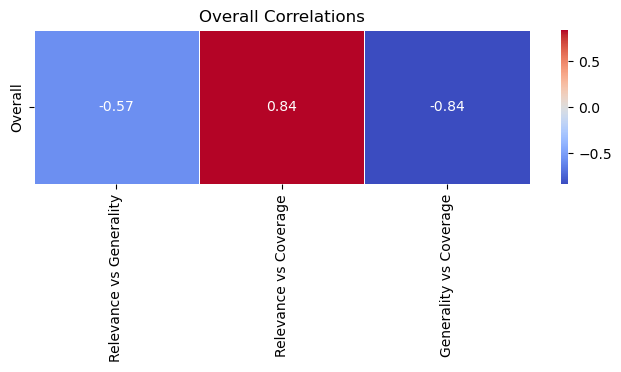


--- Analyzing Document 3 ---
Document 3 Relevance Distribution:
      tag_cancer  tag_microarray  tag_prostate  tag_ovarian  tag_gliomas  \
std     0.687552        0.786245      1.167748     0.924416     1.009050   
min     3.000000        3.000000      1.000000     1.000000     1.000000   
max     5.000000        5.000000      4.000000     4.000000     4.000000   
mean    4.545455        4.272727      1.818182     1.636364     1.727273   

      tag_lung  tag_genes  
std   0.646670   0.904534  
min   3.000000   2.000000  
max   5.000000   5.000000  
mean  4.272727   3.727273  
Document 3 Specificity Distribution:
      spec_cancer  spec_microarray  spec_prostate  spec_ovarian  spec_gliomas  \
std      1.507557         1.128152       0.547723      0.547723      1.272418   
min      1.000000         1.000000       2.000000      2.000000      1.000000   
max      5.000000         4.000000       3.000000      3.000000      5.000000   
mean     3.545455         2.545455       2.400000    

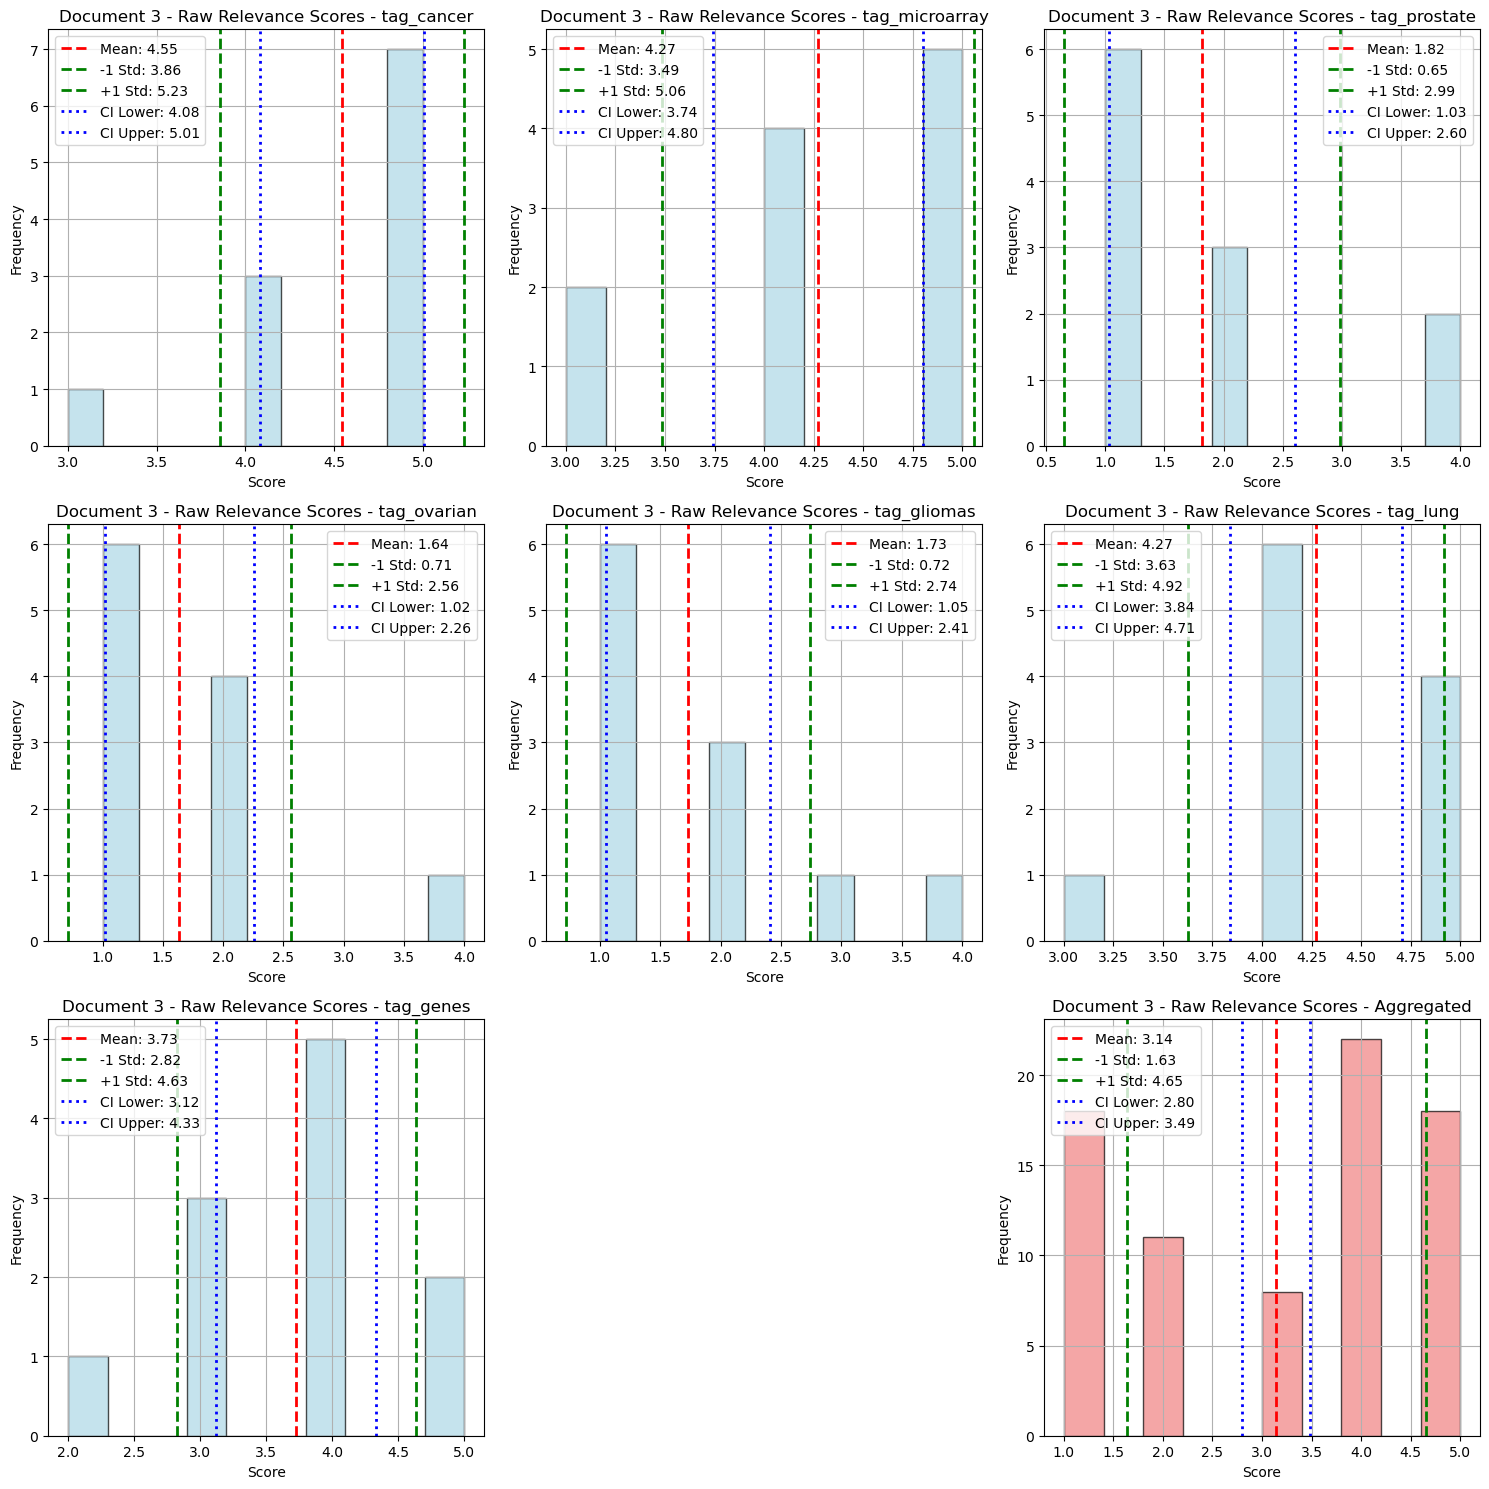

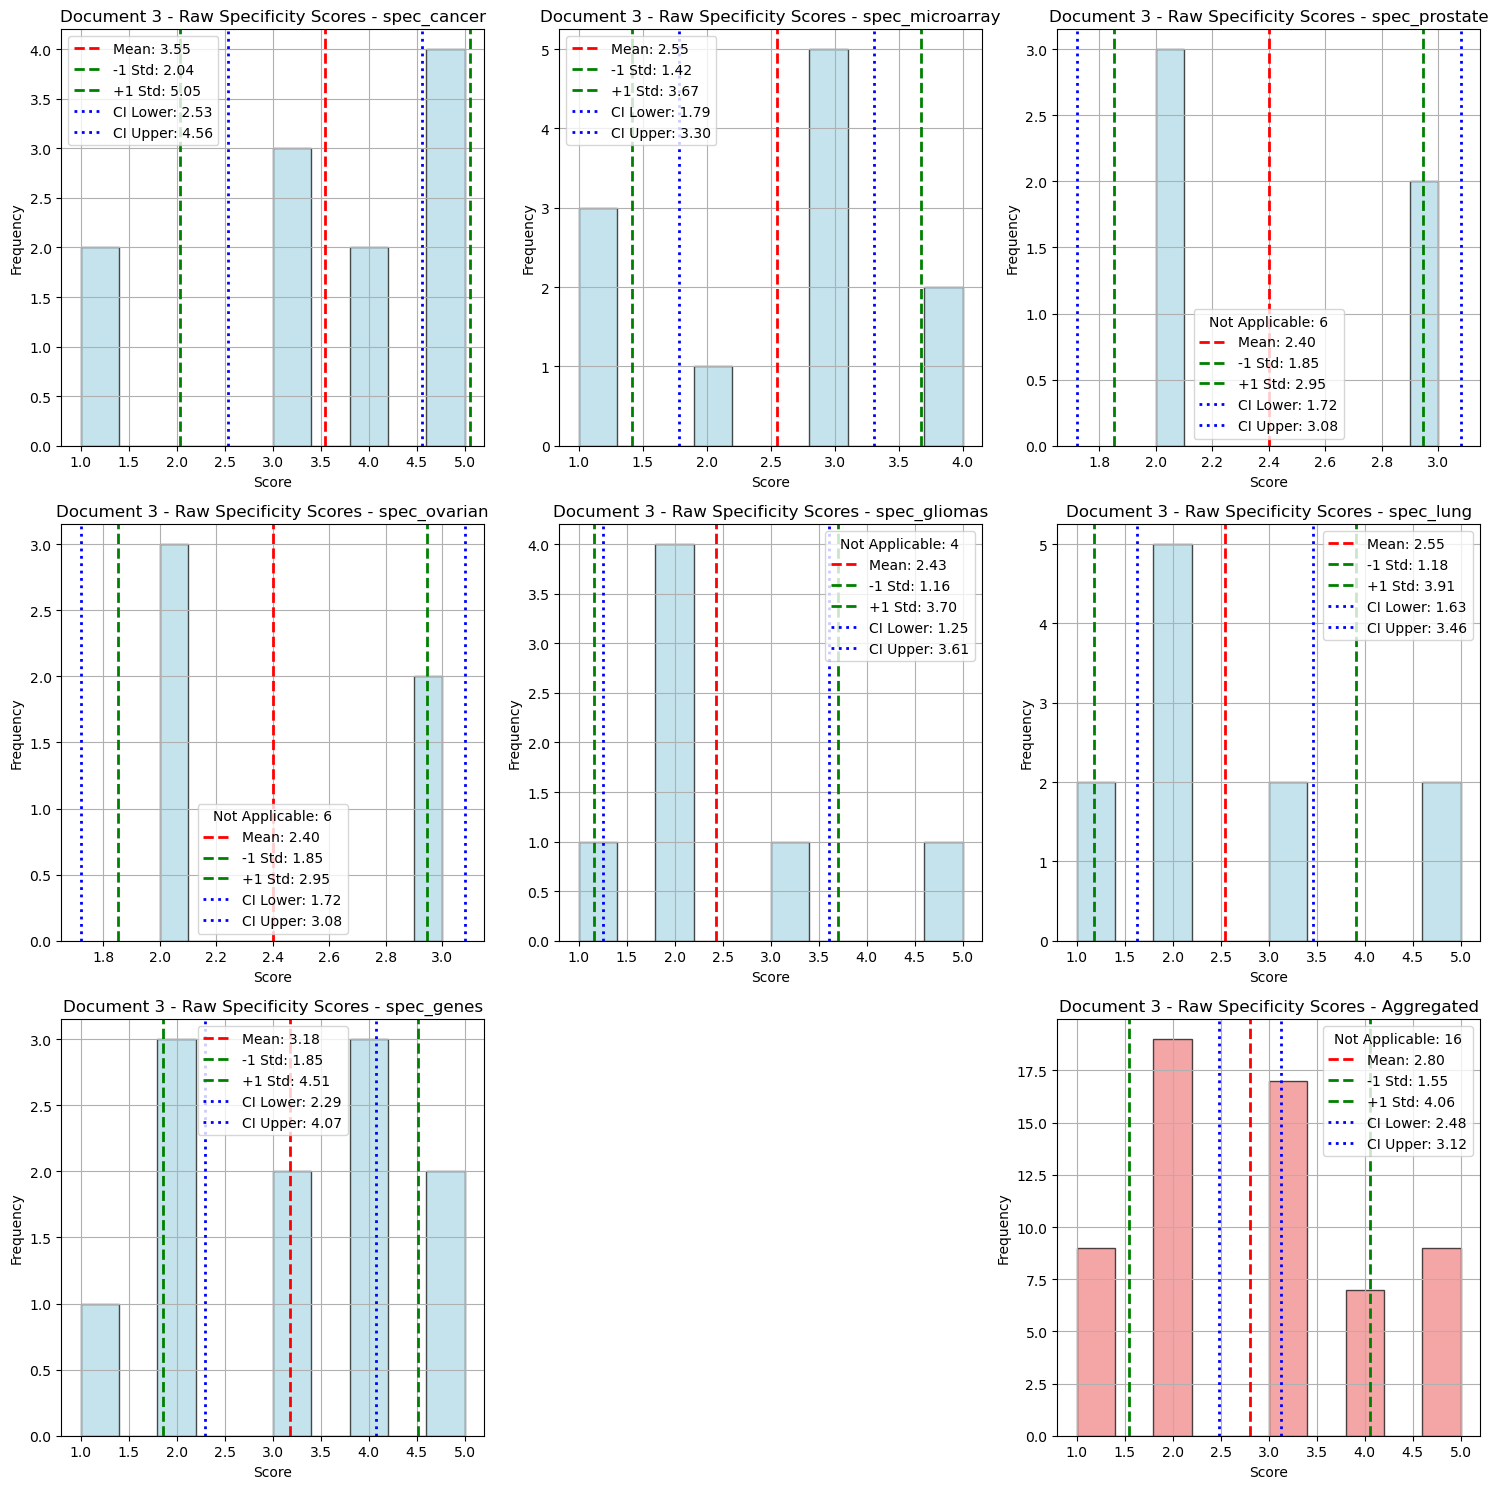

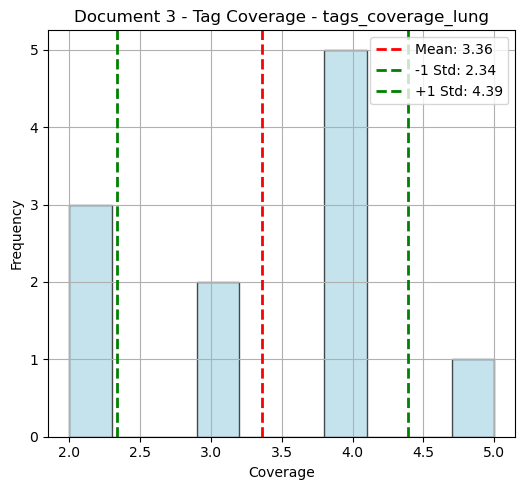

Correlation per Tag:
            Relevance vs Generality  Relevance vs Coverage  \
cancer                    -0.315500               0.656721   
microarray                -0.546942               0.695397   
prostate                  -0.666667               0.643181   
ovarian                   -0.408248               0.649598   
gliomas                   -0.567765               0.657371   
lung                      -0.277367               0.070373   
genes                     -0.780783               0.887179   

            Generality vs Coverage  
cancer                   -0.551519  
microarray               -0.625641  
prostate                 -0.645497  
ovarian                  -0.645497  
gliomas                  -0.384639  
lung                     -0.448985  
genes                    -0.617708  

Overall Correlations:
         Relevance vs Generality  Relevance vs Coverage  \
Overall                -0.616438               0.841996   

         Generality vs Coverage  
Overall   

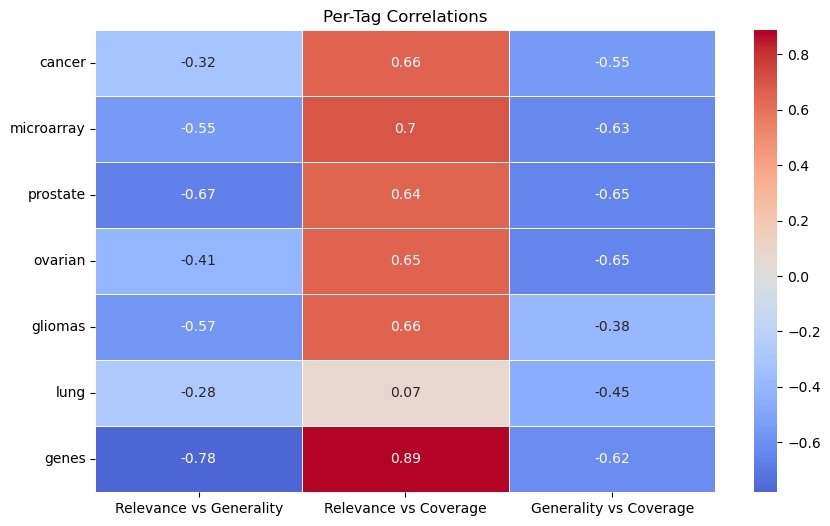

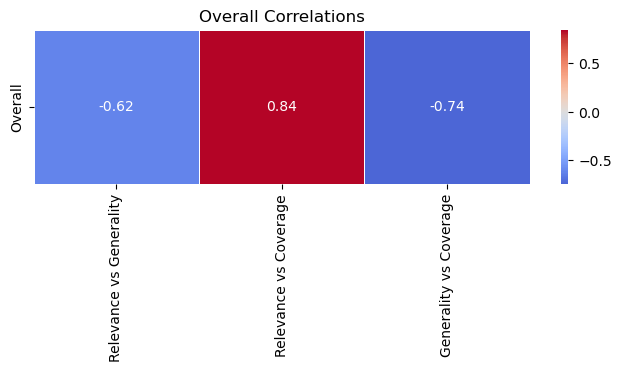

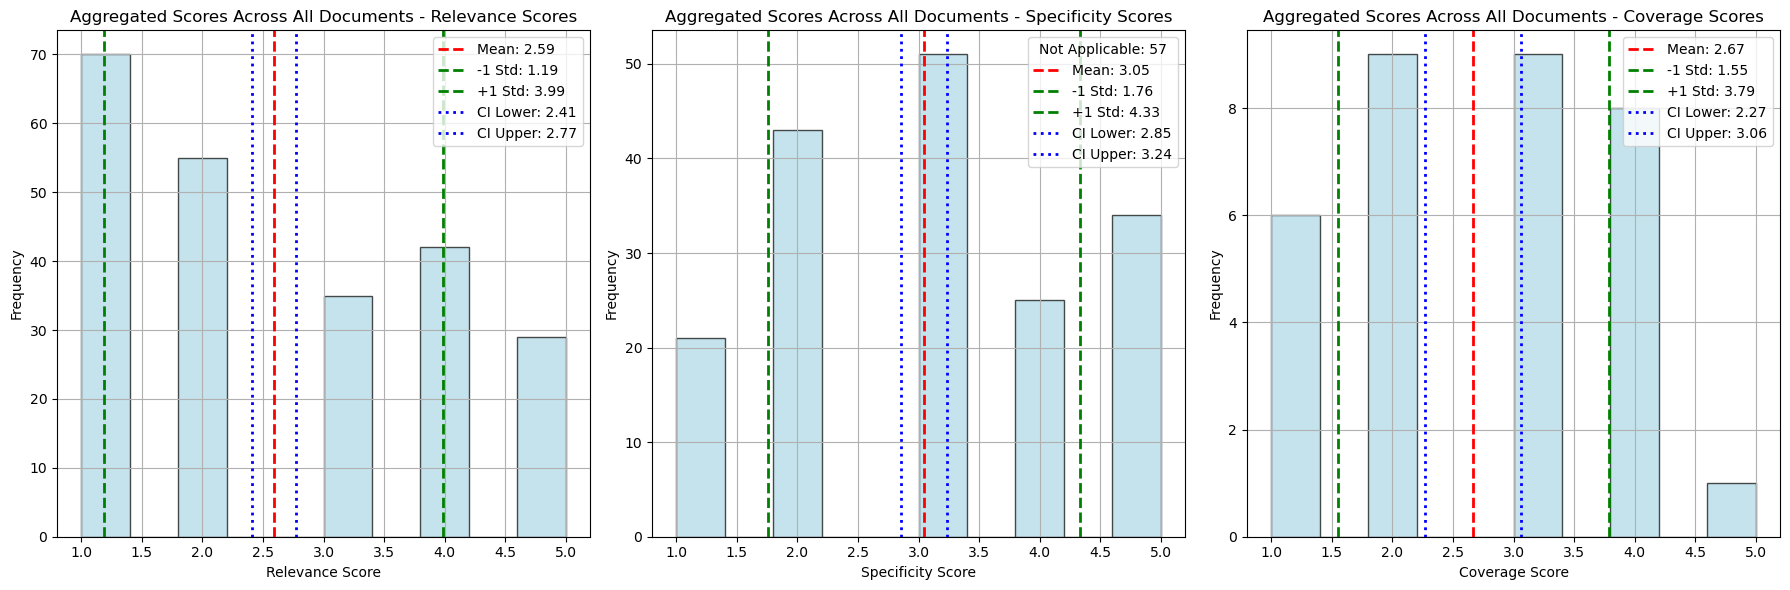

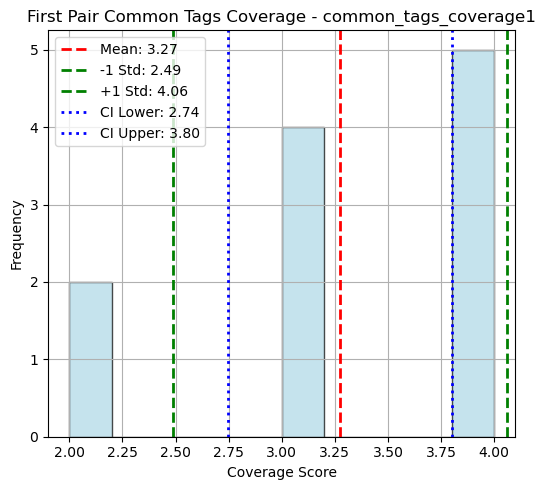

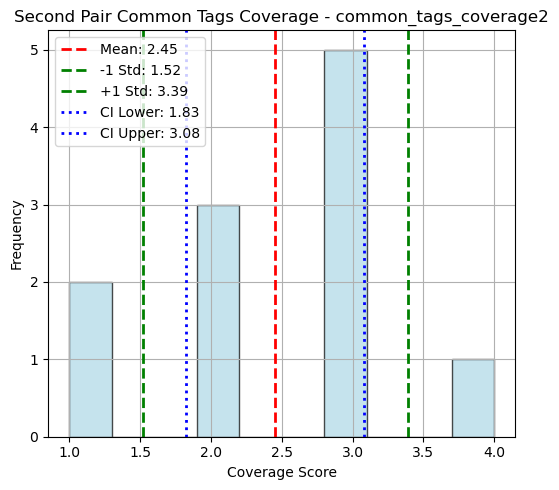


Metrics for First Pair Common Tags:
Accuracy: 0.71
Precision: 0.44
Recall: 0.55
F1-Score: 0.49

Metrics for Second Pair Common Tags:
Accuracy: 0.59
Precision: 1.00
Recall: 0.26
F1-Score: 0.42


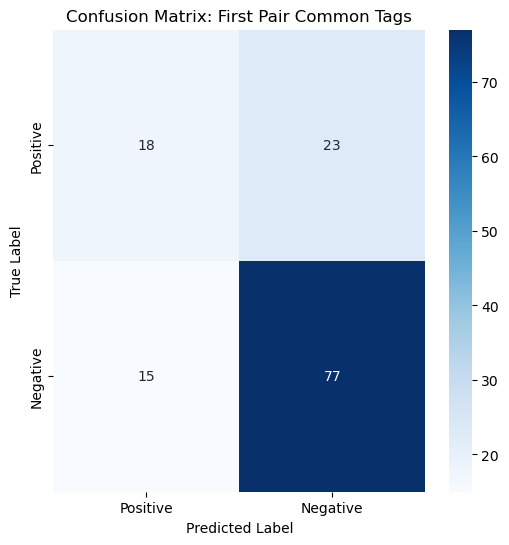

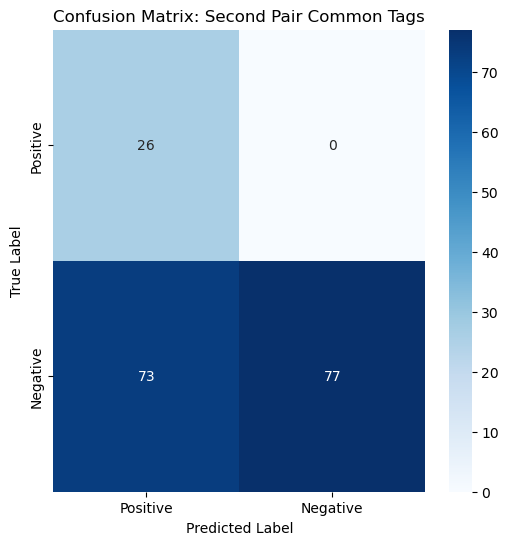

In [164]:
analyze_tags(
    df_baseline_generated,
    relevance_columns_list=[
        baseline_first_document_relevance_columns, 
        baseline_second_document_relevance_columns,
        baseline_third_document_relevance_columns
    ],
    spec_columns_list=[
        baseline_first_document_spec_columns, 
        baseline_second_document_spec_columns,
        baseline_third_document_spec_columns
    ],
    coverage_columns_list=[
        baseline_first_document_coverage_columns, 
        baseline_second_document_coverage_columns,
        baseline_third_document_coverage_columns
    ],
    suggested_columns_list=[
        baseline_first_document_suggested_columns,
        baseline_second_document_suggested_columns,
        baseline_third_document_suggested_columns
    ],
    common_tags_columns_1=baseline_first_pair_common_tags_columns,
    common_tags_true_tags_1=baseline_first_pair_common_tags_true_tags,
    common_tags_coverage_1=baseline_first_pair_coverage_columns,
    common_tags_columns_2=baseline_second_pair_common_tags_columns,
    common_tags_true_tags_2=baseline_second_pair_common_tags_true_tags,
    common_tags_coverage_2=baseline_second_pair_coverage_columns
)

In [165]:
df_human_generated.columns

Index(['timestamp', 'age_range', 'gender', 'education', 'english_prof',
       'lol_game_desc', 'tag_lol', 'tag_video_games', 'tag_multiplayer',
       'tag_game_data', 'tag_riot_api', 'tag_battle_arena', 'spec_lol',
       'spec_video_games', 'spec_multiplayer', 'spec_game_data',
       'spec_riot_api', 'spec_battle_arena', 'tags_coverage_lol',
       'suggested_tags_lol', 'forex_desc', 'tag_hist_price', 'tag_forex',
       'tag_usd_jpy', 'tag_currency_pairs', 'tag_yearly_data', 'tag_finance',
       'tag_minute_high', 'spec_hist_price', 'spec_forex', 'spec_usd_jpy',
       'spec_currency_pairs', 'spec_yearly_data', 'spec_finance',
       'spec_minute_high', 'tags_coverage_forex', 'suggested_tags_forex',
       'lung_cancer_desc', 'tag_lung_cancer', 'tag_cancer', 'tag_oncology',
       'tag_mrna_prof', 'tag_biology', 'tag_carcinomas', 'tag_gene_expr',
       'spec_lung_cancer', 'spec_cancer', 'spec_oncology', 'spec_mrna_prof',
       'spec_biology', 'spec_carcinomas', 'spec_gene_expr'

In [166]:
# Helper function to calculate and return mean, std, and confidence interval
def calculate_stats(data, confidence_level=0.95):
    data = np.array(data)
    data = data[~np.isnan(data)]  # Remove NaN values for accurate calculation
    mean = data.mean()
    std = data.std()
    n = len(data)
    
    # Calculate the margin of error for the confidence interval
    if n > 1:  # Ensure there are enough data points
        t_stat = t.ppf((1 + confidence_level) / 2., n - 1)
        margin_of_error = t_stat * (std / np.sqrt(n))
        ci_lower = mean - margin_of_error
        ci_upper = mean + margin_of_error
    else:
        ci_lower, ci_upper = mean, mean  # If not enough data, CI is the mean itself
    
    return mean, std, ci_lower, ci_upper

# Function to plot relevance and specificity for regular vs overarching tags for multiple documents
def plot_relevance_specificity_multiple_documents(df, doc_relevance_columns_list, doc_spec_columns_list, doc_tag_types_list, document_names):
    """
    This function plots relevance and specificity by tag type (regular and overarching) for multiple documents.
    It also accumulates data for all documents and plots the cumulative result at the end.
    """
    
    # Cumulative data for all documents
    cumulative_data = {
        'regular_relevance': [],
        'overarching_relevance': [],
        'regular_spec': [],
        'overarching_spec': []
    }
    
    # Iterate over each document's data
    for i, (relevance_columns, spec_columns, tag_types, document_name) in enumerate(zip(doc_relevance_columns_list, doc_spec_columns_list, doc_tag_types_list, document_names)):
        
        # Preprocess numerical columns
        columns_to_preprocess = relevance_columns + spec_columns
        df = preprocess_numerical_columns(df, columns_to_preprocess)
        
        # Extract the tag type columns
        regular_relevance_cols = tag_types['regular']
        overarching_relevance_cols = tag_types['overarching']

        # Get corresponding specificity columns
        regular_spec_cols = [spec_columns[relevance_columns.index(col)] for col in regular_relevance_cols]
        overarching_spec_cols = [spec_columns[relevance_columns.index(col)] for col in overarching_relevance_cols]

        # Calculate statistics for relevance and specificity
        regular_relevance = df[regular_relevance_cols].values.flatten()
        overarching_relevance = df[overarching_relevance_cols].values.flatten()

        regular_spec = df[regular_spec_cols].values.flatten()
        overarching_spec = df[overarching_spec_cols].values.flatten()

        # Add data to cumulative results
        cumulative_data['regular_relevance'].extend(regular_relevance)
        cumulative_data['overarching_relevance'].extend(overarching_relevance)
        cumulative_data['regular_spec'].extend(regular_spec)
        cumulative_data['overarching_spec'].extend(overarching_spec)

        # Calculate stats for relevance
        reg_mean_rel, reg_std_rel, reg_ci_lower_rel, reg_ci_upper_rel = calculate_stats(regular_relevance)
        over_mean_rel, over_std_rel, over_ci_lower_rel, over_ci_upper_rel = calculate_stats(overarching_relevance)

        # Calculate stats for specificity
        reg_mean_spec, reg_std_spec, reg_ci_lower_spec, reg_ci_upper_spec = calculate_stats(regular_spec)
        over_mean_spec, over_std_spec, over_ci_lower_spec, over_ci_upper_spec = calculate_stats(overarching_spec)

        # Plotting Relevance
        fig, axs = plt.subplots(1, 2, figsize=(14, 6))
        
        # Relevance Plot
        axs[0].hist(regular_relevance, bins=10, color='lightblue', edgecolor='black', alpha=0.7, label='Regular Tags')
        axs[0].hist(overarching_relevance, bins=10, color='lightcoral', edgecolor='black', alpha=0.7, label='Overarching Tags')
        axs[0].set_title(f'{document_name} - Relevance Scores by Tag Type')
        axs[0].set_xlabel('Relevance Score')
        axs[0].set_ylabel('Frequency')
        axs[0].legend()

        # Plot mean and CI for Relevance
        axs[0].axvline(reg_mean_rel, color='blue', linestyle='dashed', linewidth=2, label=f'Regular Mean: {reg_mean_rel:.2f}')
        axs[0].axvline(over_mean_rel, color='red', linestyle='dashed', linewidth=2, label=f'Overarching Mean: {over_mean_rel:.2f}')
        # Plot confidence intervals
        axs[0].axvline(reg_ci_lower_rel, color='blue', linestyle='dotted', linewidth=2, label=f'Regular CI Lower: {reg_ci_lower_rel:.2f}')
        axs[0].axvline(reg_ci_upper_rel, color='blue', linestyle='dotted', linewidth=2, label=f'Regular CI Upper: {reg_ci_upper_rel:.2f}')
        axs[0].axvline(over_ci_lower_rel, color='red', linestyle='dotted', linewidth=2, label=f'Overarching CI Lower: {over_ci_lower_rel:.2f}')
        axs[0].axvline(over_ci_upper_rel, color='red', linestyle='dotted', linewidth=2, label=f'Overarching CI Upper: {over_ci_upper_rel:.2f}')
        
        axs[0].legend()

        # Specificity Plot
        axs[1].hist(regular_spec, bins=10, color='lightblue', edgecolor='black', alpha=0.7, label='Regular Tags')
        axs[1].hist(overarching_spec, bins=10, color='lightcoral', edgecolor='black', alpha=0.7, label='Overarching Tags')
        axs[1].set_title(f'{document_name} - Specificity Scores by Tag Type')
        axs[1].set_xlabel('Specificity Score')
        axs[1].set_ylabel('Frequency')
        axs[1].legend()

        # Plot mean and CI for Specificity
        axs[1].axvline(reg_mean_spec, color='blue', linestyle='dashed', linewidth=2, label=f'Regular Mean: {reg_mean_spec:.2f}')
        axs[1].axvline(over_mean_spec, color='red', linestyle='dashed', linewidth=2, label=f'Overarching Mean: {over_mean_spec:.2f}')
        # Plot confidence intervals
        axs[1].axvline(reg_ci_lower_spec, color='blue', linestyle='dotted', linewidth=2, label=f'Regular CI Lower: {reg_ci_lower_spec:.2f}')
        axs[1].axvline(reg_ci_upper_spec, color='blue', linestyle='dotted', linewidth=2, label=f'Regular CI Upper: {reg_ci_upper_spec:.2f}')
        axs[1].axvline(over_ci_lower_spec, color='red', linestyle='dotted', linewidth=2, label=f'Overarching CI Lower: {over_ci_lower_spec:.2f}')
        axs[1].axvline(over_ci_upper_spec, color='red', linestyle='dotted', linewidth=2, label=f'Overarching CI Upper: {over_ci_upper_spec:.2f}')
        
        axs[1].legend()

        plt.tight_layout()
        plt.show()

    # After processing all documents, plot the cumulative results
    plot_cumulative_relevance_specificity(cumulative_data)

# Function to plot cumulative relevance and specificity
def plot_cumulative_relevance_specificity(cumulative_data):
    """
    This function plots the cumulative relevance and specificity scores for all documents combined.
    """
    
    # Calculate cumulative stats for relevance
    reg_mean_rel, reg_std_rel, reg_ci_lower_rel, reg_ci_upper_rel = calculate_stats(cumulative_data['regular_relevance'])
    over_mean_rel, over_std_rel, over_ci_lower_rel, over_ci_upper_rel = calculate_stats(cumulative_data['overarching_relevance'])

    # Calculate cumulative stats for specificity
    reg_mean_spec, reg_std_spec, reg_ci_lower_spec, reg_ci_upper_spec = calculate_stats(cumulative_data['regular_spec'])
    over_mean_spec, over_std_spec, over_ci_lower_spec, over_ci_upper_spec = calculate_stats(cumulative_data['overarching_spec'])

    # Plotting cumulative Relevance and Specificity
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))
    
    # Cumulative Relevance Plot
    axs[0].hist(cumulative_data['regular_relevance'], bins=10, color='lightblue', edgecolor='black', alpha=0.7, label='Regular Tags')
    axs[0].hist(cumulative_data['overarching_relevance'], bins=10, color='lightcoral', edgecolor='black', alpha=0.7, label='Overarching Tags')
    axs[0].set_title(f'Cumulative - Relevance Scores by Tag Type')
    axs[0].set_xlabel('Relevance Score')
    axs[0].set_ylabel('Frequency')
    axs[0].legend()

    # Plot mean and CI for cumulative Relevance
    axs[0].axvline(reg_mean_rel, color='blue', linestyle='dashed', linewidth=2, label=f'Regular Mean: {reg_mean_rel:.2f}')
    axs[0].axvline(over_mean_rel, color='red', linestyle='dashed', linewidth=2, label=f'Overarching Mean: {over_mean_rel:.2f}')
    # Plot confidence intervals
    axs[0].axvline(reg_ci_lower_rel, color='blue', linestyle='dotted', linewidth=2, label=f'Regular CI Lower: {reg_ci_lower_rel:.2f}')
    axs[0].axvline(reg_ci_upper_rel, color='blue', linestyle='dotted', linewidth=2, label=f'Regular CI Upper: {reg_ci_upper_rel:.2f}')
    axs[0].axvline(over_ci_lower_rel, color='red', linestyle='dotted', linewidth=2, label=f'Overarching CI Lower: {over_ci_lower_rel:.2f}')
    axs[0].axvline(over_ci_upper_rel, color='red', linestyle='dotted', linewidth=2, label=f'Overarching CI Upper: {over_ci_upper_rel:.2f}')
    
    axs[0].legend()

    # Cumulative Specificity Plot
    axs[1].hist(cumulative_data['regular_spec'], bins=10, color='lightblue', edgecolor='black', alpha=0.7, label='Regular Tags')
    axs[1].hist(cumulative_data['overarching_spec'], bins=10, color='lightcoral', edgecolor='black', alpha=0.7, label='Overarching Tags')
    axs[1].set_title(f'Cumulative - Specificity Scores by Tag Type')
    axs[1].set_xlabel('Specificity Score')
    axs[1].set_ylabel('Frequency')
    axs[1].legend()

    # Plot mean and CI for cumulative Specificity
    axs[1].axvline(reg_mean_spec, color='blue', linestyle='dashed', linewidth=2, label=f'Regular Mean: {reg_mean_spec:.2f}')
    axs[1].axvline(over_mean_spec, color='red', linestyle='dashed', linewidth=2, label=f'Overarching Mean: {over_mean_spec:.2f}')
    # Plot confidence intervals
    axs[1].axvline(reg_ci_lower_spec, color='blue', linestyle='dotted', linewidth=2, label=f'Regular CI Lower: {reg_ci_lower_spec:.2f}')
    axs[1].axvline(reg_ci_upper_spec, color='blue', linestyle='dotted', linewidth=2, label=f'Regular CI Upper: {reg_ci_upper_spec:.2f}')
    axs[1].axvline(over_ci_lower_spec, color='red', linestyle='dotted', linewidth=2, label=f'Overarching CI Lower: {over_ci_lower_spec:.2f}')
    axs[1].axvline(over_ci_upper_spec, color='red', linestyle='dotted', linewidth=2, label=f'Overarching CI Upper: {over_ci_upper_spec:.2f}')
    
    axs[1].legend()

    plt.tight_layout()
    plt.show()

In [167]:
human_first_document_relevance_columns = ['tag_lol', 'tag_video_games', 'tag_multiplayer', 'tag_game_data', 'tag_riot_api', 'tag_battle_arena']
human_first_document_spec_columns = ['spec_lol', 'spec_video_games', 'spec_multiplayer', 'spec_game_data', 'spec_riot_api', 'spec_battle_arena']
human_first_document_coverage_columns = ['tags_coverage_lol']
human_first_document_suggested_columns = ['suggested_tags_lol']
human_first_document_tag_types = {
    'regular': ['tag_lol', 'tag_multiplayer', 'tag_game_data', 'tag_riot_api', 'tag_battle_arena'],
    'overarching': ['tag_video_games']
}

human_second_document_relevance_columns = ['tag_hist_price', 'tag_forex', 'tag_usd_jpy', 'tag_currency_pairs', 'tag_yearly_data', 'tag_finance', 'tag_minute_high']
human_second_document_spec_columns = ['spec_hist_price', 'spec_forex', 'spec_usd_jpy', 'spec_currency_pairs', 'spec_yearly_data', 'spec_finance', 'spec_minute_high']
human_second_document_coverage_columns = ['tags_coverage_forex']
human_second_document_suggested_columns = ['suggested_tags_forex']
human_second_document_tag_types = {
    'regular': ['tag_hist_price', 'tag_usd_jpy', 'tag_yearly_data', 'tag_minute_high'],
    'overarching': ['tag_forex', 'tag_currency_pairs', 'tag_finance']
}

human_third_document_relevance_columns = ['tag_lung_cancer', 'tag_cancer', 'tag_oncology', 'tag_mrna_prof', 'tag_biology', 'tag_carcinomas', 'tag_gene_expr']
human_third_document_spec_columns = ['spec_lung_cancer', 'spec_cancer', 'spec_oncology', 'spec_mrna_prof', 'spec_biology', 'spec_carcinomas', 'spec_gene_expr']
human_third_document_coverage_columns = ['tags_coverage_lung']
human_third_document_suggested_columns = ['suggested_tags_lung']
human_third_document_tag_types = {
    'regular': ['tag_lung_cancer', 'tag_mrna_prof', 'tag_carcinomas', 'tag_gene_expr'],
    'overarching': ['tag_cancer', 'tag_oncology', 'tag_biology']
}

human_first_pair_common_tags_columns = ['common_tags1']
human_first_pair_common_tags_true_tags = ["Coronavirus", "Covid-19", "Health", "Public Health", "Epidemiology"]
human_first_pair_coverage_columns = ['common_tags_coverage1']

human_second_pair_common_tags_columns = ['common_tags2']
human_second_pair_common_tags_true_tags = ["Movies", "IMDb", "Film Information"]
human_second_pair_coverage_columns = ['common_tags_coverage2']


--- Analyzing Document 1 ---
Document 1 Relevance Distribution:
       tag_lol  tag_video_games  tag_multiplayer  tag_game_data  tag_riot_api  \
std   0.674200         1.300350         1.103713       0.809040      1.009050   
min   3.000000         2.000000         2.000000       3.000000      2.000000   
max   5.000000         5.000000         5.000000       5.000000      5.000000   
mean  4.636364         3.909091         3.727273       4.363636      4.272727   

      tag_battle_arena  
std           1.264911  
min           1.000000  
max           5.000000  
mean          3.000000  
Document 1 Specificity Distribution:
      spec_lol  spec_video_games  spec_multiplayer  spec_game_data  \
std   0.820200          0.823273          1.100505        0.981650   
min   1.000000          3.000000          2.000000        2.000000   
max   3.000000          5.000000          5.000000        5.000000   
mean  1.545455          4.300000          3.900000        2.818182   

      spec_riot_

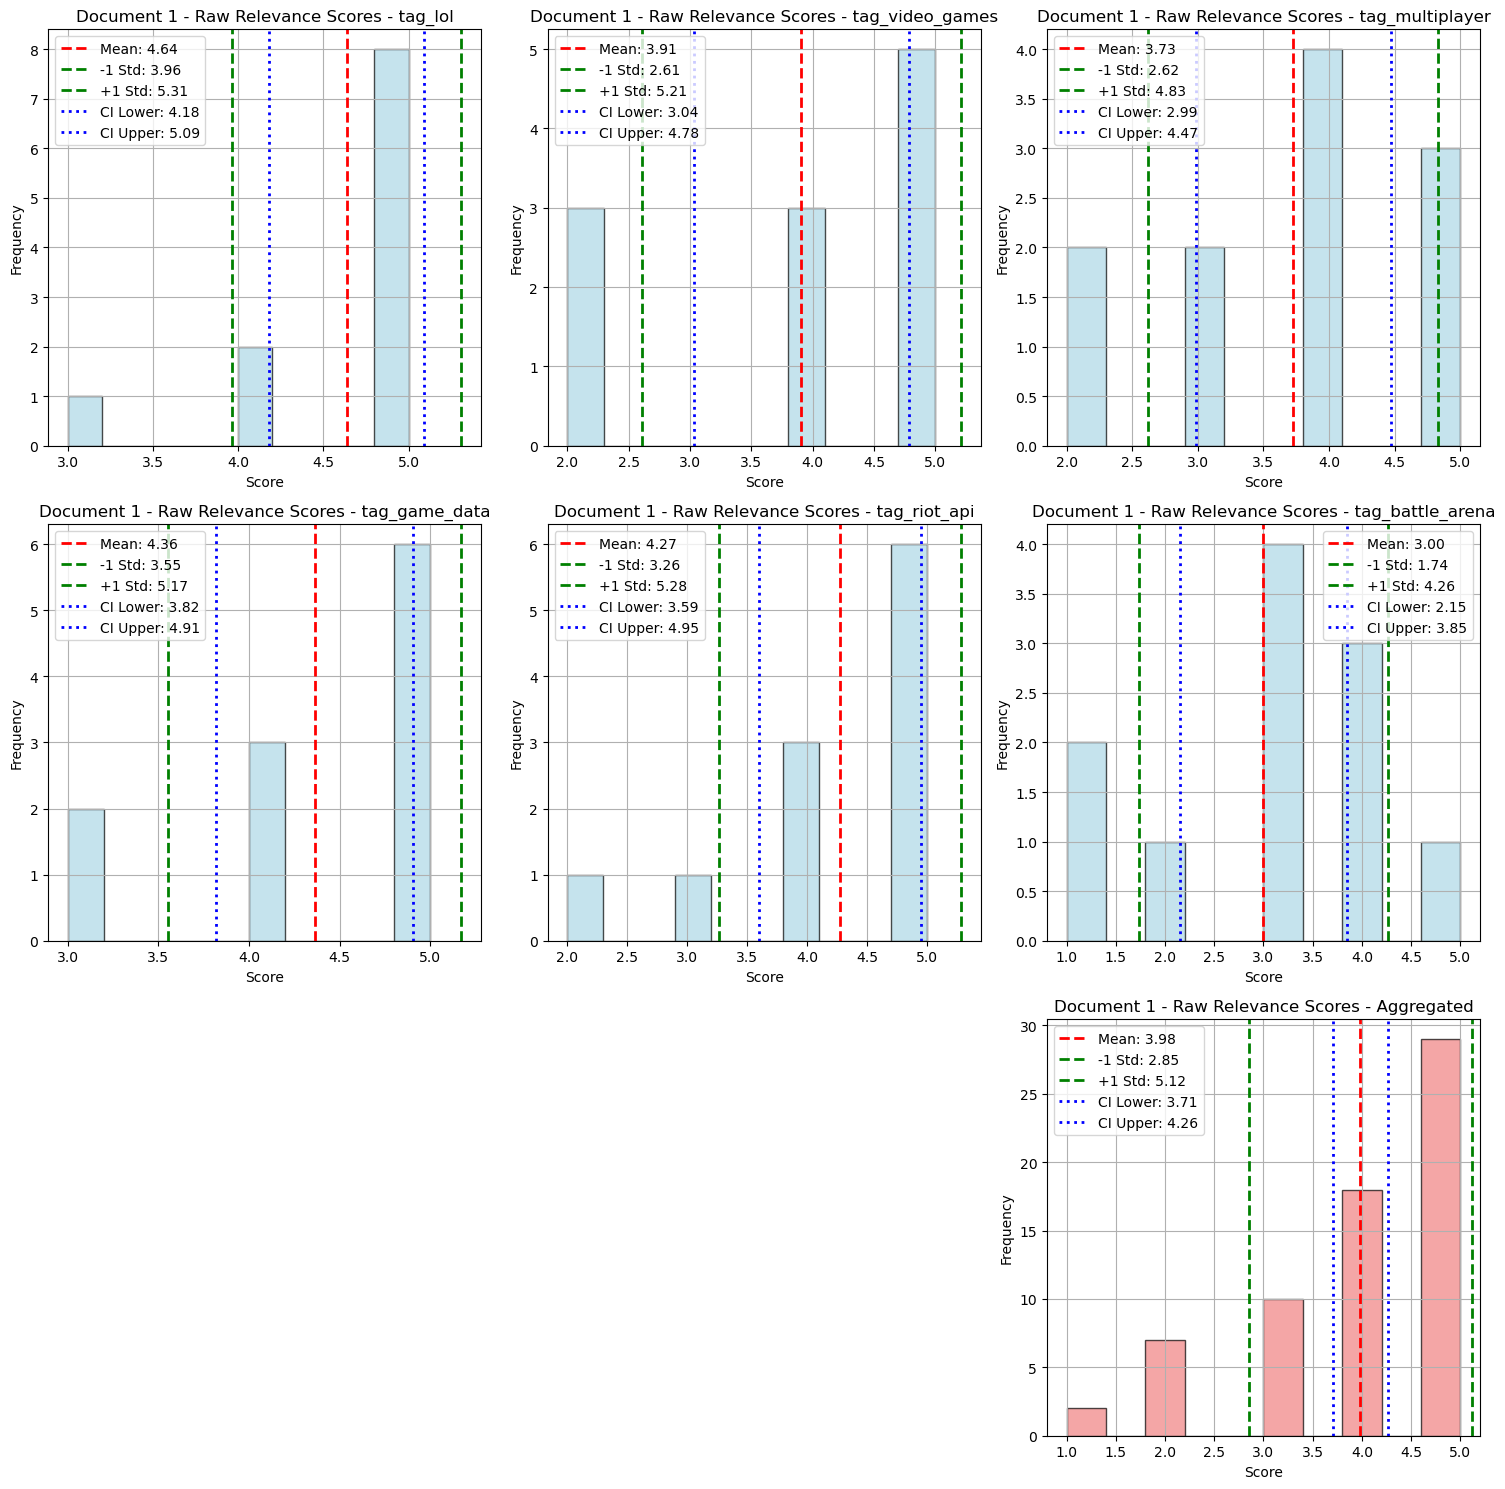

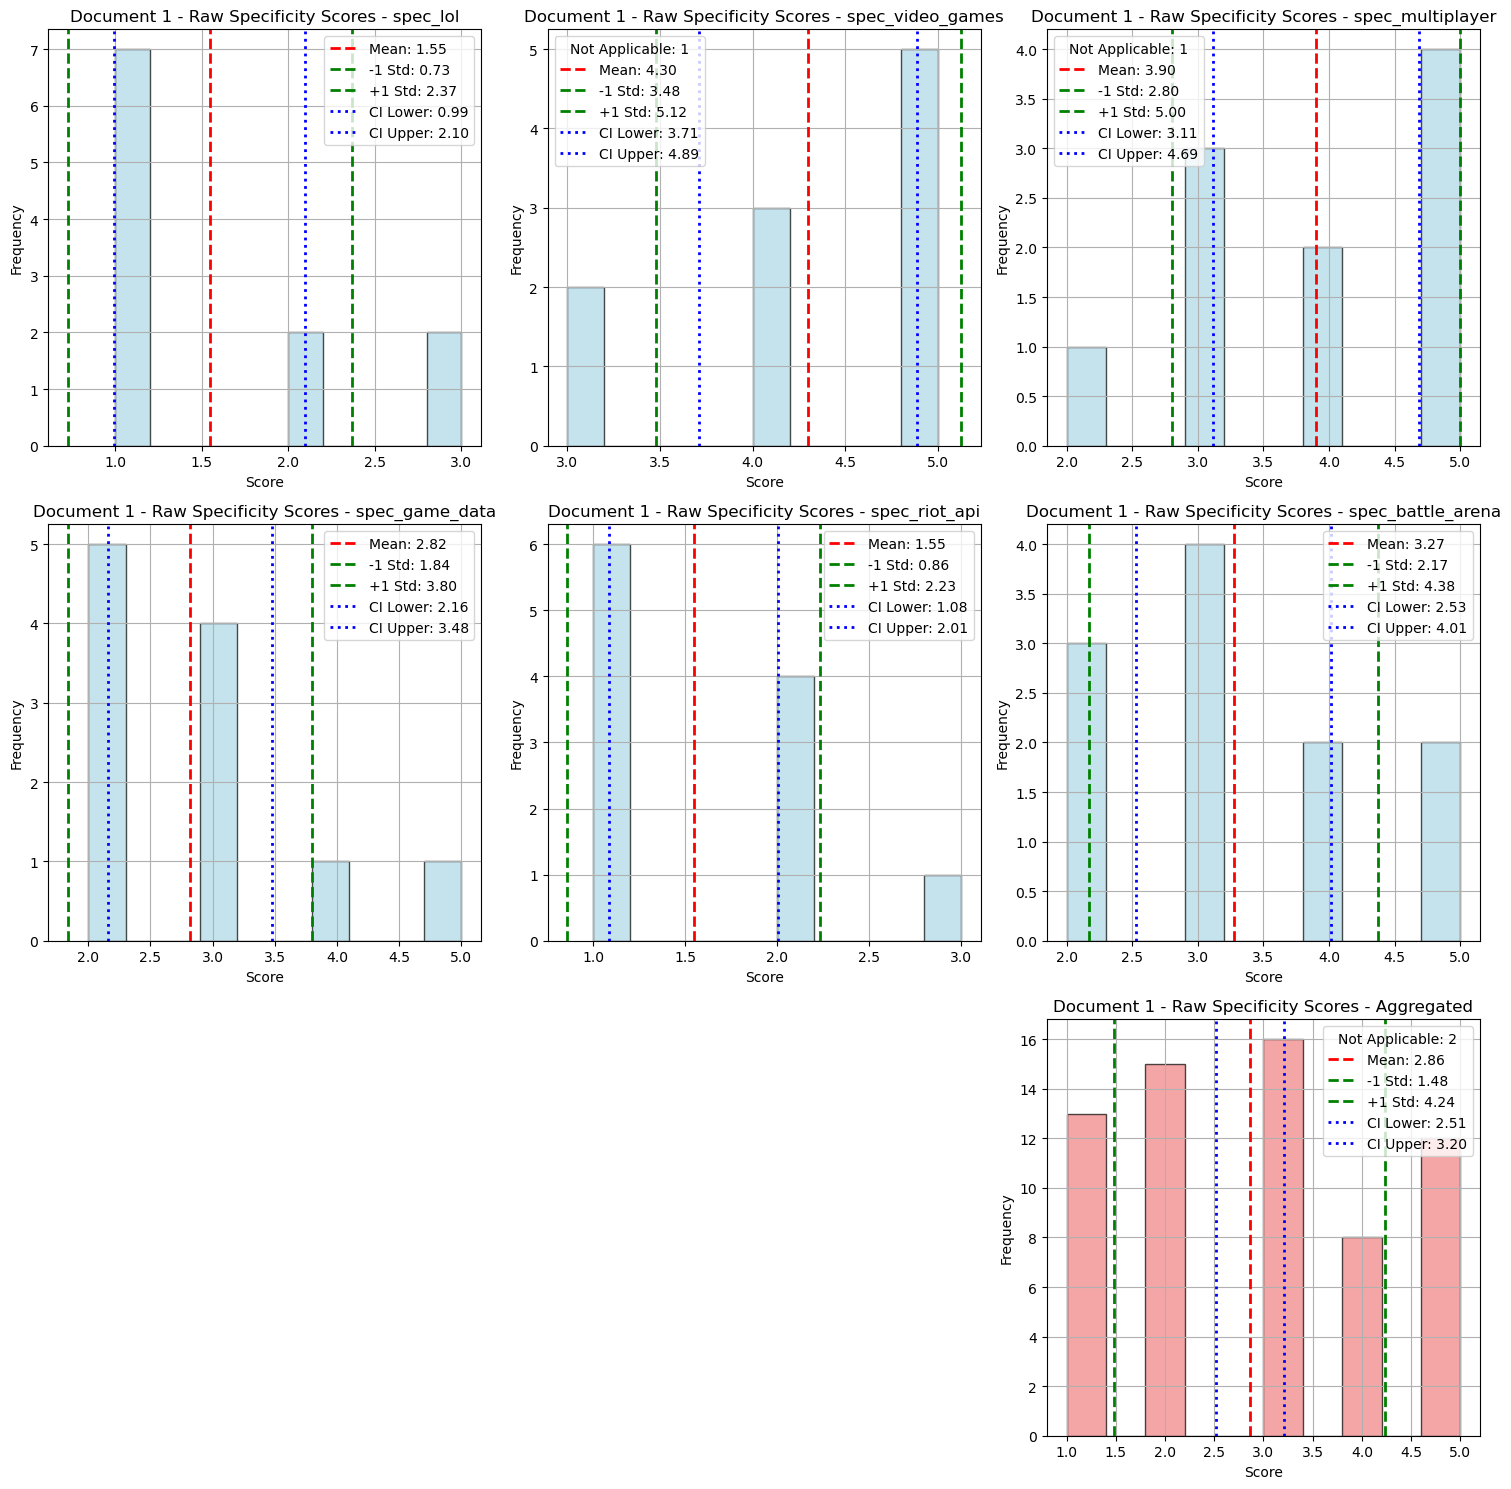

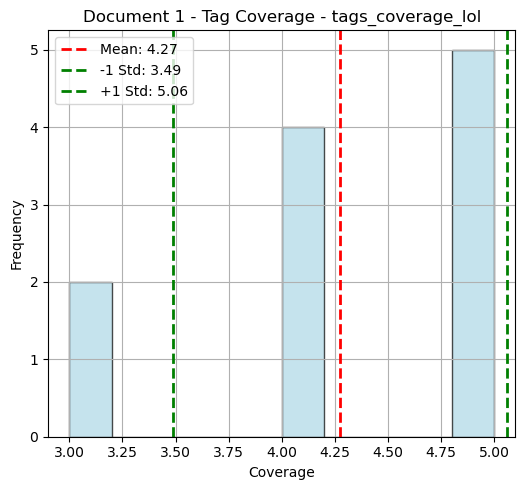

Correlation per Tag:
             Relevance vs Generality  Relevance vs Coverage  \
lol                         0.142002               0.131468   
video                       0.453571               0.346467   
multiplayer                -0.176667               0.267370   
game                        0.454220              -0.105723   
riot                       -0.112376              -0.162200   
battle                     -0.550124              -0.045723   

             Generality vs Coverage  
lol                       -0.600069  
video                     -0.521429  
multiplayer               -0.376086  
game                      -0.530345  
riot                      -0.123718  
battle                    -0.511823  

Overall Correlations:
         Relevance vs Generality  Relevance vs Coverage  \
Overall                 0.238428              -0.074068   

         Generality vs Coverage  
Overall               -0.595293  


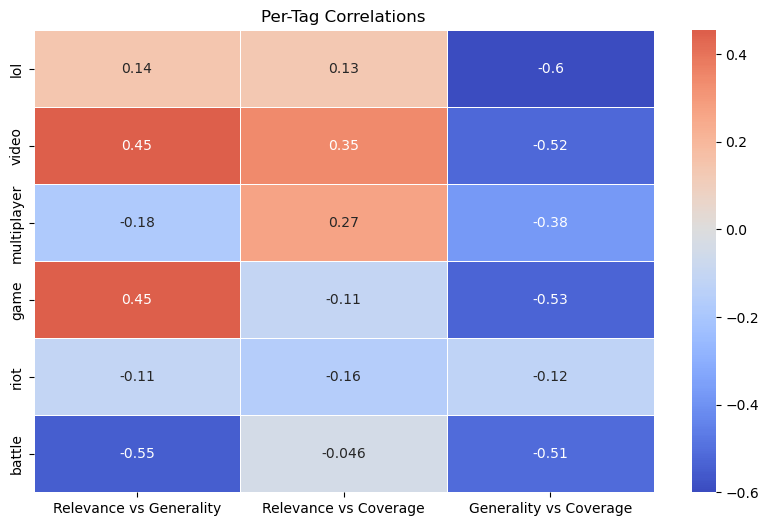

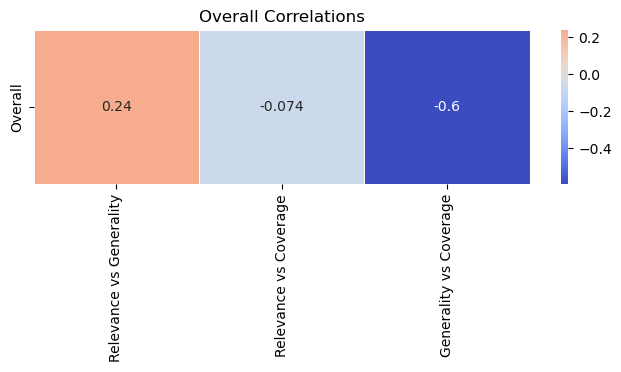


--- Analyzing Document 2 ---
Document 2 Relevance Distribution:
      tag_hist_price  tag_forex  tag_usd_jpy  tag_currency_pairs  \
std         1.044466   0.809040     1.221028            1.213560   
min         2.000000   3.000000     2.000000            2.000000   
max         5.000000   5.000000     5.000000            5.000000   
mean        4.090909   4.363636     3.909091            3.454545   

      tag_yearly_data  tag_finance  tag_minute_high  
std          0.934199     1.286291         1.507557  
min          2.000000     1.000000         1.000000  
max          5.000000     5.000000         5.000000  
mean         3.454545     3.363636         3.454545  
Document 2 Specificity Distribution:
      spec_hist_price  spec_forex  spec_usd_jpy  spec_currency_pairs  \
std           1.48324    1.120065      1.328020             1.213560   
min           1.00000    1.000000      1.000000             1.000000   
max           5.00000    4.000000      5.000000             5.000000   

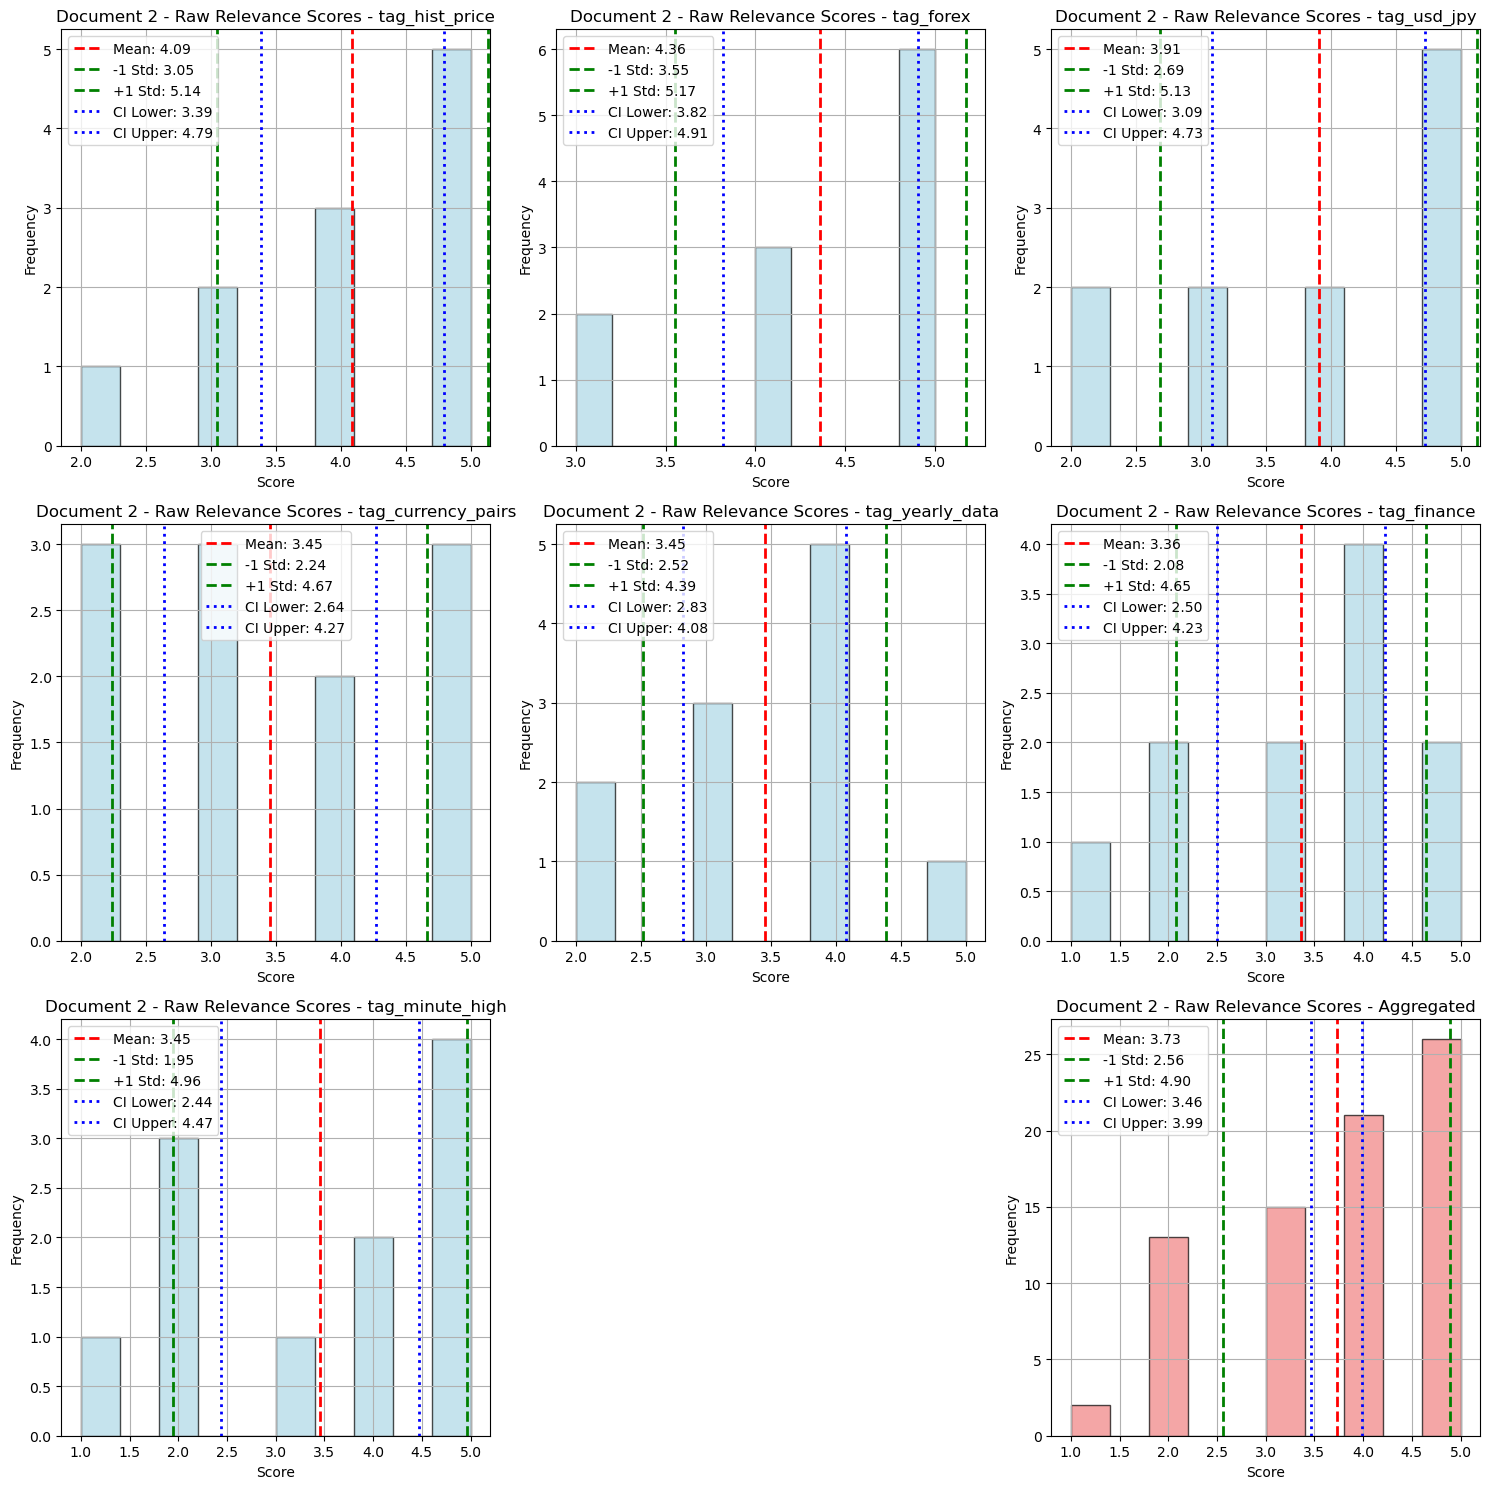

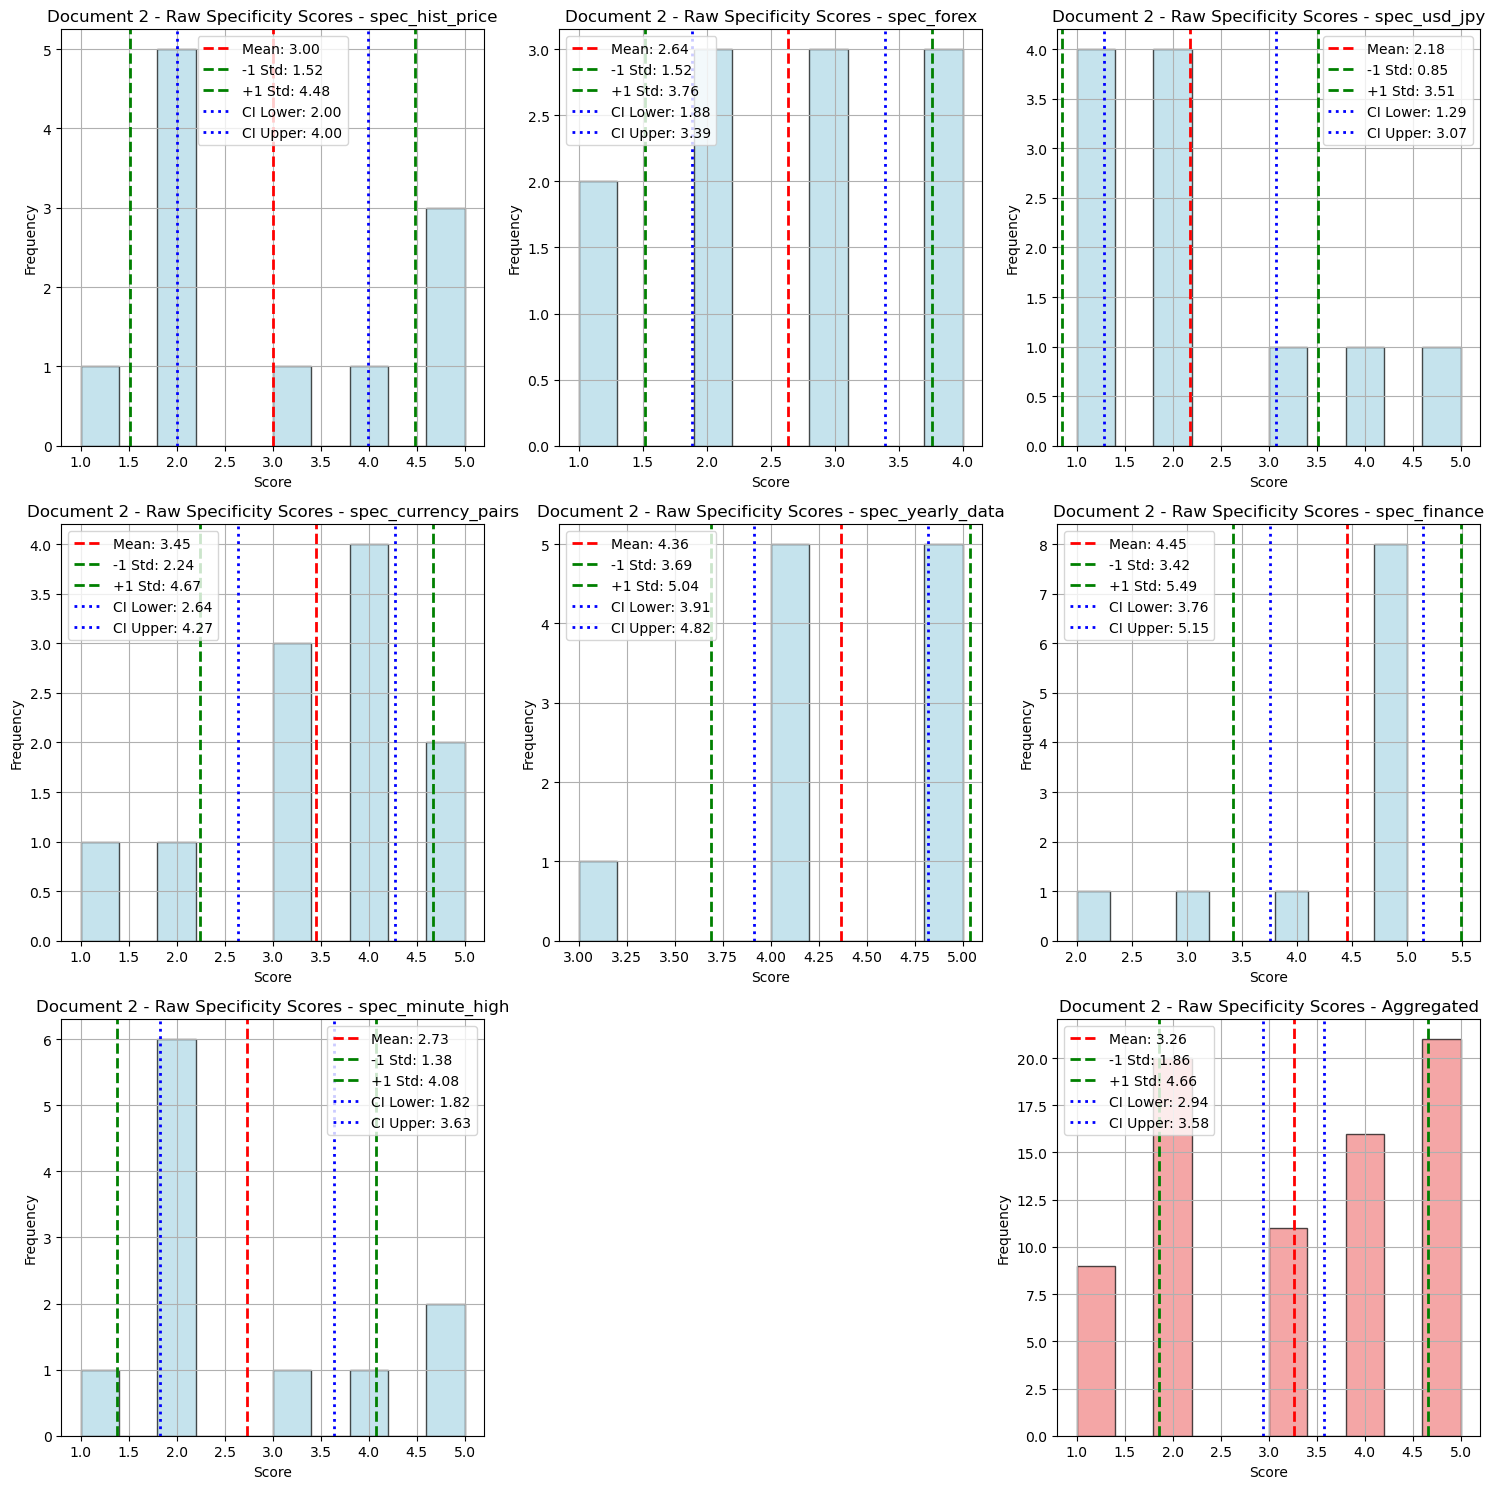

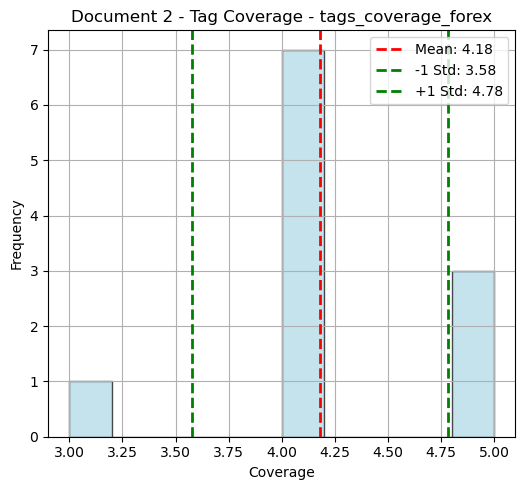

Correlation per Tag:
          Relevance vs Generality  Relevance vs Coverage  \
hist                    -0.296676               0.328360   
forex                   -0.145056               0.536223   
usd                     -0.415629               0.512564   
currency                -0.070389               0.423102   
yearly                   0.384308               0.430265   
finance                  0.032780               0.401123   
minute                  -0.151892               0.546636   

          Generality vs Coverage  
hist                   -0.045175  
forex                  -0.049454  
usd                     0.212426  
currency                0.634981  
yearly                  0.624611  
finance                -0.081349  
minute                  0.524534  

Overall Correlations:
         Relevance vs Generality  Relevance vs Coverage  \
Overall                -0.102587               0.512812   

         Generality vs Coverage  
Overall                0.411347  


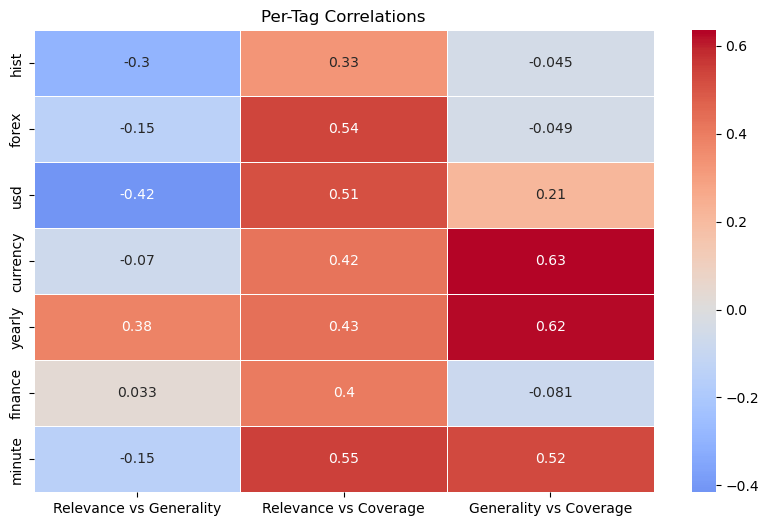

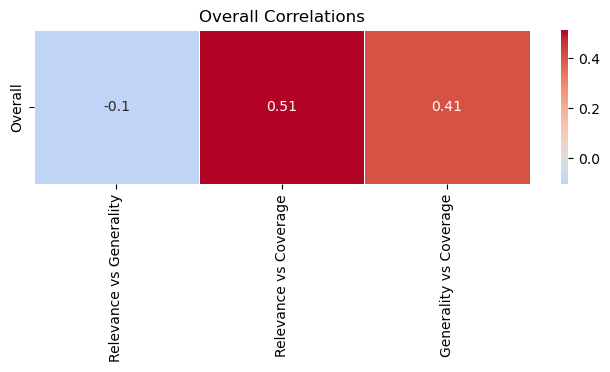


--- Analyzing Document 3 ---
Document 3 Relevance Distribution:
      tag_lung_cancer  tag_cancer  tag_oncology  tag_mrna_prof  tag_biology  \
std          0.504525    1.044466      1.300350       1.078720     0.750757   
min          4.000000    2.000000      1.000000       2.000000     1.000000   
max          5.000000    5.000000      5.000000       5.000000     4.000000   
mean         4.636364    3.909091      3.909091       4.181818     2.818182   

      tag_carcinomas  tag_gene_expr  
std         0.924416       0.774597  
min         2.000000       3.000000  
max         5.000000       5.000000  
mean        3.636364       4.000000  
Document 3 Specificity Distribution:
      spec_lung_cancer  spec_cancer  spec_oncology  spec_mrna_prof  \
std           0.981650     1.190874       1.272078        1.103713   
min           1.000000     1.000000       1.000000        1.000000   
max           4.000000     5.000000       5.000000        4.000000   
mean          2.181818     3.727

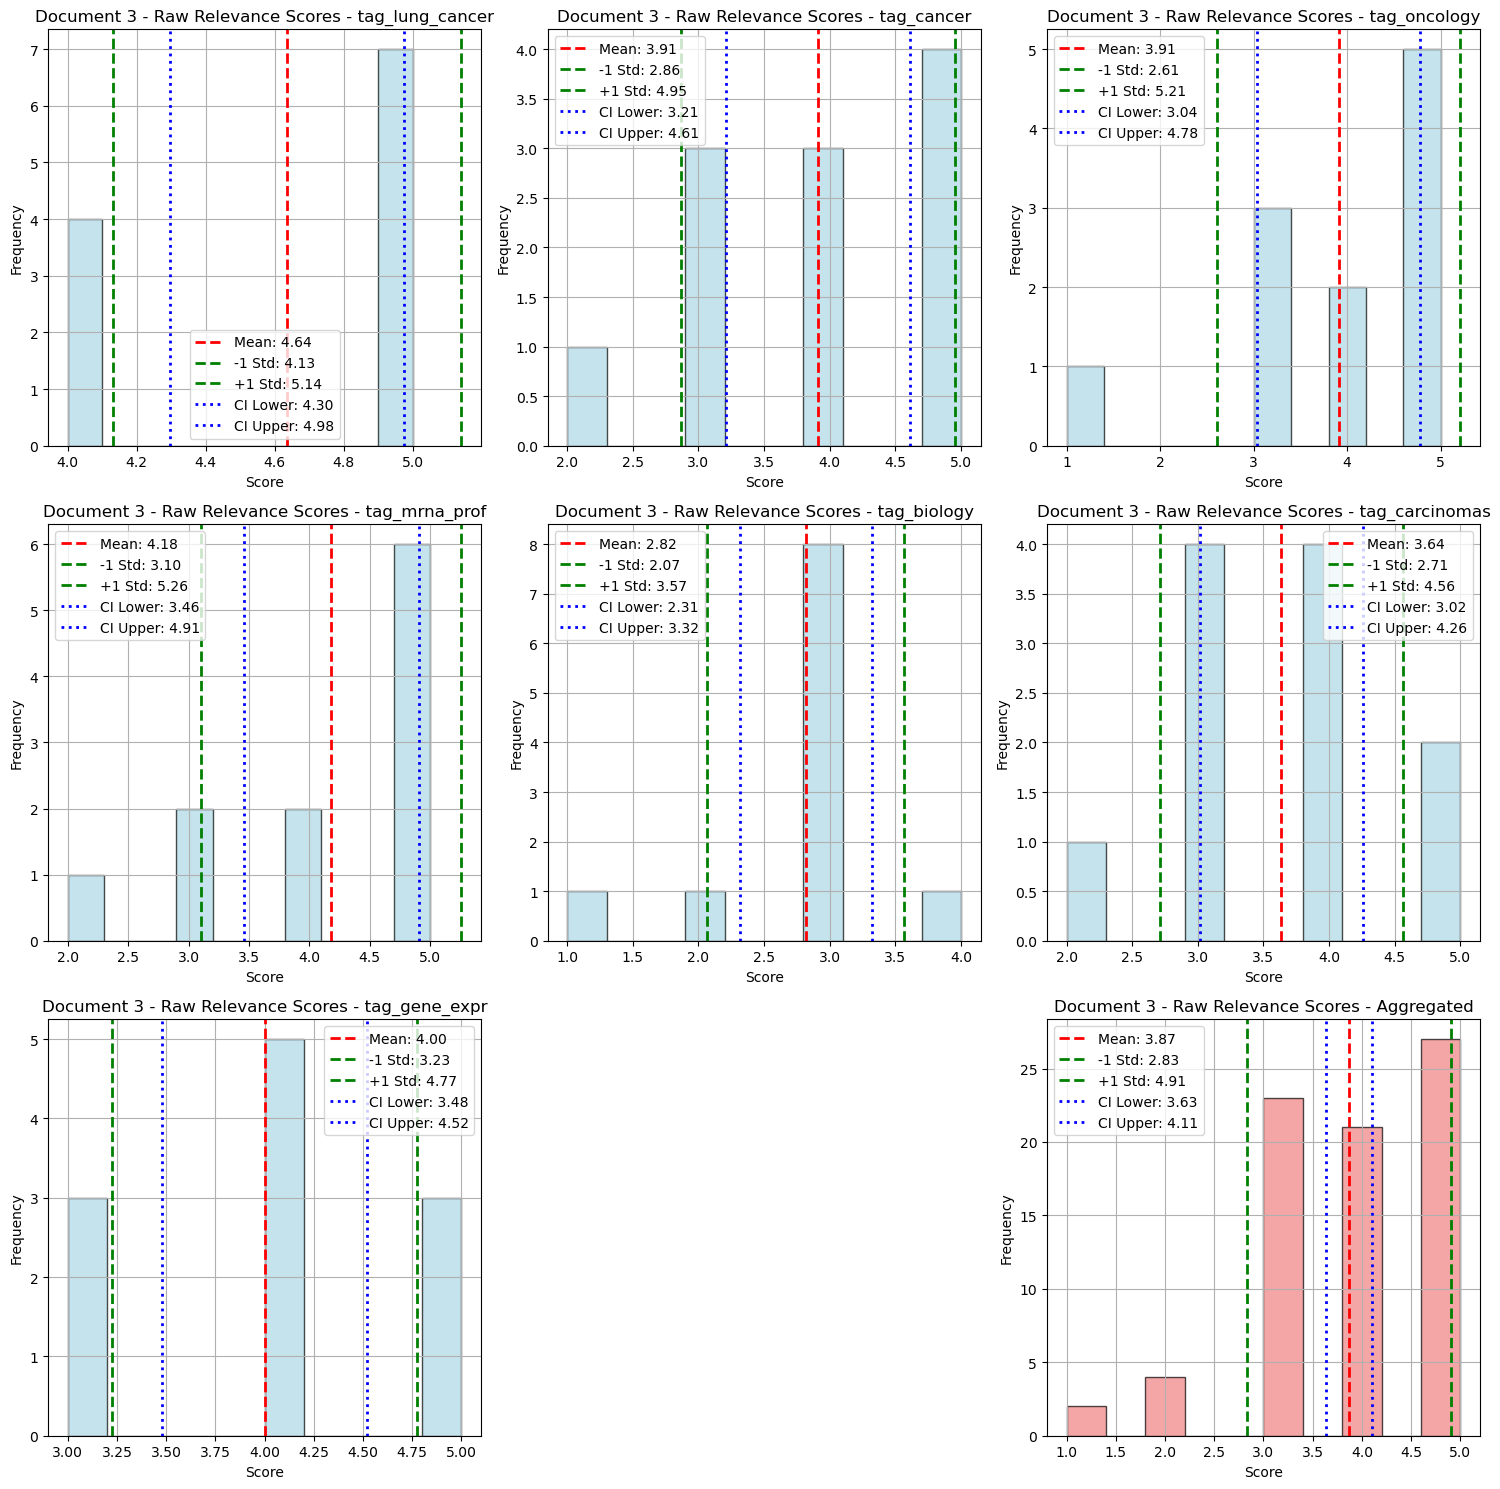

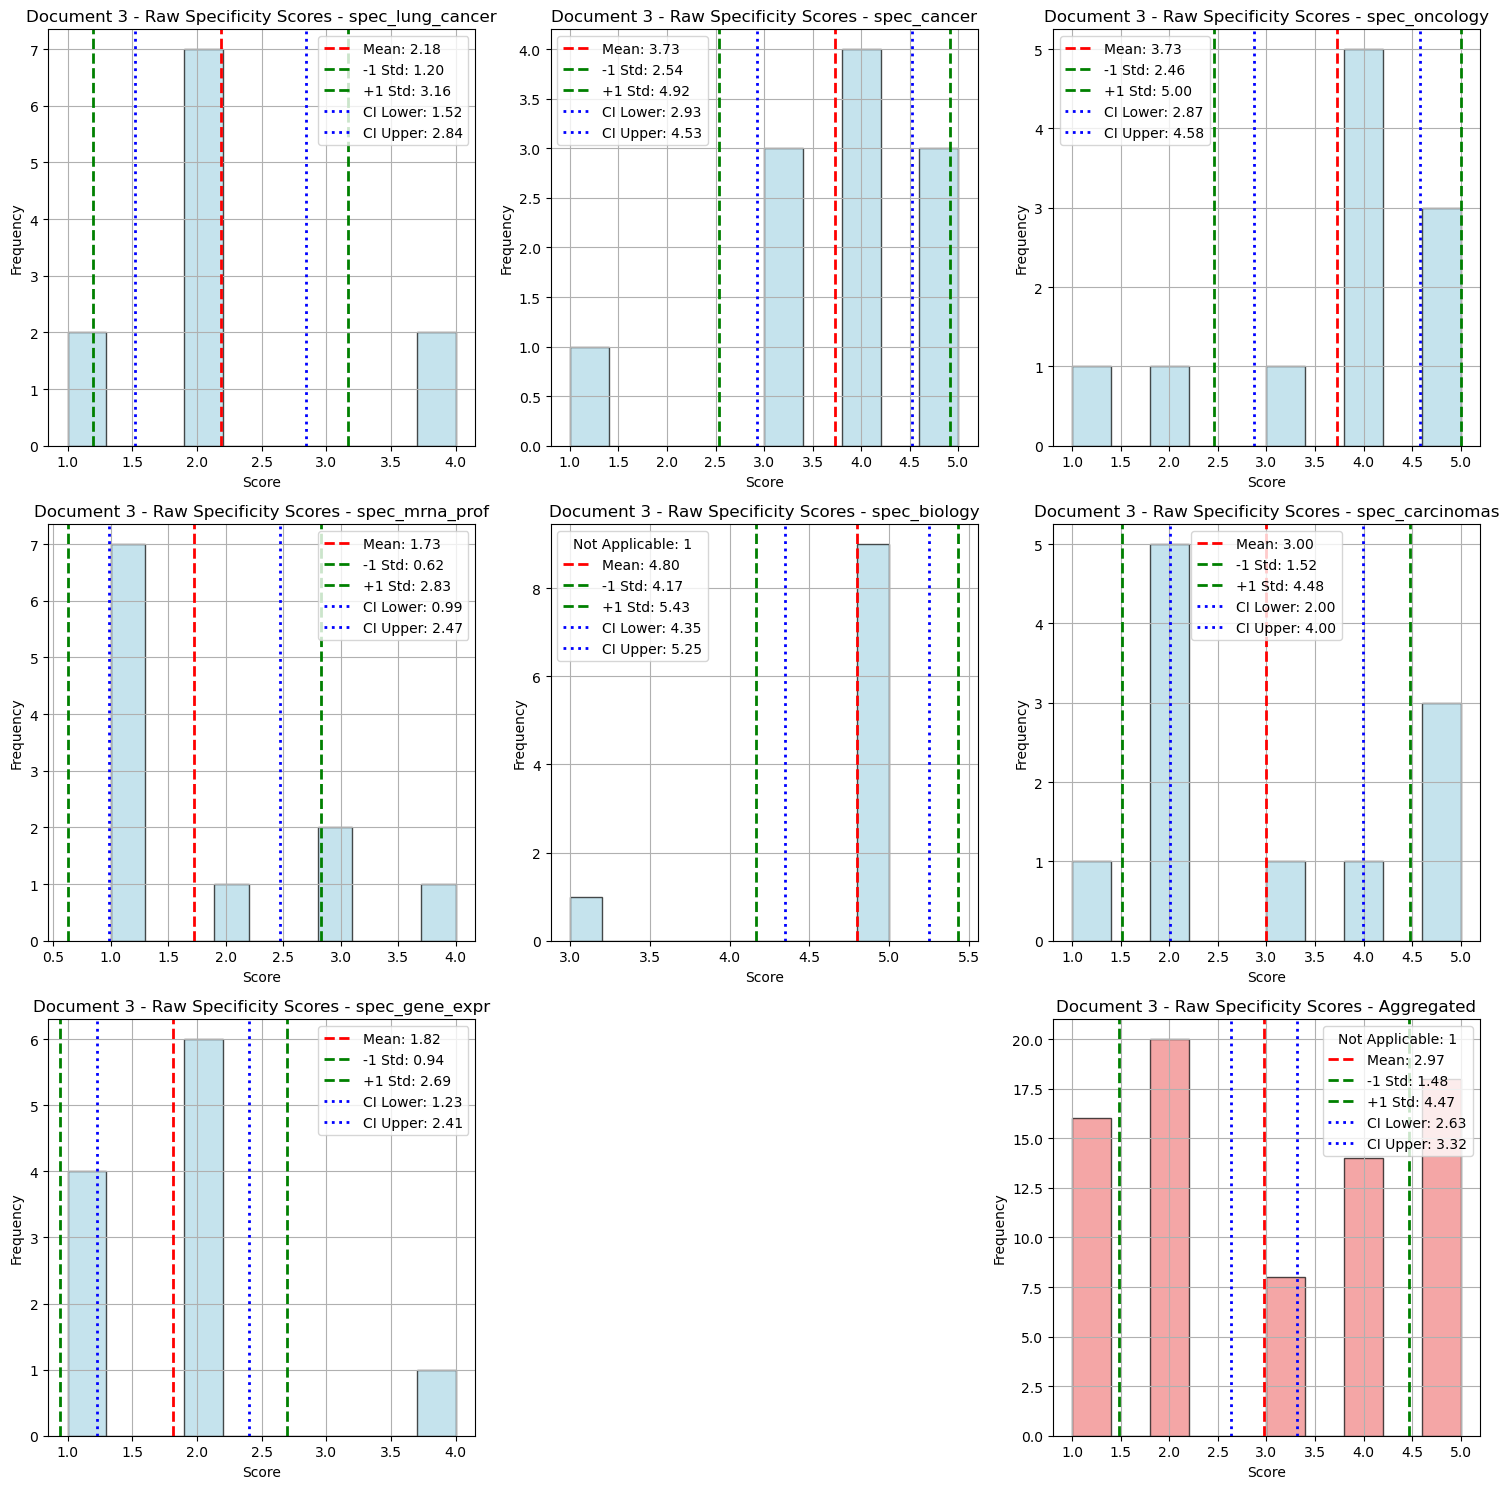

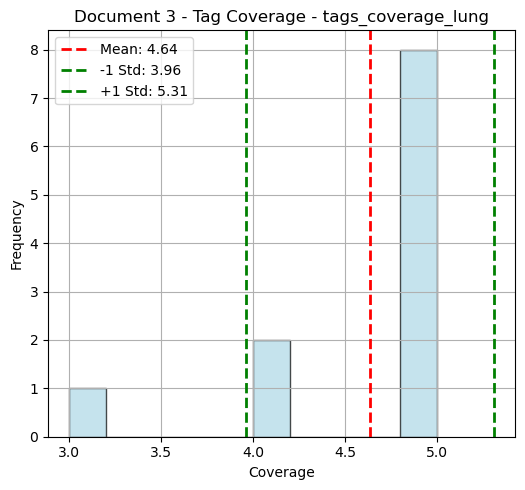

Correlation per Tag:
            Relevance vs Generality  Relevance vs Coverage  \
lung                       0.000000               0.419593   
cancer                    -0.086634               0.205891   
oncology                   0.102302               0.240370   
mrna                      -0.581898               0.225858   
biology                    0.000000              -0.047971   
carcinomas                -0.921546               0.259296   
gene                      -0.807406              -0.248452   

            Generality vs Coverage  
lung                     -0.304290  
cancer                   -0.099917  
oncology                  0.000000  
mrna                      0.444921  
biology                  -0.165635  
carcinomas               -0.079919  
gene                      0.003253  

Overall Correlations:
         Relevance vs Generality  Relevance vs Coverage  \
Overall                -0.232877               0.168659   

         Generality vs Coverage  
Overall   

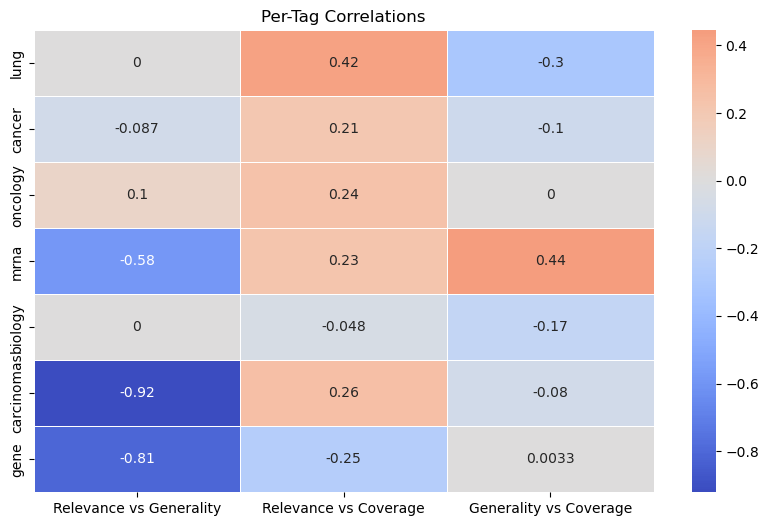

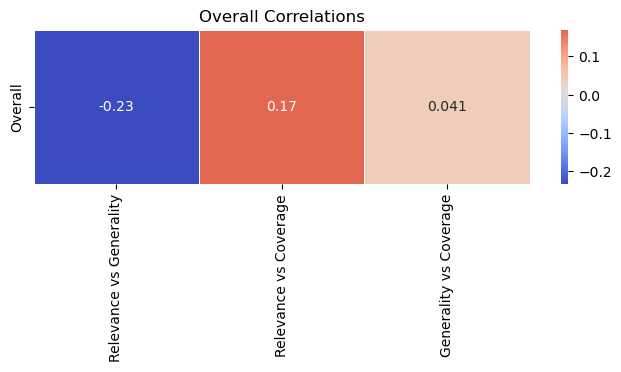

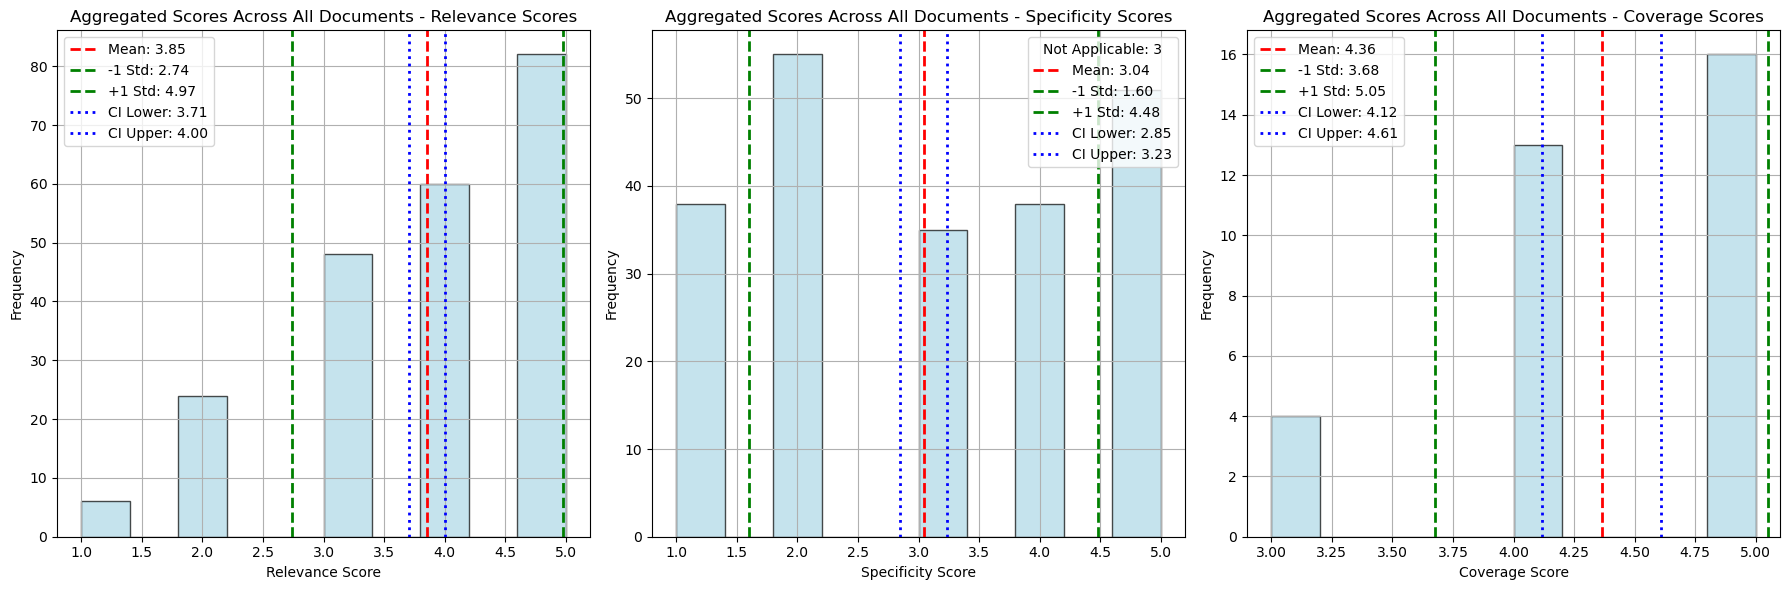

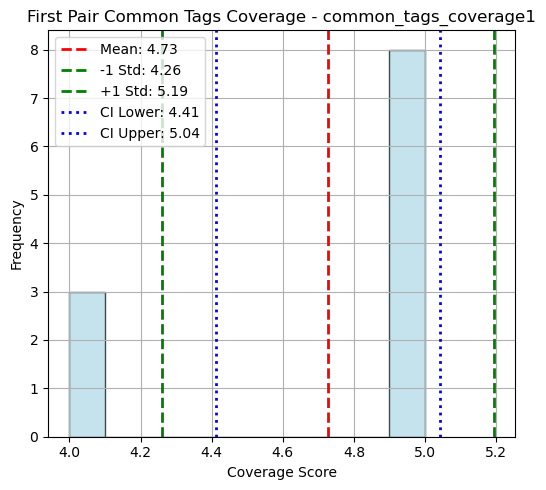

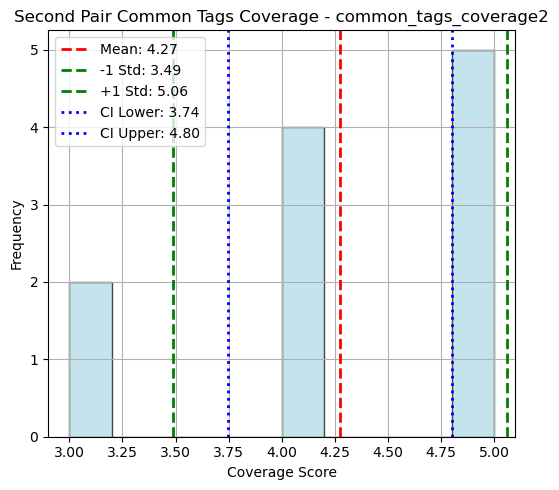


Metrics for First Pair Common Tags:
Accuracy: 0.84
Precision: 0.85
Recall: 0.75
F1-Score: 0.80

Metrics for Second Pair Common Tags:
Accuracy: 0.88
Precision: 0.74
Recall: 0.88
F1-Score: 0.81


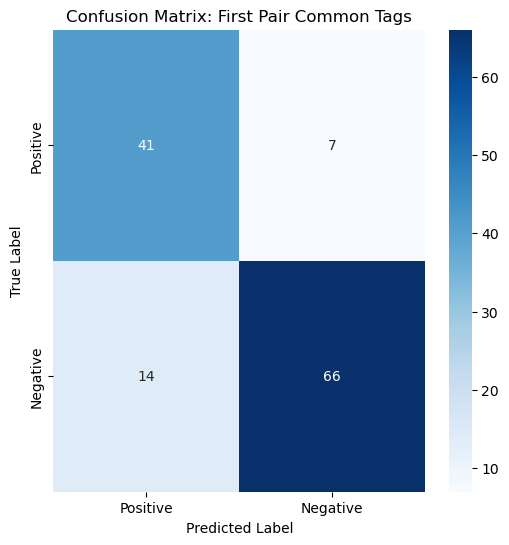

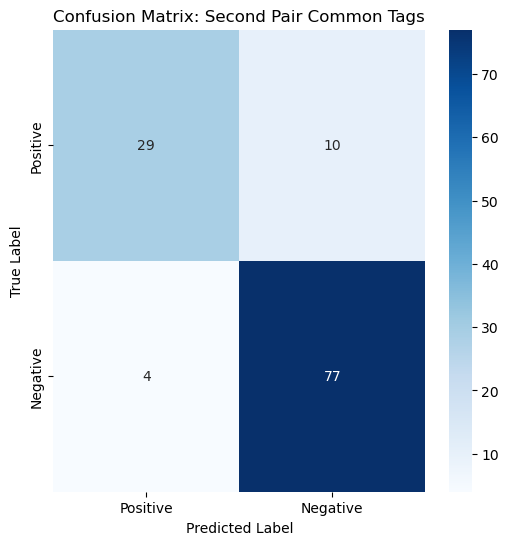

In [168]:
analyze_tags(
    df_human_generated,
    relevance_columns_list=[
        human_first_document_relevance_columns, 
        human_second_document_relevance_columns,
        human_third_document_relevance_columns
    ],
    spec_columns_list=[
        human_first_document_spec_columns, 
        human_second_document_spec_columns,
        human_third_document_spec_columns
    ],
    coverage_columns_list=[
        human_first_document_coverage_columns, 
        human_second_document_coverage_columns,
        human_third_document_coverage_columns
    ],
    suggested_columns_list=[
        human_first_document_suggested_columns,
        human_second_document_suggested_columns,
        human_third_document_suggested_columns
    ],
    common_tags_columns_1=human_first_pair_common_tags_columns,
    common_tags_true_tags_1=human_first_pair_common_tags_true_tags,
    common_tags_coverage_1=human_first_pair_coverage_columns,
    common_tags_columns_2=human_second_pair_common_tags_columns,
    common_tags_true_tags_2=human_second_pair_common_tags_true_tags,
    common_tags_coverage_2=human_second_pair_coverage_columns
)

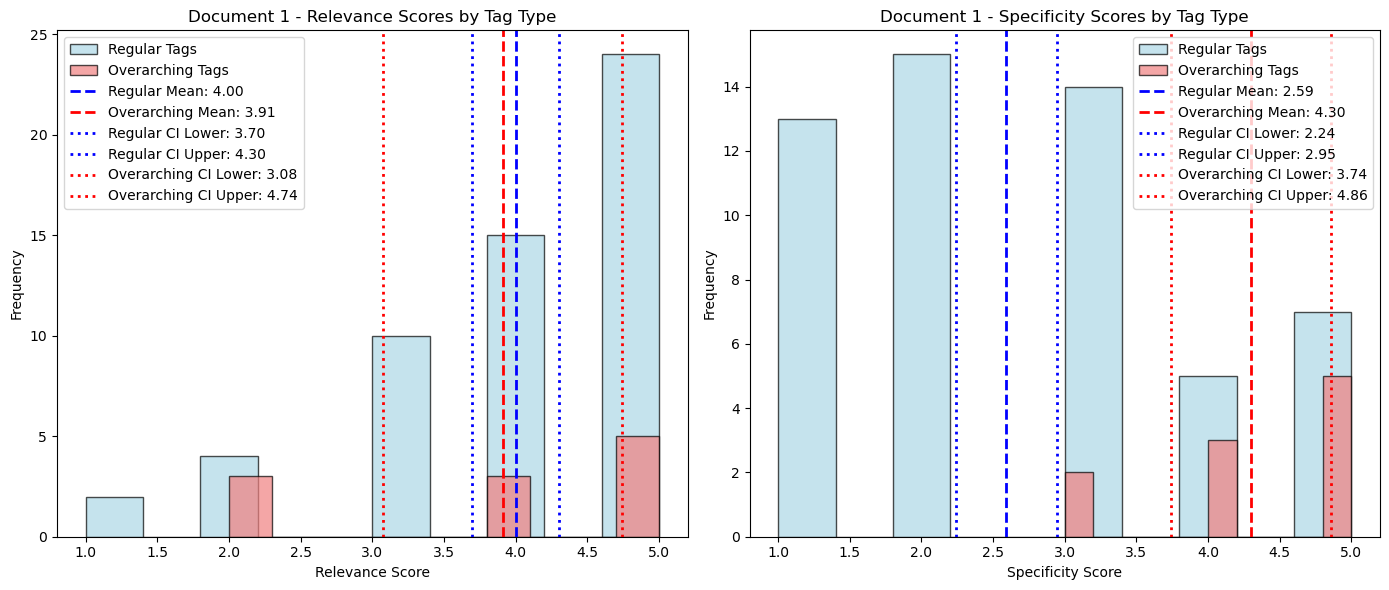

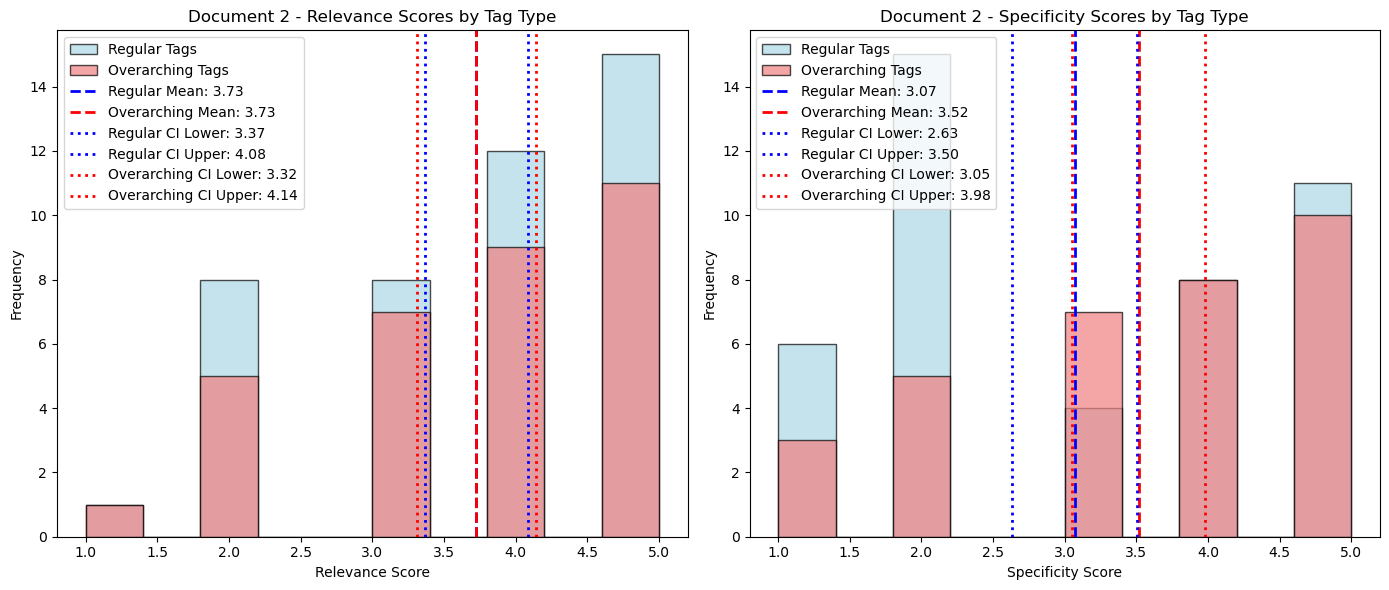

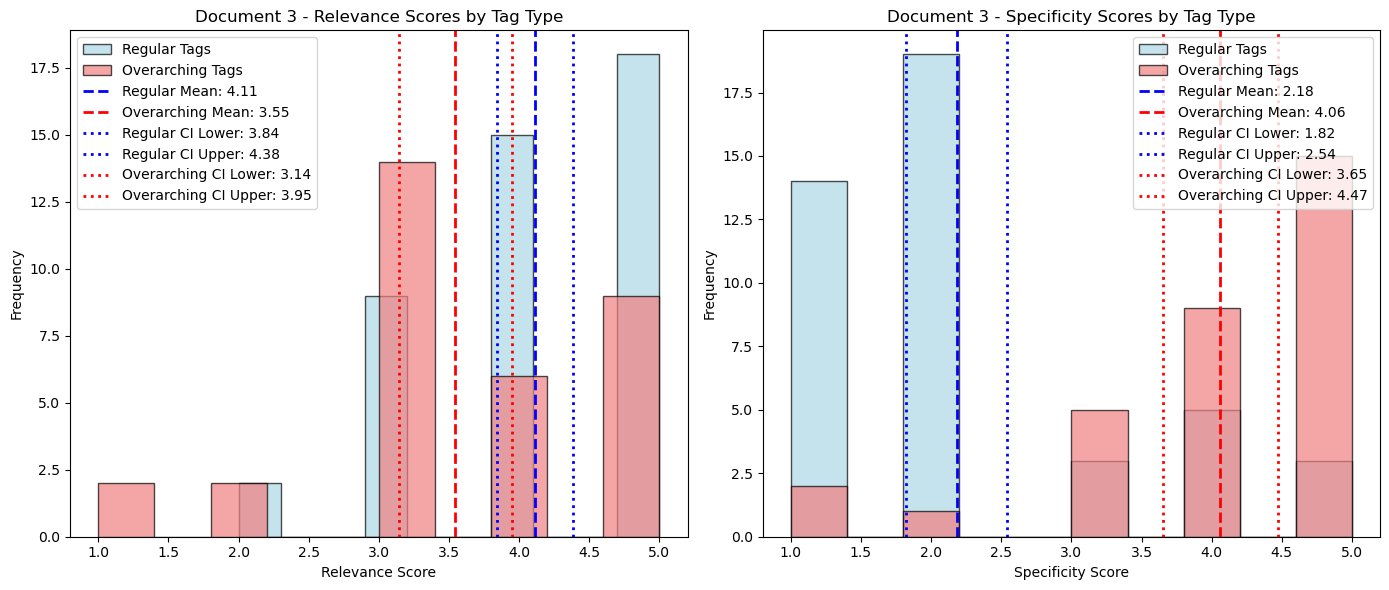

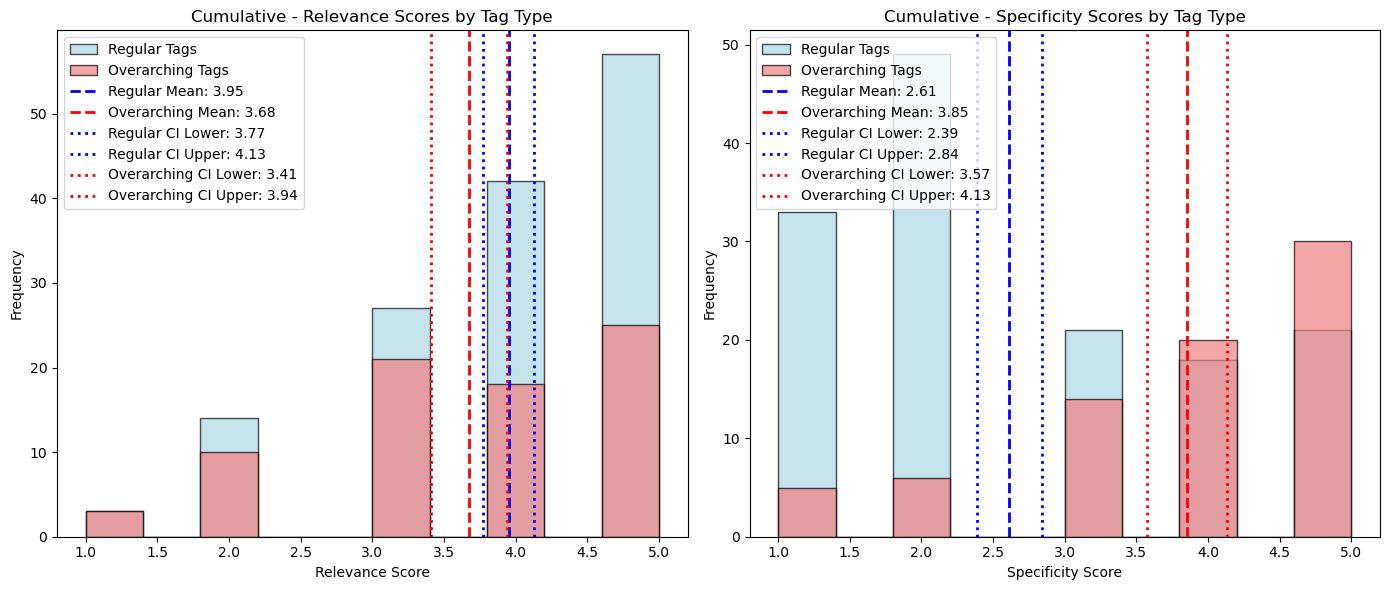

In [169]:
# Define document-specific relevance columns, specificity columns, tag types, and document names
doc_relevance_columns_list = [
    human_first_document_relevance_columns,
    human_second_document_relevance_columns,
    human_third_document_relevance_columns
]

doc_spec_columns_list = [
    human_first_document_spec_columns,
    human_second_document_spec_columns,
    human_third_document_spec_columns
]

doc_tag_types_list = [
    human_first_document_tag_types,
    human_second_document_tag_types,
    human_third_document_tag_types
]

document_names = ['Document 1', 'Document 2', 'Document 3']

# Call the function for all documents and cumulative results
plot_relevance_specificity_multiple_documents(df_human_generated, 
                                              doc_relevance_columns_list, 
                                              doc_spec_columns_list, 
                                              doc_tag_types_list, 
                                              document_names)

In [170]:
df_model_generated.columns

Index(['timestamp', 'age_range', 'gender', 'education', 'english_prof',
       'lol_game_desc', 'tag_ranked_matches', 'tag_games',
       'tag_league_of_legends', 'tag_game_data_analysis', 'tag_computer_games',
       'tag_gaming', 'tag_esports', 'spec_ranked_matches', 'spec_games',
       'spec_league_of_legends', 'spec_game_data_analysis',
       'spec_computer_games', 'spec_gaming', 'spec_esports',
       'tags_coverage_lol', 'suggested_tags_lol', 'forex_desc',
       'tag_historical_price_data', 'tag_minute_interval',
       'tag_historical_data', 'tag_forex', 'tag_candlestick', 'tag_minute',
       'tag_high', 'spec_historical_price_data', 'spec_minute_interval',
       'spec_historical_data', 'spec_forex', 'spec_candlestick', 'spec_minute',
       'spec_high', 'tags_coverage_forex', 'suggested_tags_forex',
       'lung_cancer_desc', 'tag_lung_cancer', 'tag_cancer', 'tag_science',
       'tag_cancer_research', 'tag_biology', 'tag_medicine', 'tag_health',
       'spec_lung_cancer',

In [171]:
model_first_document_relevance_columns = ['tag_ranked_matches', 'tag_games', 'tag_league_of_legends', 'tag_game_data_analysis', 'tag_computer_games', 'tag_gaming', 'tag_esports']
model_first_document_spec_columns = ['spec_ranked_matches', 'spec_games', 'spec_league_of_legends', 'spec_game_data_analysis', 'spec_computer_games', 'spec_gaming', 'spec_esports']
model_first_document_coverage_columns = ['tags_coverage_lol']
model_first_document_suggested_columns = ['suggested_tags_lol']
model_first_document_tag_types = {
    'overarching': ['tag_games', 'tag_computer_games', 'tag_gaming', 'tag_esports'],
    'regular': ['tag_ranked_matches', 'tag_league_of_legends', 'tag_game_data_analysis']
}

model_second_document_relevance_columns = ['tag_historical_price_data', 'tag_minute_interval', 'tag_historical_data', 'tag_forex', 'tag_candlestick', 'tag_minute', 'tag_high']
model_second_document_spec_columns = ['spec_historical_price_data', 'spec_minute_interval', 'spec_historical_data', 'spec_forex', 'spec_candlestick', 'spec_minute', 'spec_high']
model_second_document_coverage_columns = ['tags_coverage_forex']
model_second_document_suggested_columns = ['suggested_tags_forex']
model_second_document_tag_types = {
    'regular': ['tag_historical_price_data', 'tag_minute_interval', 'tag_historical_data', 'tag_forex', 'tag_candlestick', 'tag_minute', 'tag_high'],
    'overarching': []
}

model_third_document_relevance_columns = ['tag_lung_cancer', 'tag_cancer', 'tag_science', 'tag_cancer_research', 'tag_biology', 'tag_medicine', 'tag_health']
model_third_document_spec_columns = ['spec_lung_cancer', 'spec_cancer', 'spec_science', 'spec_cancer_research', 'spec_biology', 'spec_medicine', 'spec_health']
model_third_document_coverage_columns = ['tags_coverage_lung']
model_third_document_suggested_columns = ['suggested_tags_lung']
model_third_document_tag_types = {
    'overarching': ['tag_cancer', 'tag_science', 'tag_cancer_research', 'tag_biology', 'tag_medicine', 'tag_health'],
    'regular': ['tag_lung_cancer']
}

model_first_pair_common_tags_columns = ['common_tags1']
model_first_pair_common_tags_true_tags = ["Coronavirus", "Covid-19", "Health", "Public Health", "Epidemiology"]
model_first_pair_coverage = ['common_tags_coverage1']

model_second_pair_common_tags_columns = ['common_tags2']
model_second_pair_common_tags_true_tags = ["Movies", "Film", "Media", "Entertainment"]
model_second_pair_coverage_columns = ['common_tags_coverage2']


--- Analyzing Document 1 ---
Document 1 Relevance Distribution:
      tag_ranked_matches  tag_games  tag_league_of_legends  \
std             0.666667   0.527046                    0.0   
min             3.000000   3.000000                    5.0   
max             5.000000   4.000000                    5.0   
mean            4.222222   3.555556                    5.0   

      tag_game_data_analysis  tag_computer_games  tag_gaming  tag_esports  
std                 0.833333            0.866025    0.866025     1.333333  
min                 2.000000            2.000000    2.000000     1.000000  
max                 5.000000            5.000000    5.000000     5.000000  
mean                3.777778            3.666667    3.333333     3.444444  
Document 1 Specificity Distribution:
      spec_ranked_matches  spec_games  spec_league_of_legends  \
std              0.440959    0.781736                0.666667   
min              2.000000    3.000000                1.000000   
max         

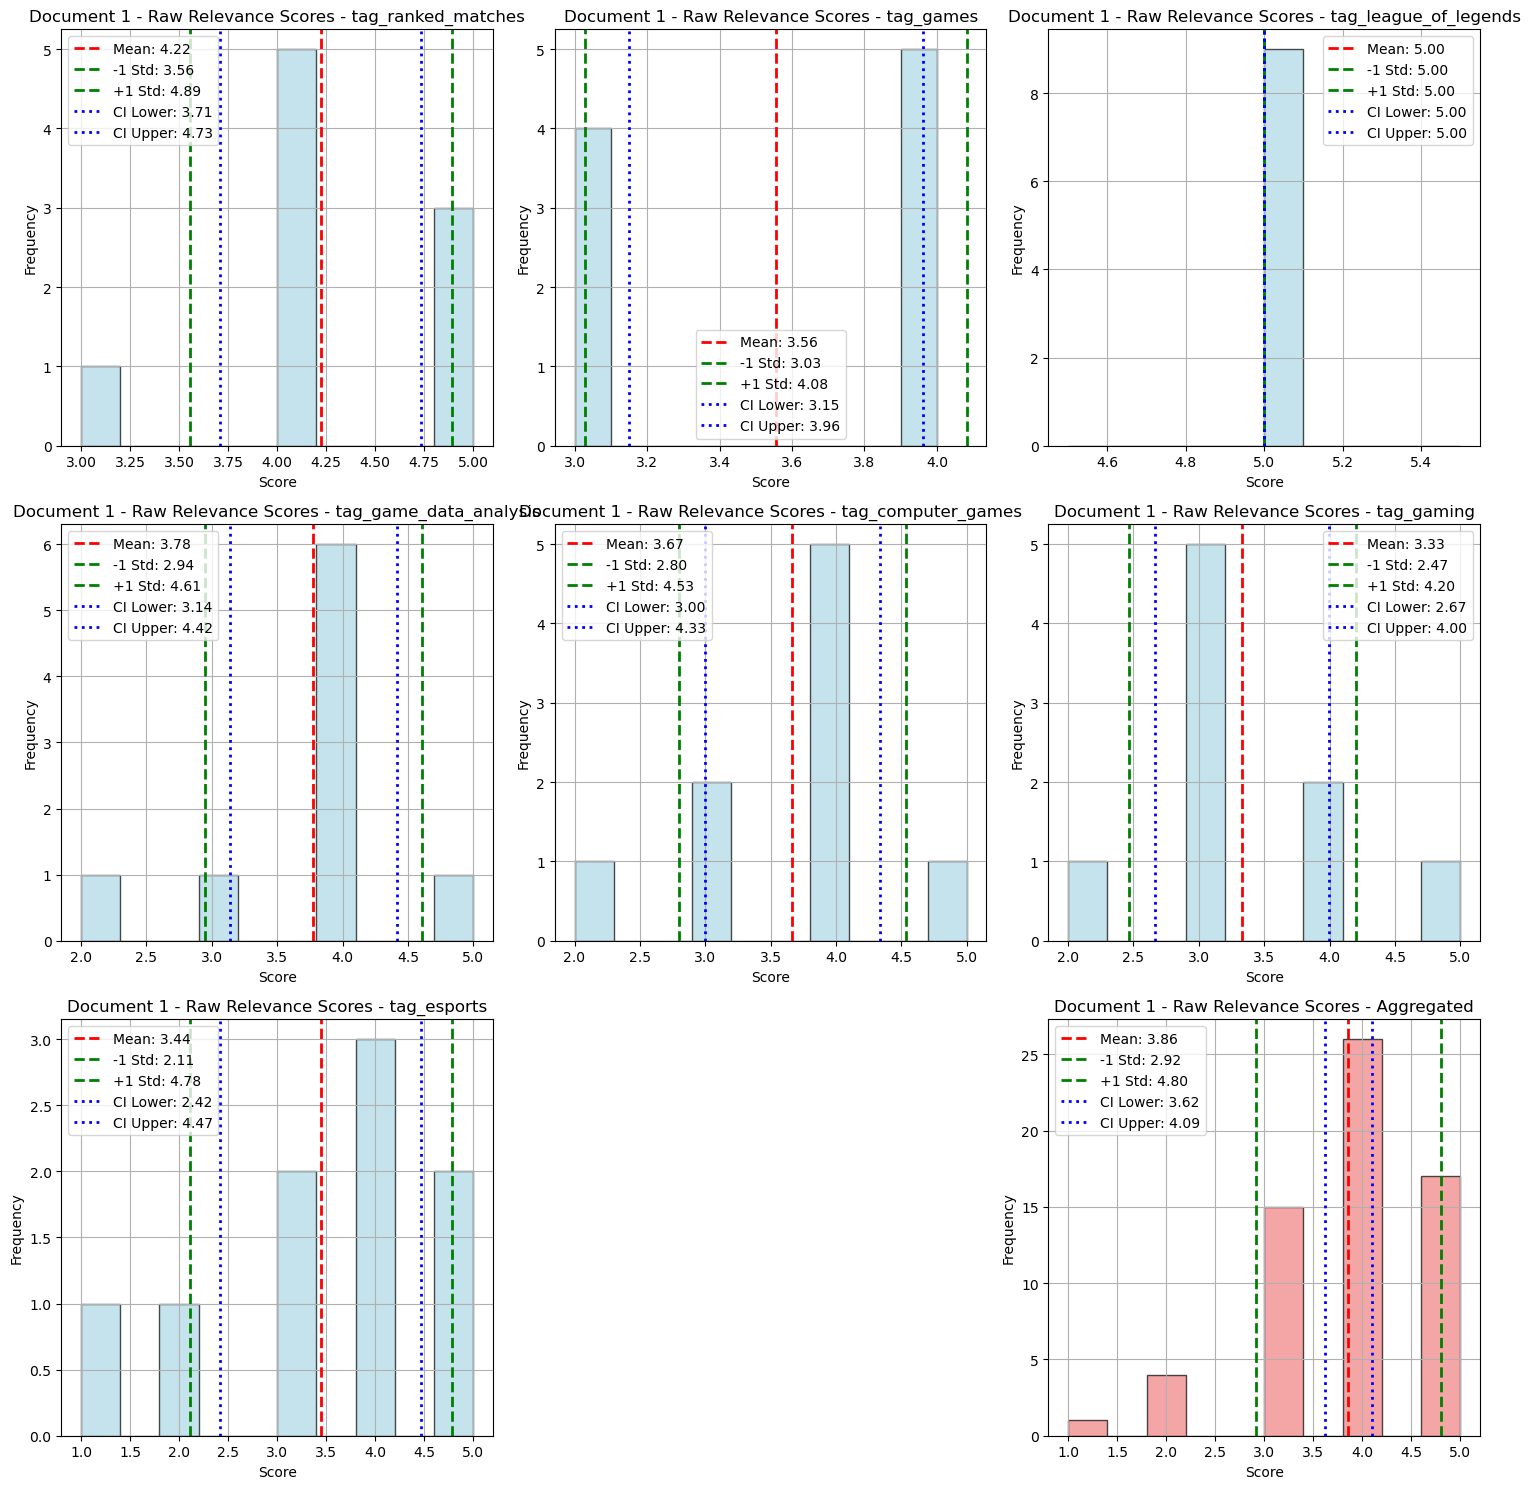

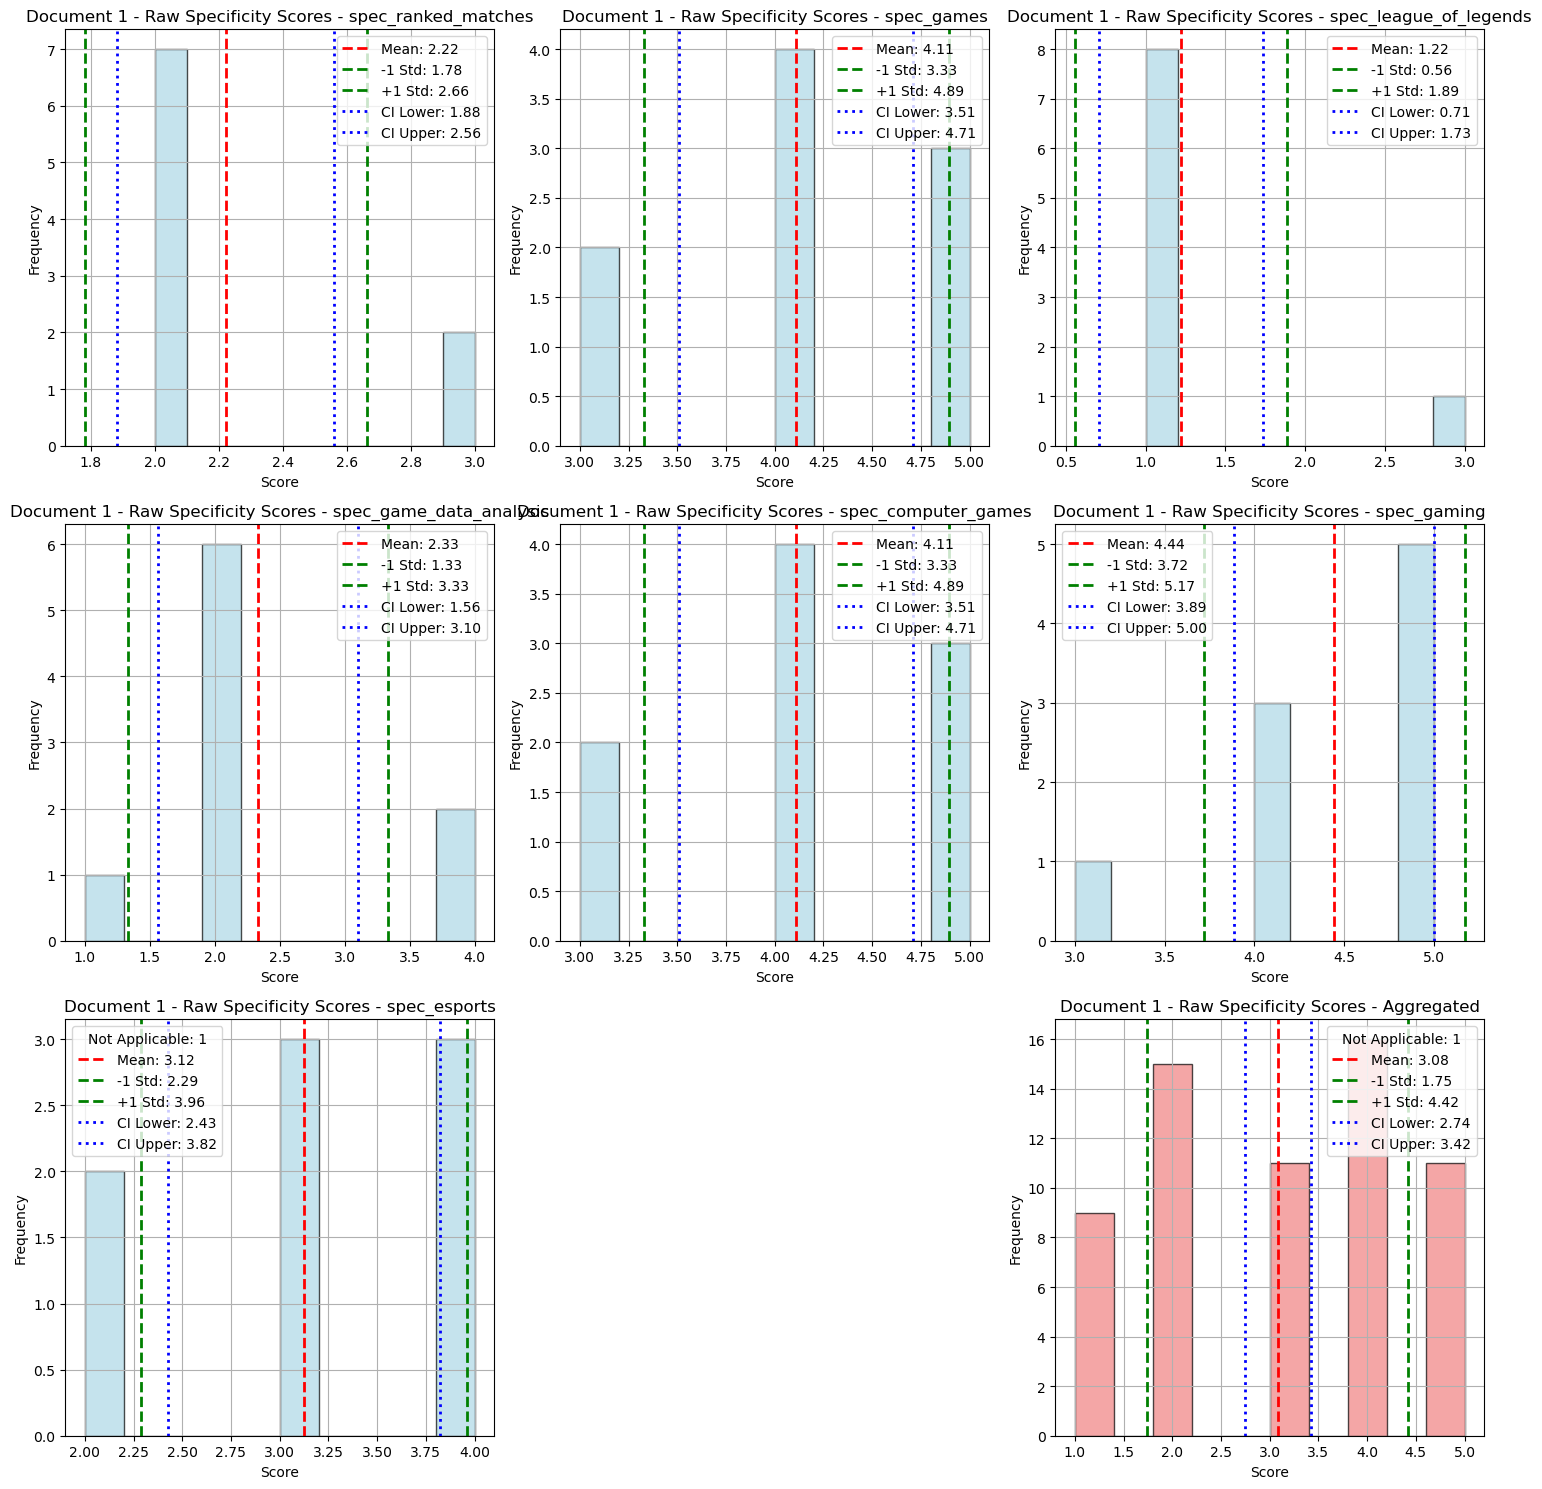

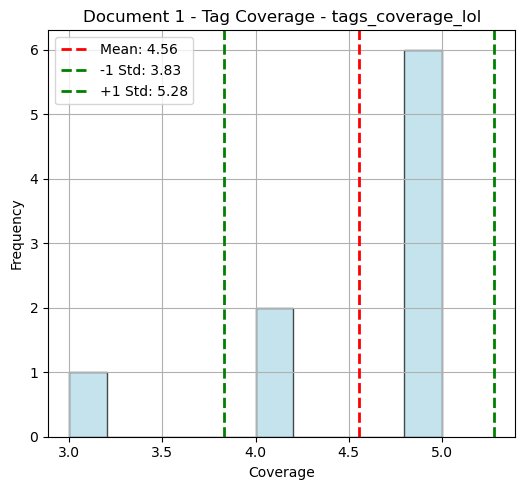

Correlation per Tag:
          Relevance vs Generality  Relevance vs Coverage  \
ranked                  -0.231455               0.567930   
games                    0.138873               0.207020   
league                        NaN                    NaN   
game                    -0.041421              -0.189352   
computer                -0.034329               0.564742   
gaming                   0.041030               0.559259   
esports                 -0.653720               0.613139   

          Generality vs Coverage  
ranked                 -0.309295  
games                   0.399298  
league                 -0.654654  
game                   -0.744048  
computer               -0.308790  
gaming                 -0.066815  
esports                 0.066667  

Overall Correlations:
         Relevance vs Generality  Relevance vs Coverage  \
Overall                -0.207794               0.739527   

         Generality vs Coverage  
Overall               -0.284885  


/Users/ivang/miniconda3/envs/openml-tags/lib/python3.10/site-packages/pandas/core/nanops.py:1632: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  return spearmanr(a, b)[0]


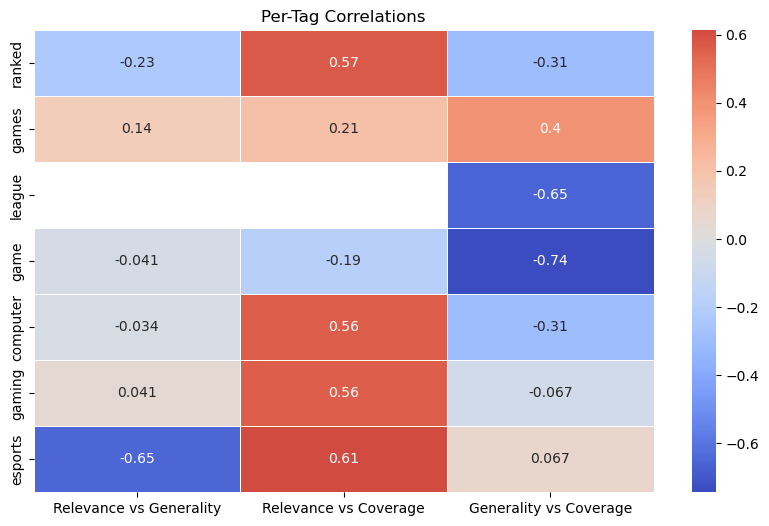

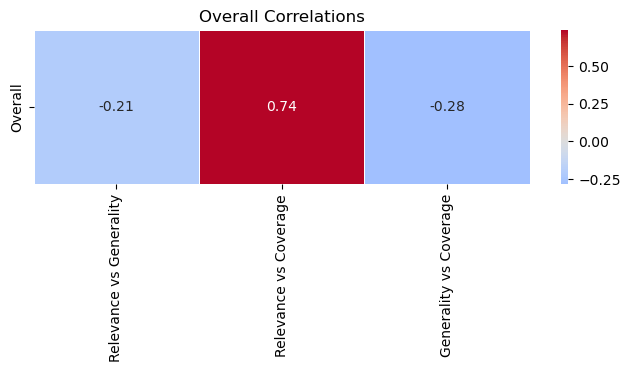


--- Analyzing Document 2 ---
Document 2 Relevance Distribution:
      tag_historical_price_data  tag_minute_interval  tag_historical_data  \
std                    0.527046             1.054093             0.971825   
min                    4.000000             2.000000             1.000000   
max                    5.000000             5.000000             4.000000   
mean                   4.444444             4.111111             3.222222   

      tag_forex  tag_candlestick  tag_minute  tag_high  
std    0.866025         0.971825    1.054093  1.236033  
min    3.000000         2.000000    1.000000  1.000000  
max    5.000000         5.000000    4.000000  4.000000  
mean   4.333333         3.777778    2.888889  2.444444  
Document 2 Specificity Distribution:
      spec_historical_price_data  spec_minute_interval  spec_historical_data  \
std                     0.707107              0.707107              1.035098   
min                     1.000000              2.000000             

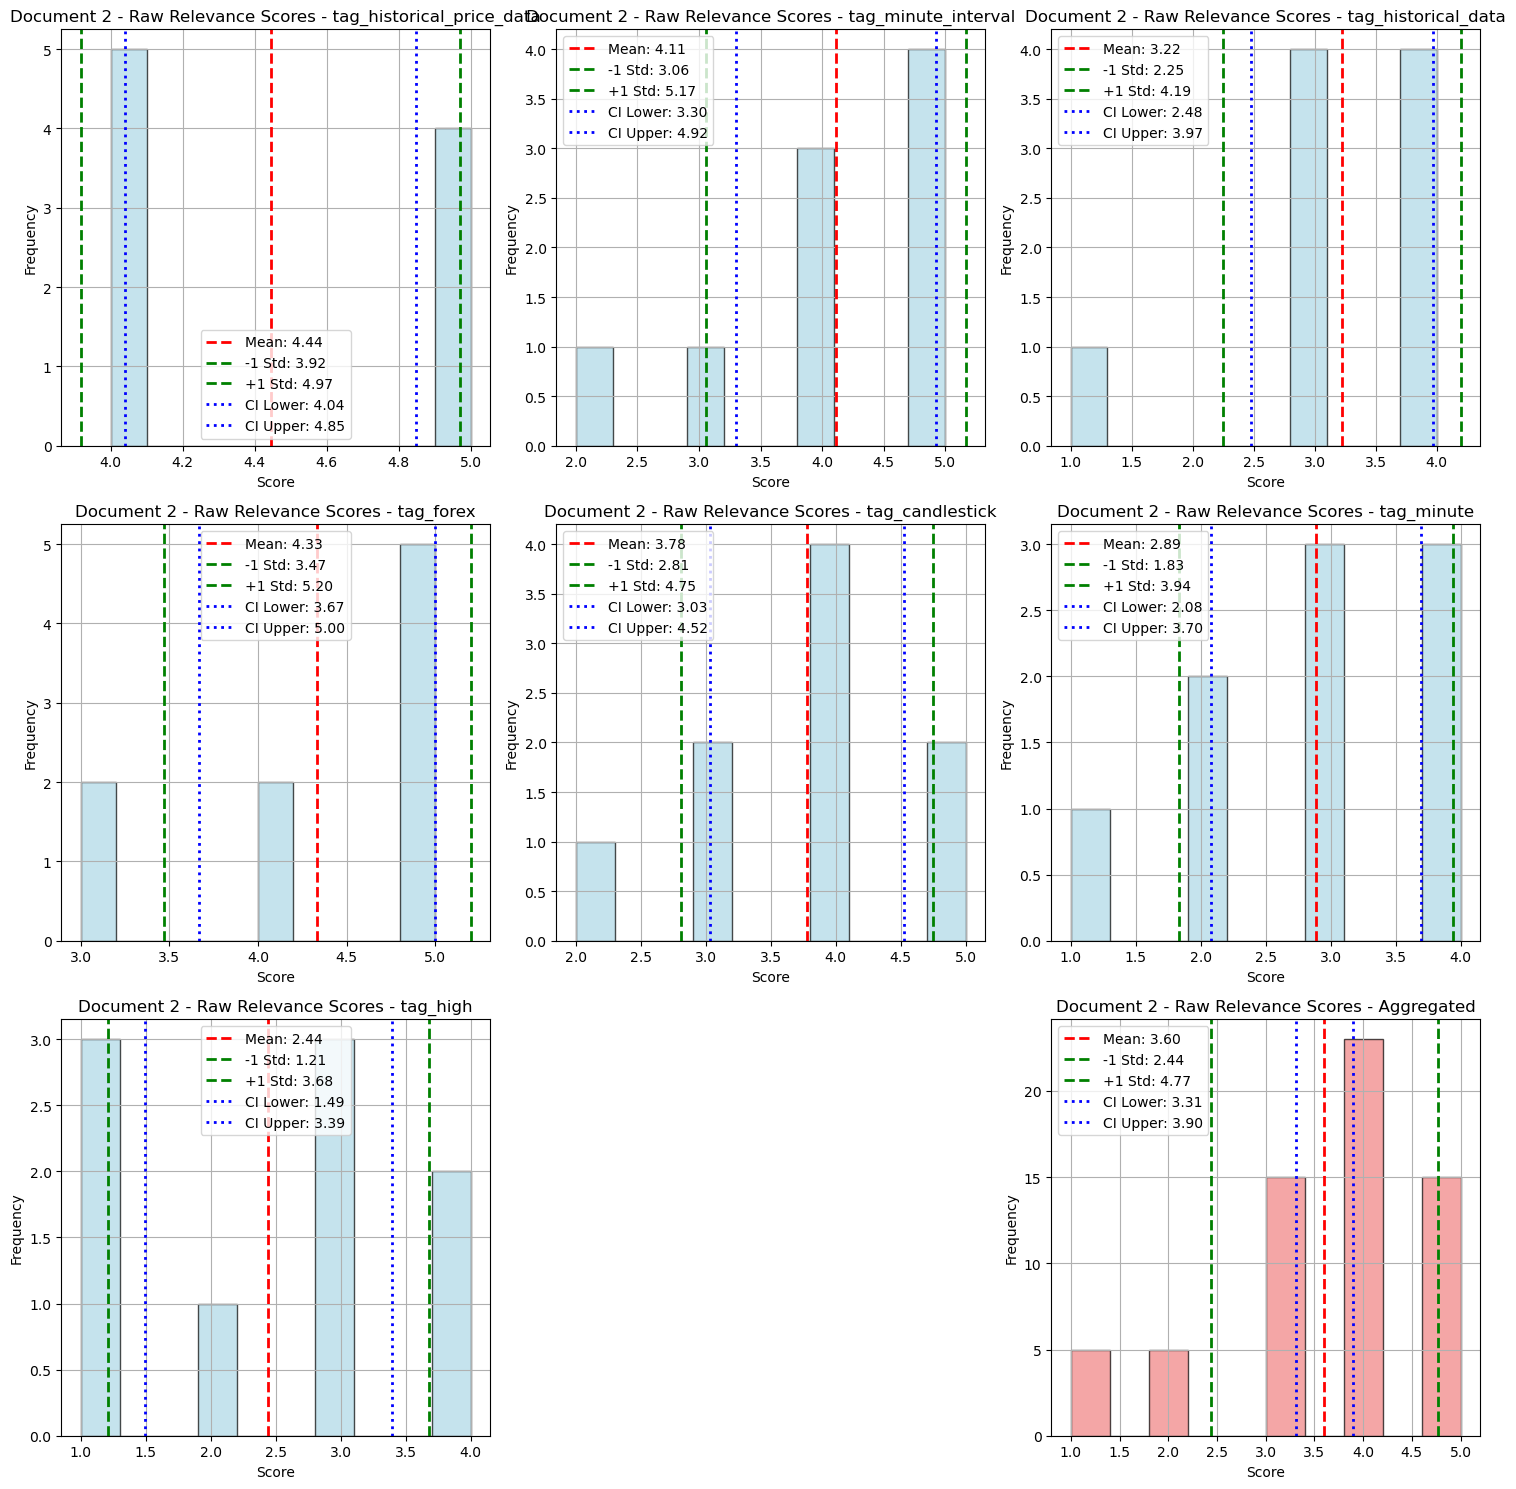

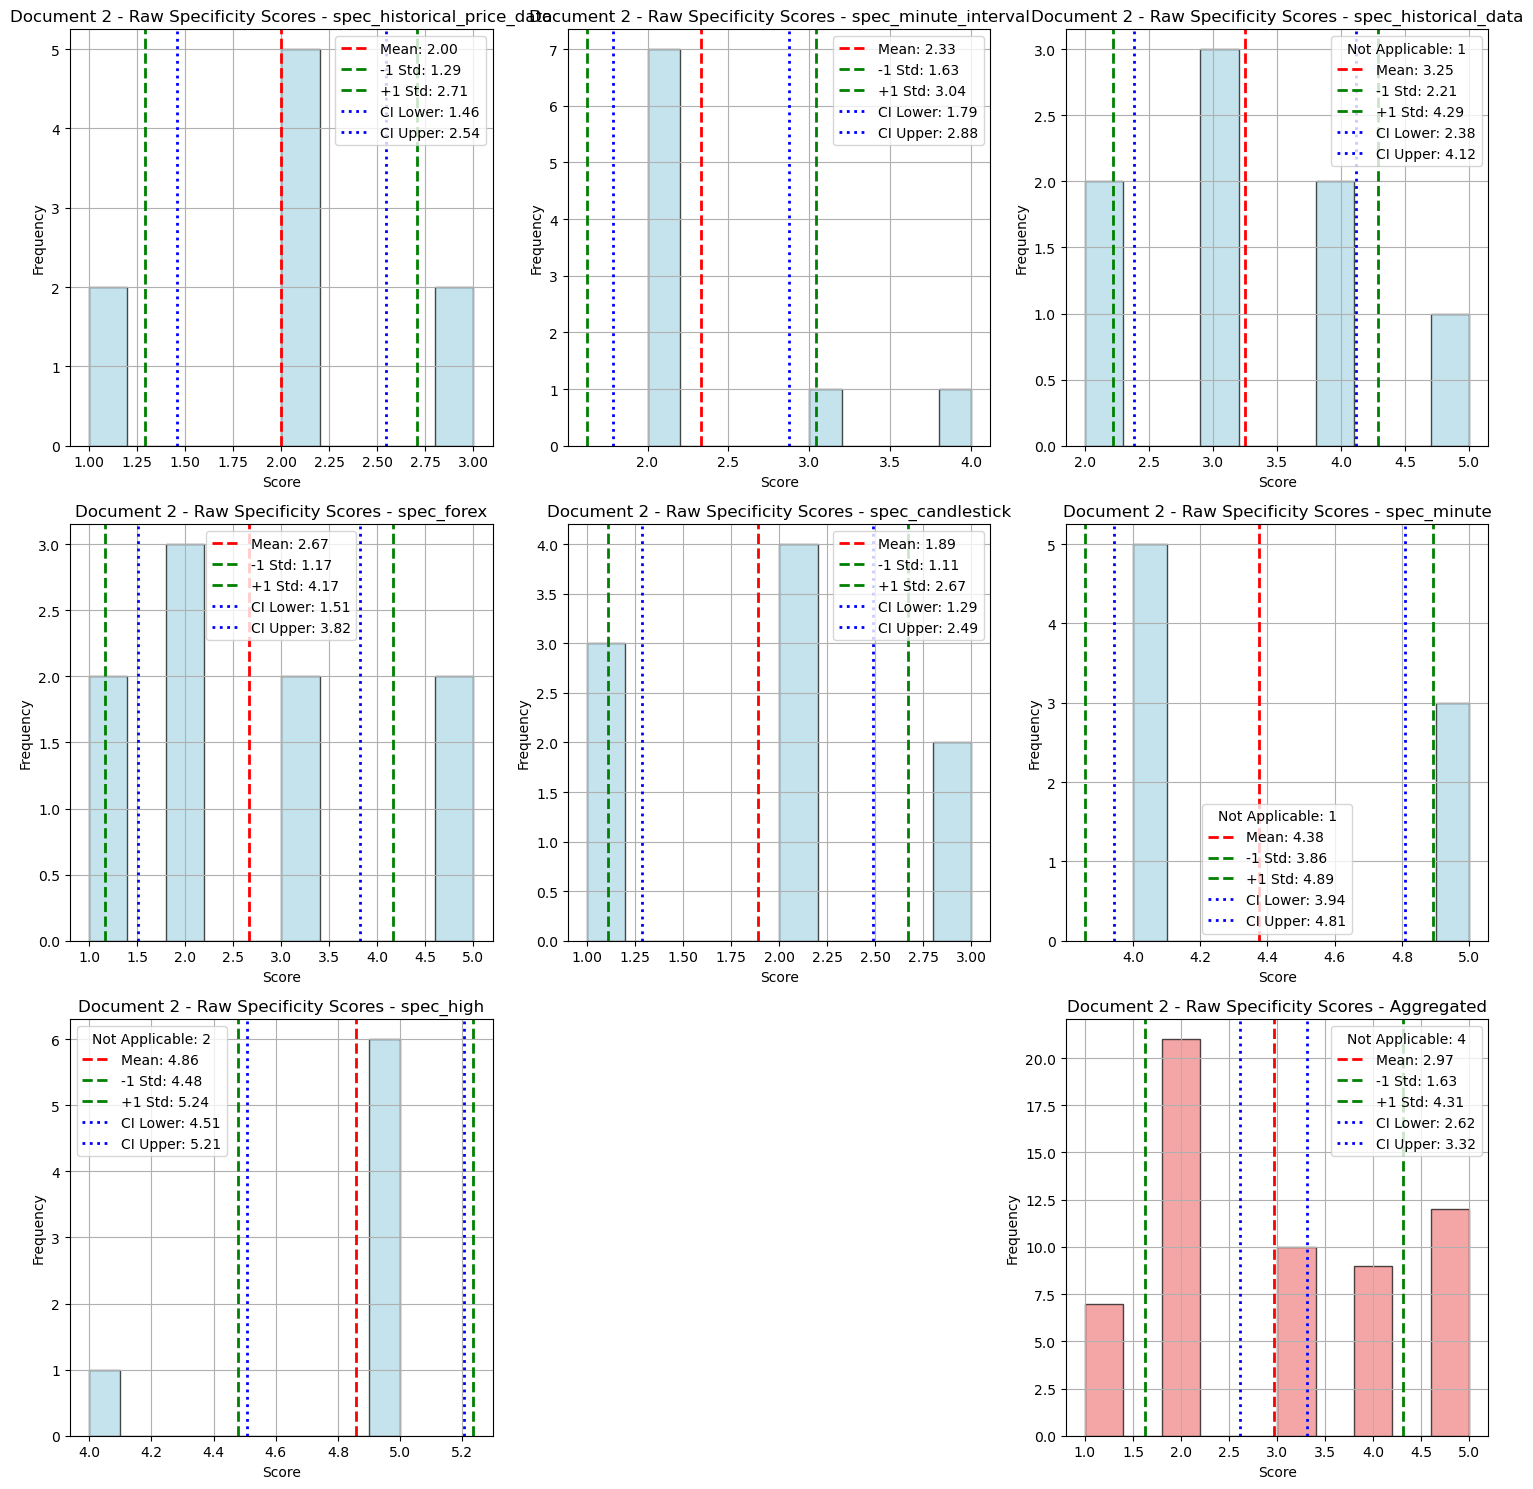

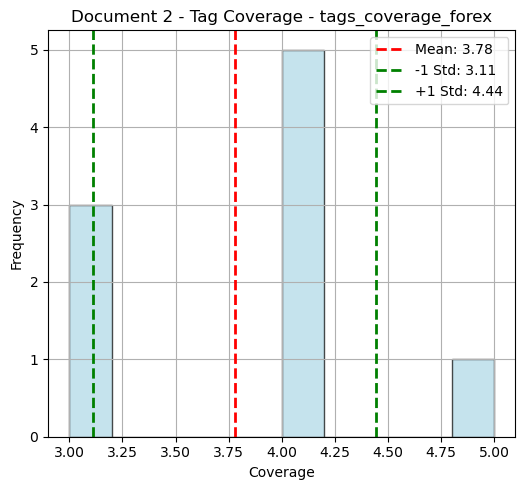

Correlation per Tag:
             Relevance vs Generality  Relevance vs Coverage  \
historical                 -0.056614               0.153093   
minute                     -0.775170               0.697486   
forex                       0.508395               0.319605   
candlestick                -0.112687               0.117851   
high                       -0.534741               0.600613   

             Generality vs Coverage  
historical                -0.342368  
minute                    -0.325300  
forex                      0.220827  
candlestick               -0.258966  
high                      -0.113855  

Overall Correlations:
         Relevance vs Generality  Relevance vs Coverage  \
Overall                 0.059838               0.486513   

         Generality vs Coverage  
Overall               -0.180829  


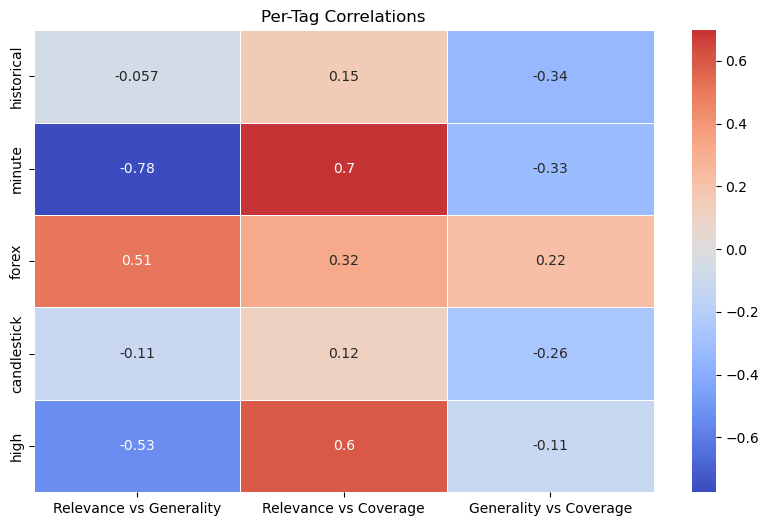

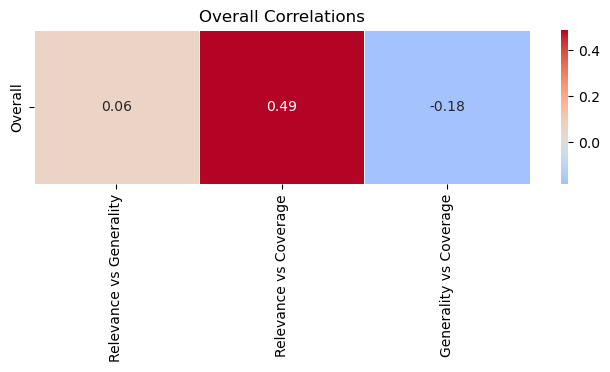


--- Analyzing Document 3 ---
Document 3 Relevance Distribution:
      tag_lung_cancer  tag_cancer  tag_science  tag_cancer_research  \
std          0.440959    0.781736     0.440959             0.527046   
min          4.000000    3.000000     2.000000             4.000000   
max          5.000000    5.000000     3.000000             5.000000   
mean         4.777778    4.111111     2.777778             4.555556   

      tag_biology  tag_medicine  tag_health  
std      0.781736      0.707107    0.707107  
min      2.000000      2.000000    2.000000  
max      4.000000      4.000000    4.000000  
mean     3.111111      3.333333    3.333333  
Document 3 Specificity Distribution:
      spec_lung_cancer  spec_cancer  spec_science  spec_cancer_research  \
std           1.000000     1.130388      0.726483              1.118034   
min           1.000000     1.000000      3.000000              1.000000   
max           4.000000     5.000000      5.000000              5.000000   
mean        

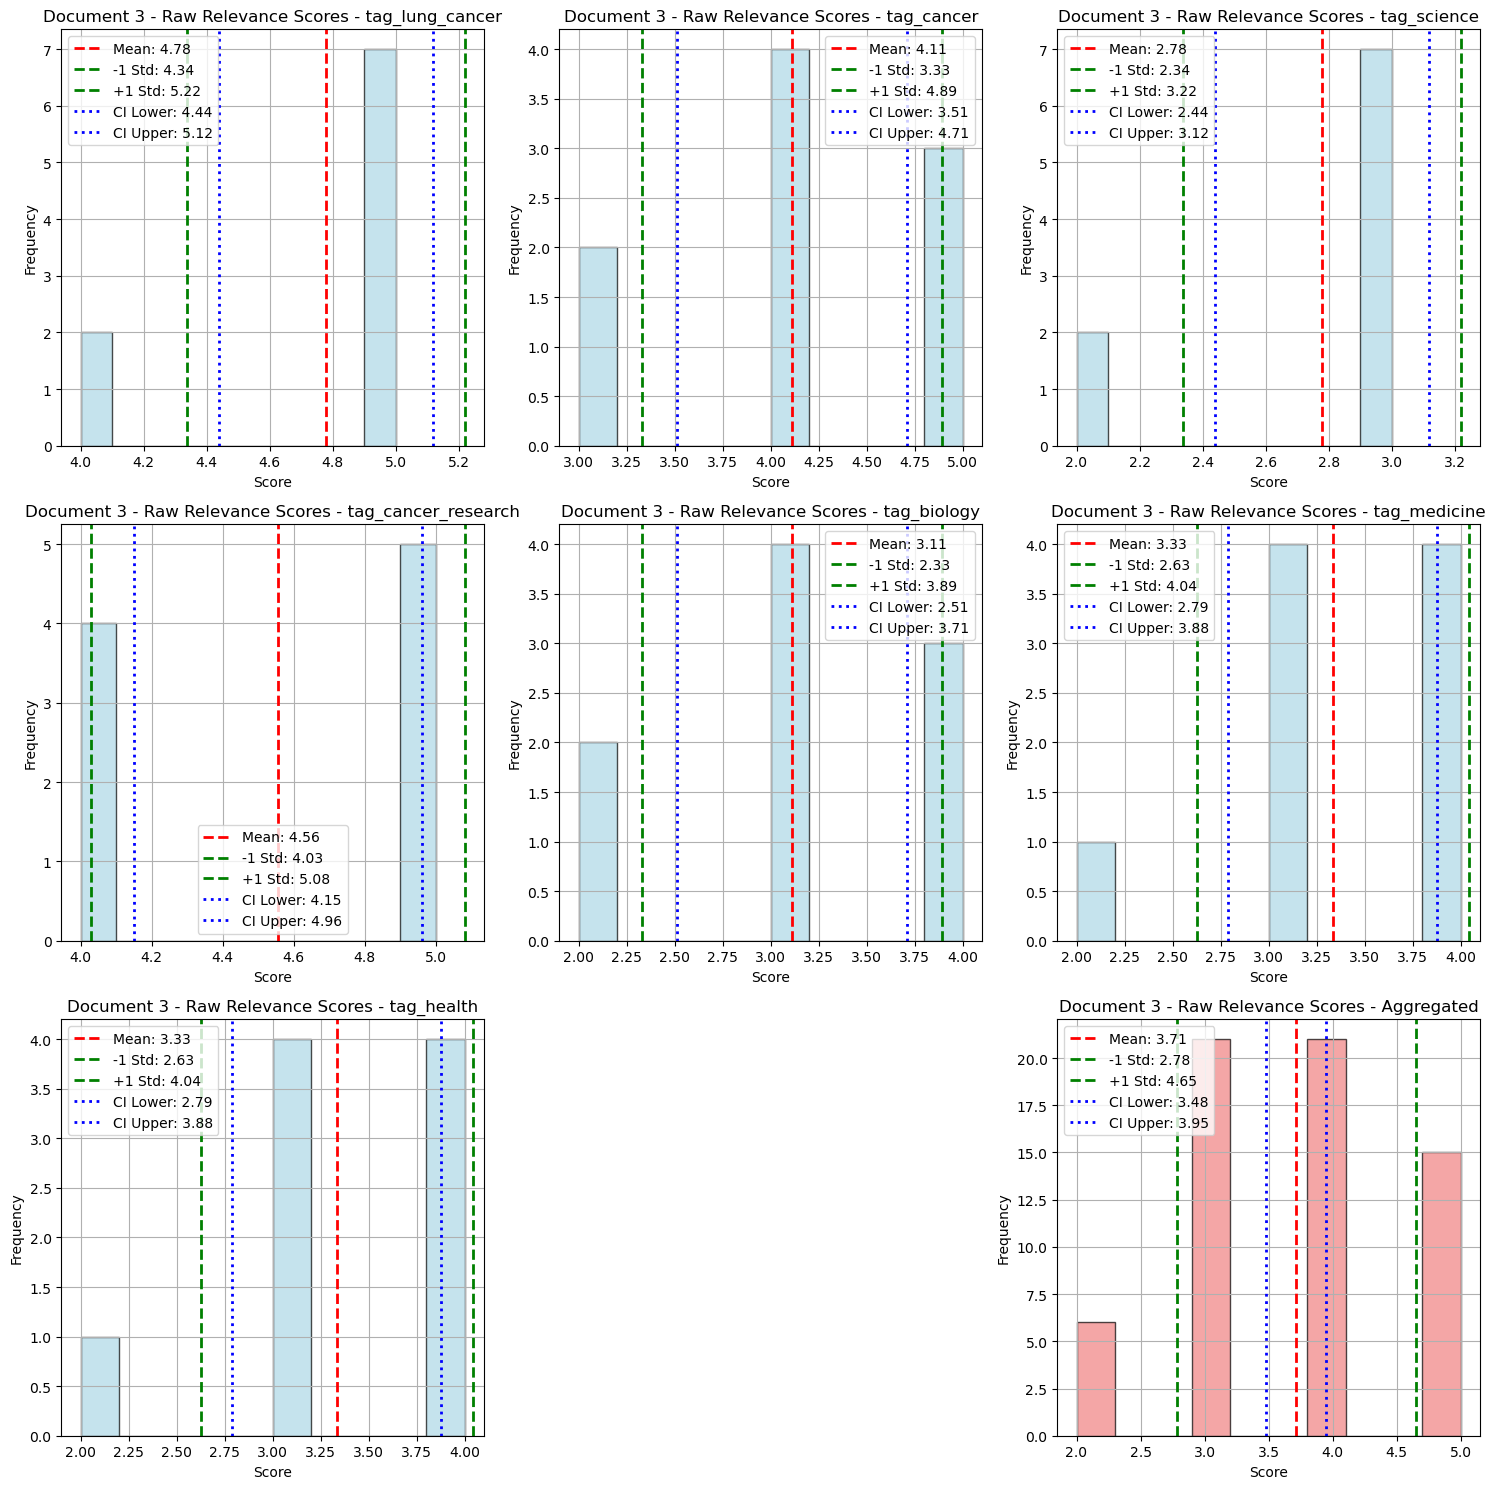

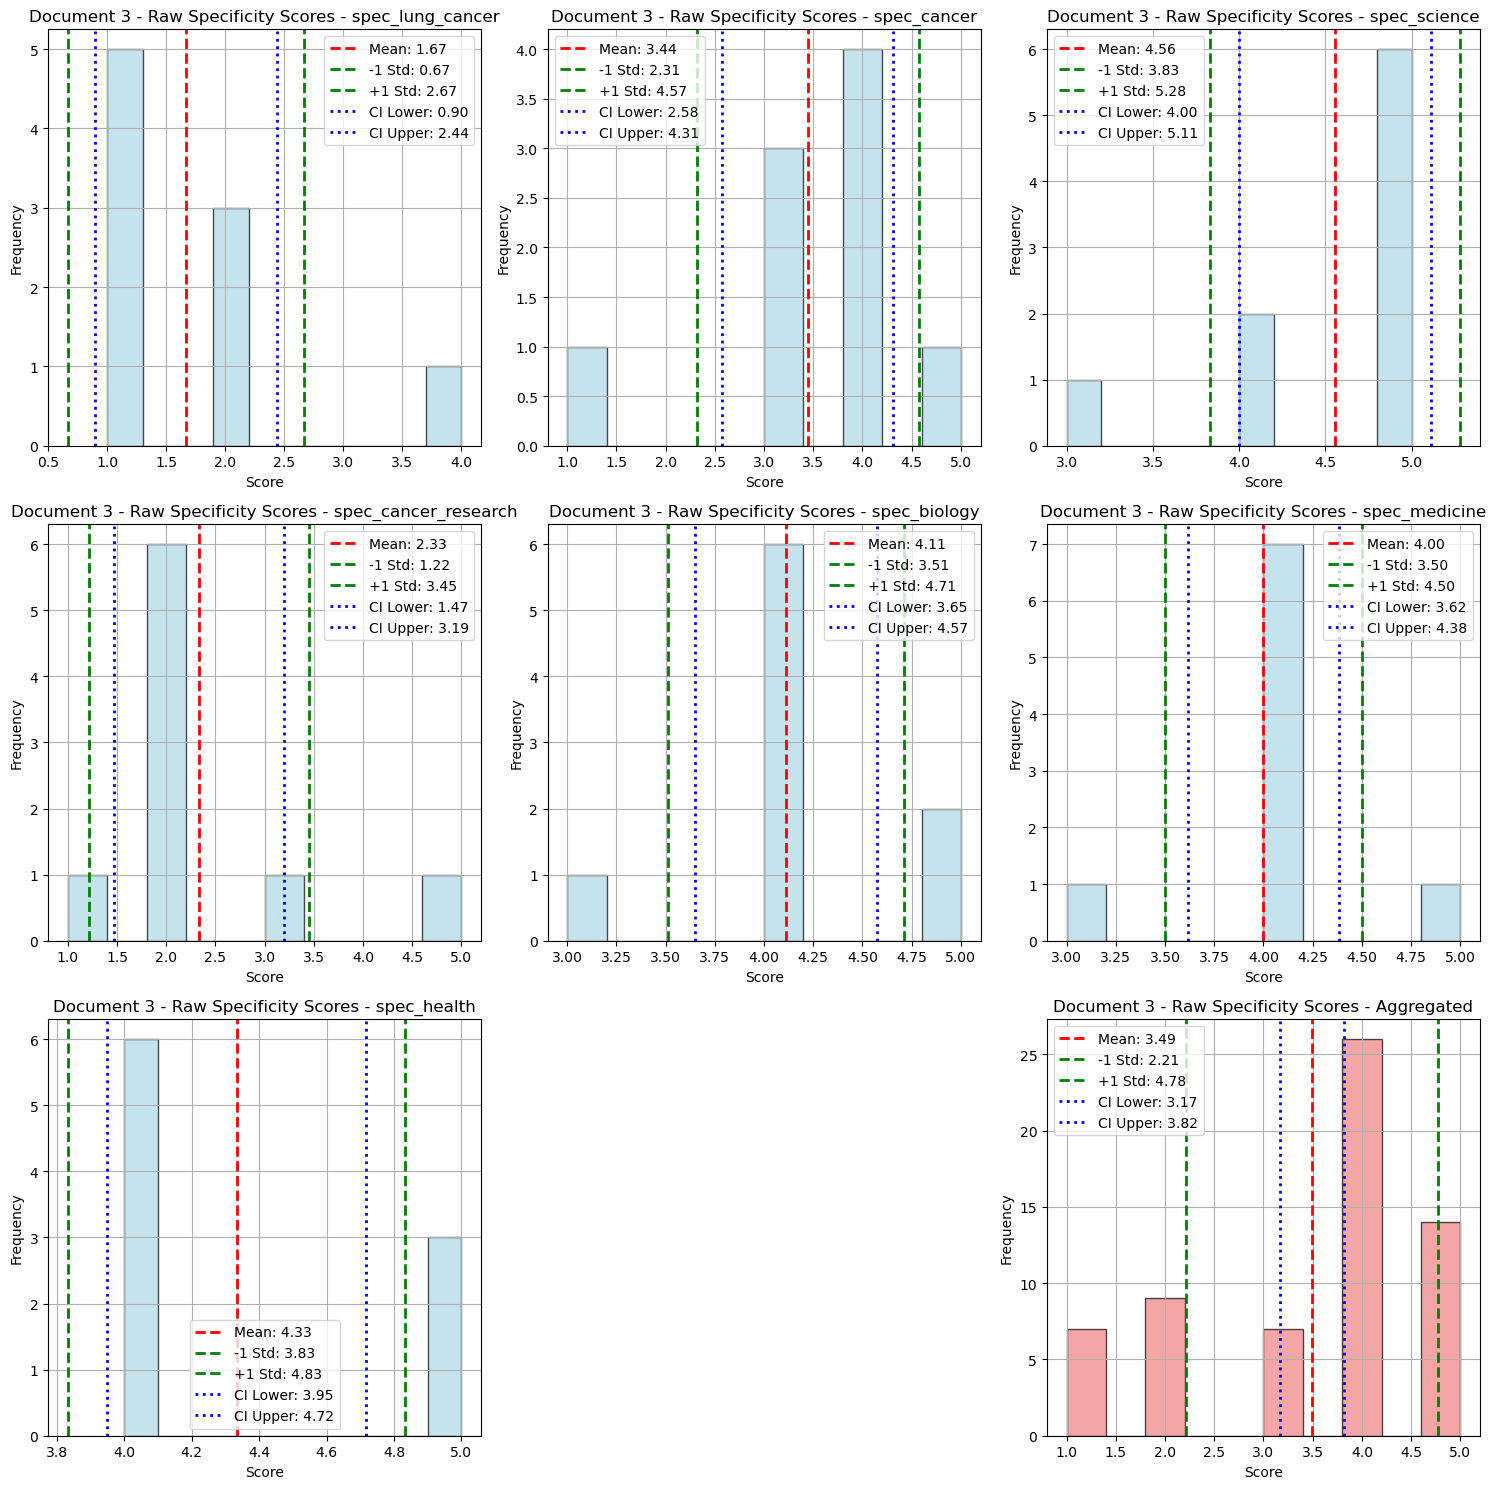

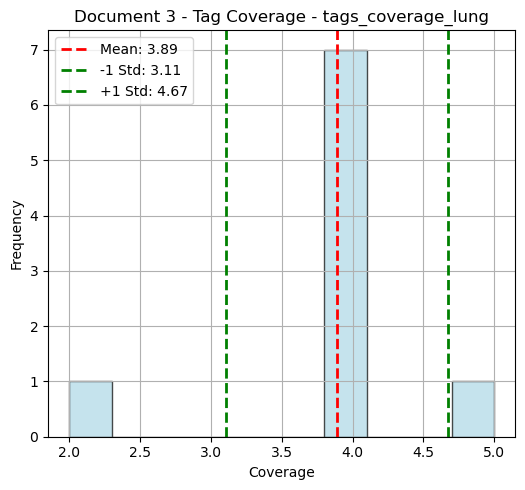

Correlation per Tag:
          Relevance vs Generality  Relevance vs Coverage  \
lung                     0.462910                0.00000   
cancer                  -0.154349                0.00000   
science                 -0.371154                0.00000   
biology                 -0.559017                0.29277   
medicine                -0.250000                0.25000   
health                  -0.700000                0.25000   

          Generality vs Coverage  
lung                   -0.612372  
cancer                 -0.488094  
science                -0.436436  
biology                -0.436436  
medicine               -0.500000  
health                  0.000000  

Overall Correlations:
         Relevance vs Generality  Relevance vs Coverage  \
Overall                     -0.4               0.139876   

         Generality vs Coverage  
Overall               -0.559503  


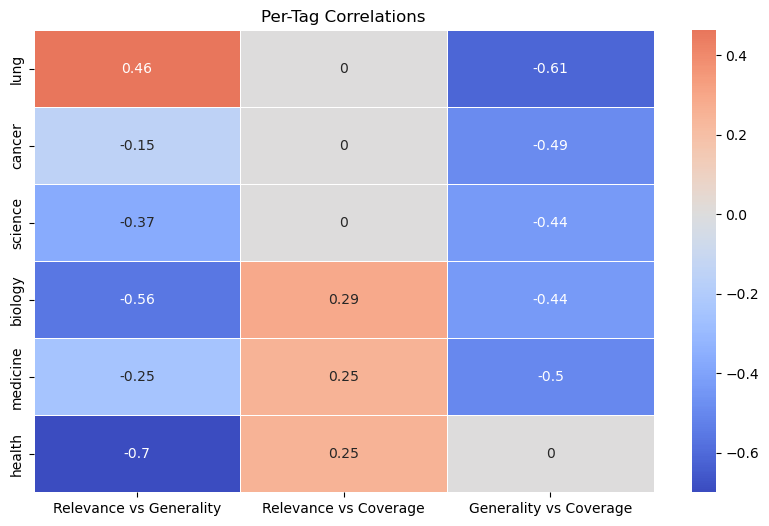

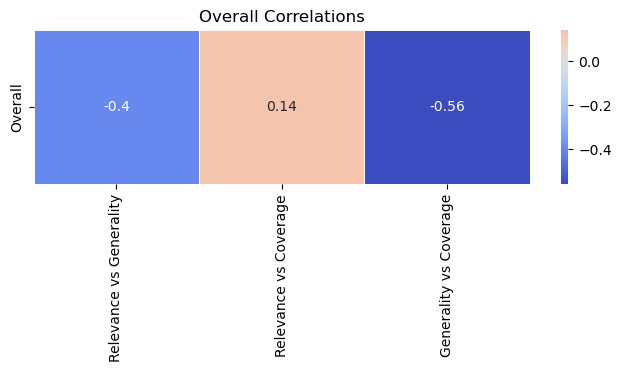

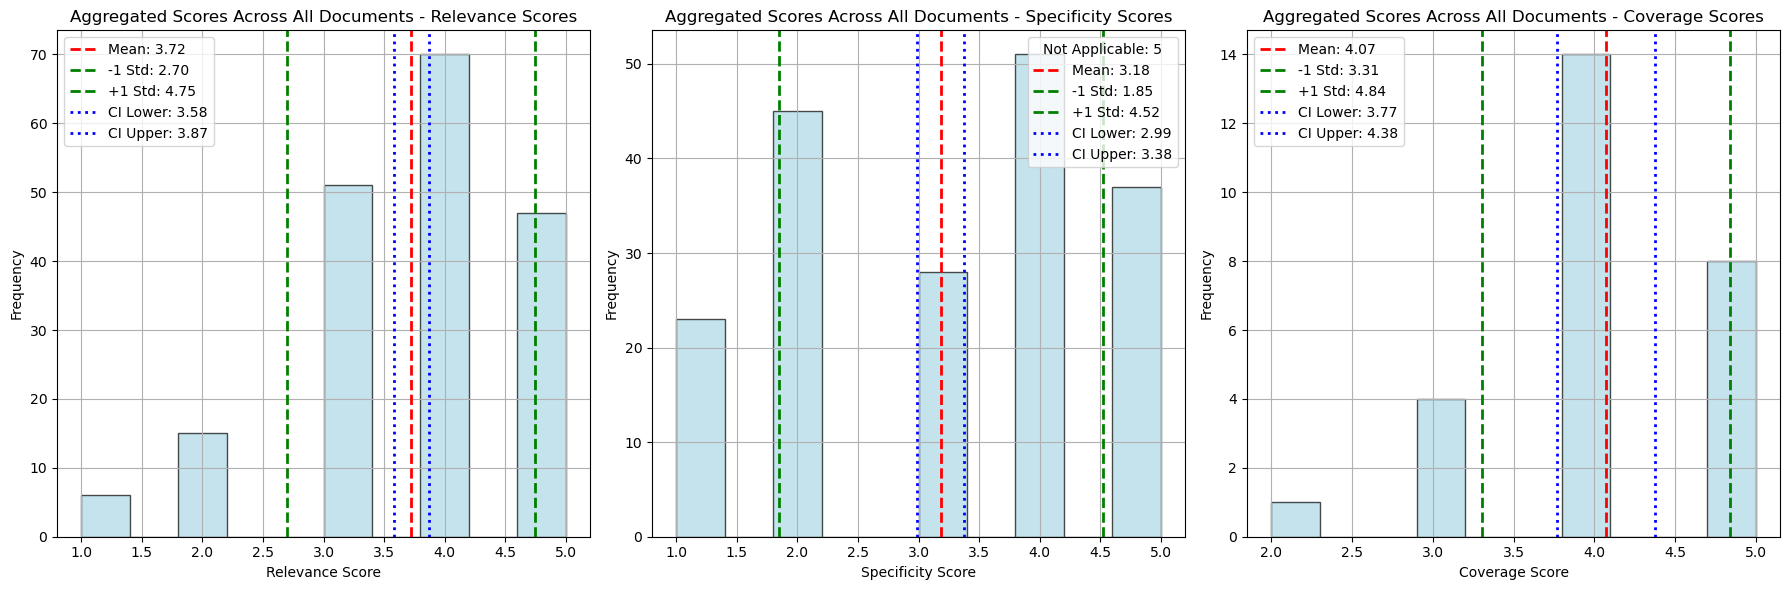

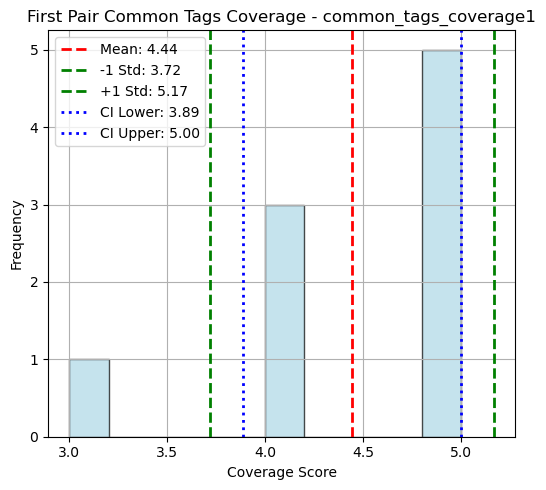

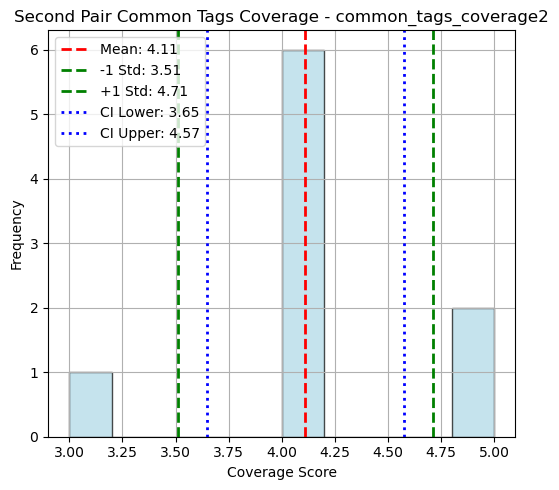


Metrics for First Pair Common Tags:
Accuracy: 0.88
Precision: 0.79
Recall: 0.93
F1-Score: 0.86

Metrics for Second Pair Common Tags:
Accuracy: 0.79
Precision: 0.59
Recall: 0.89
F1-Score: 0.71


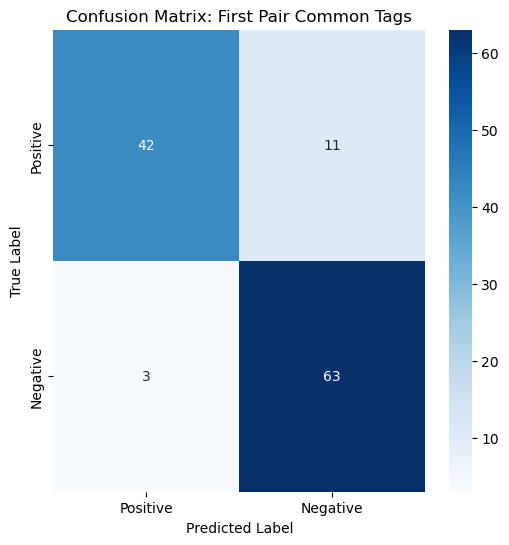

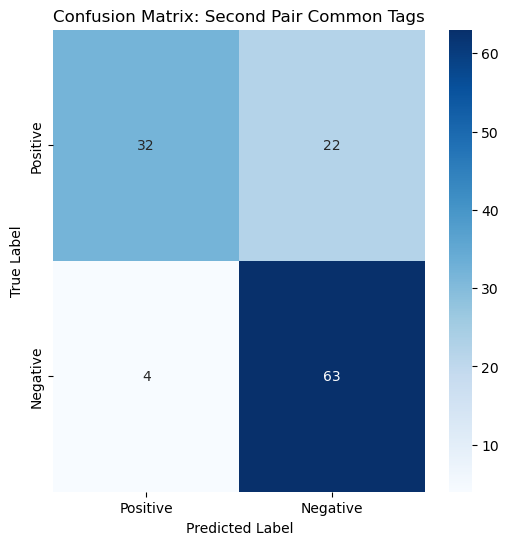

In [172]:
analyze_tags(
    df_model_generated,
    relevance_columns_list=[
        model_first_document_relevance_columns, 
        model_second_document_relevance_columns,
        model_third_document_relevance_columns
    ],
    spec_columns_list=[
        model_first_document_spec_columns, 
        model_second_document_spec_columns,
        model_third_document_spec_columns
    ],
    coverage_columns_list=[
        model_first_document_coverage_columns, 
        model_second_document_coverage_columns,
        model_third_document_coverage_columns
    ],
    suggested_columns_list=[
        model_first_document_suggested_columns,
        model_second_document_suggested_columns,
        model_third_document_suggested_columns
    ],
    common_tags_columns_1=model_first_pair_common_tags_columns,
    common_tags_true_tags_1=model_first_pair_common_tags_true_tags,
    common_tags_coverage_1=model_first_pair_coverage,
    common_tags_columns_2=model_second_pair_common_tags_columns,
    common_tags_true_tags_2=model_second_pair_common_tags_true_tags,
    common_tags_coverage_2=model_second_pair_coverage_columns
)

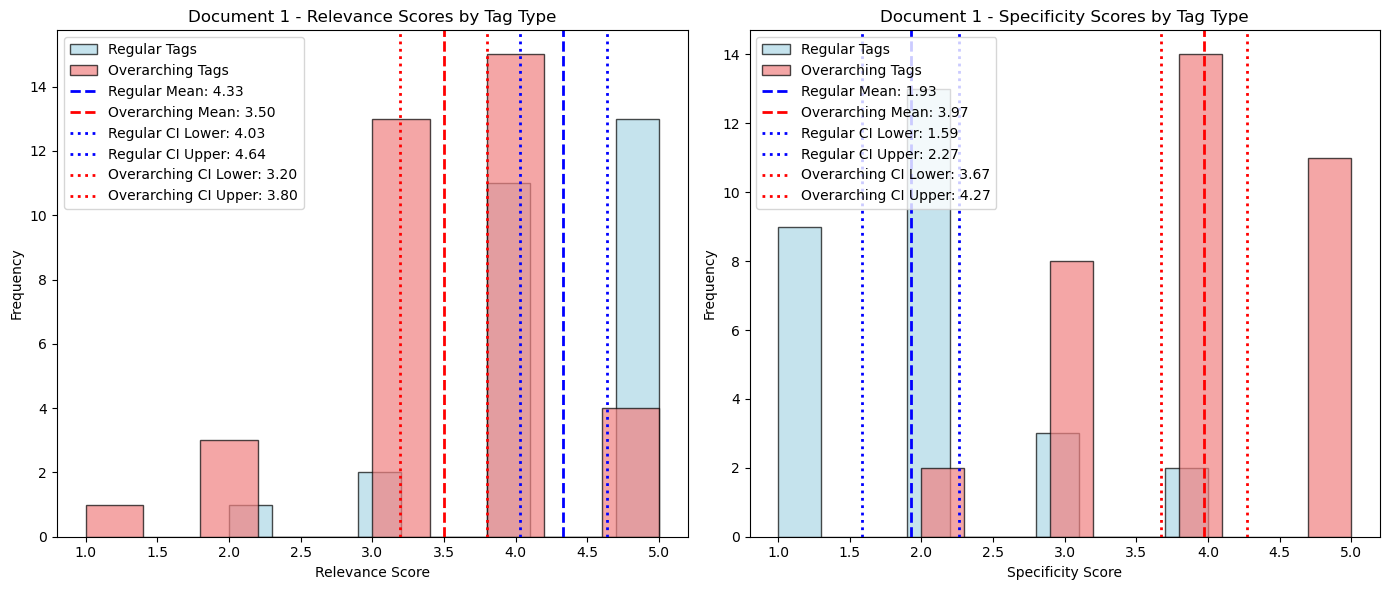

/var/folders/cl/69z7wmcn5xx7cb7wc_xvd8fw0000gn/T/ipykernel_91120/3148357474.py:5: RuntimeWarning: Mean of empty slice.
  mean = data.mean()
/Users/ivang/miniconda3/envs/openml-tags/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/ivang/miniconda3/envs/openml-tags/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/ivang/miniconda3/envs/openml-tags/lib/python3.10/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/ivang/miniconda3/envs/openml-tags/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


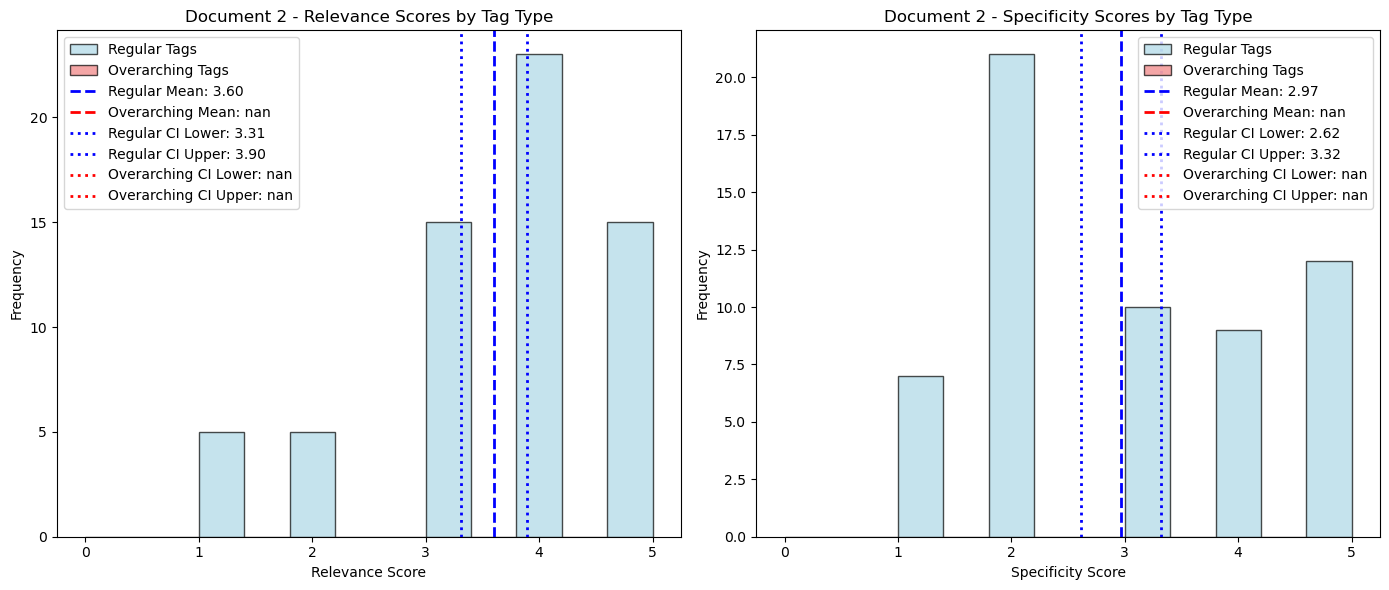

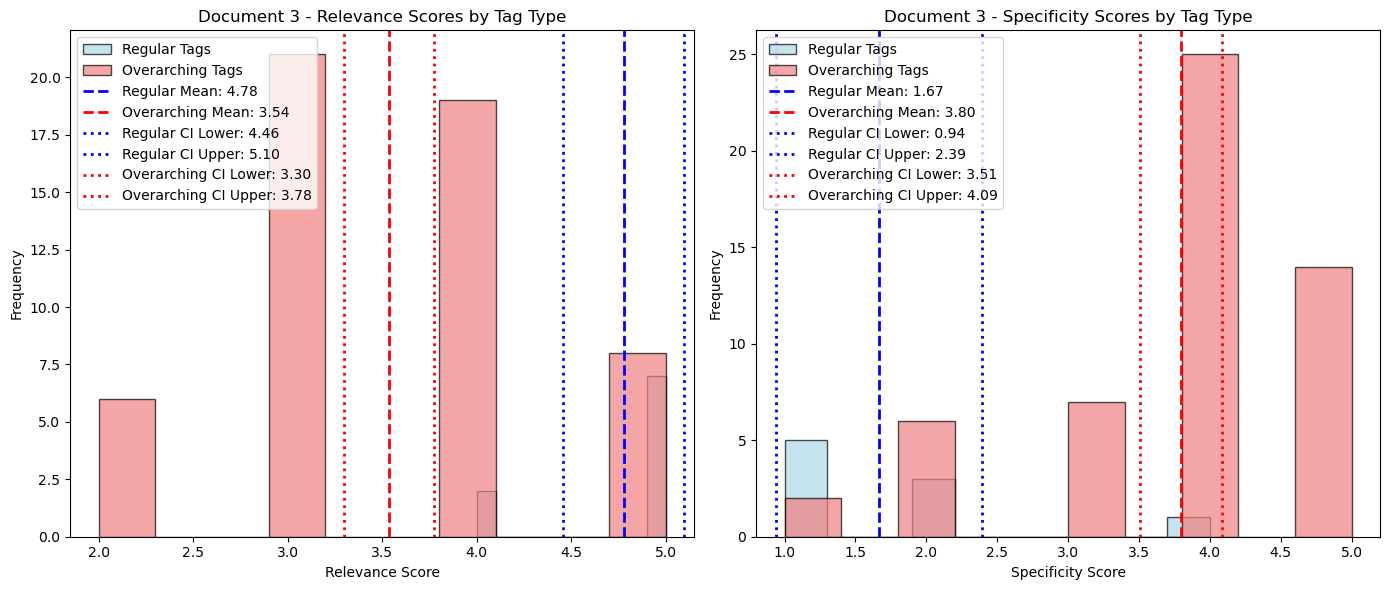

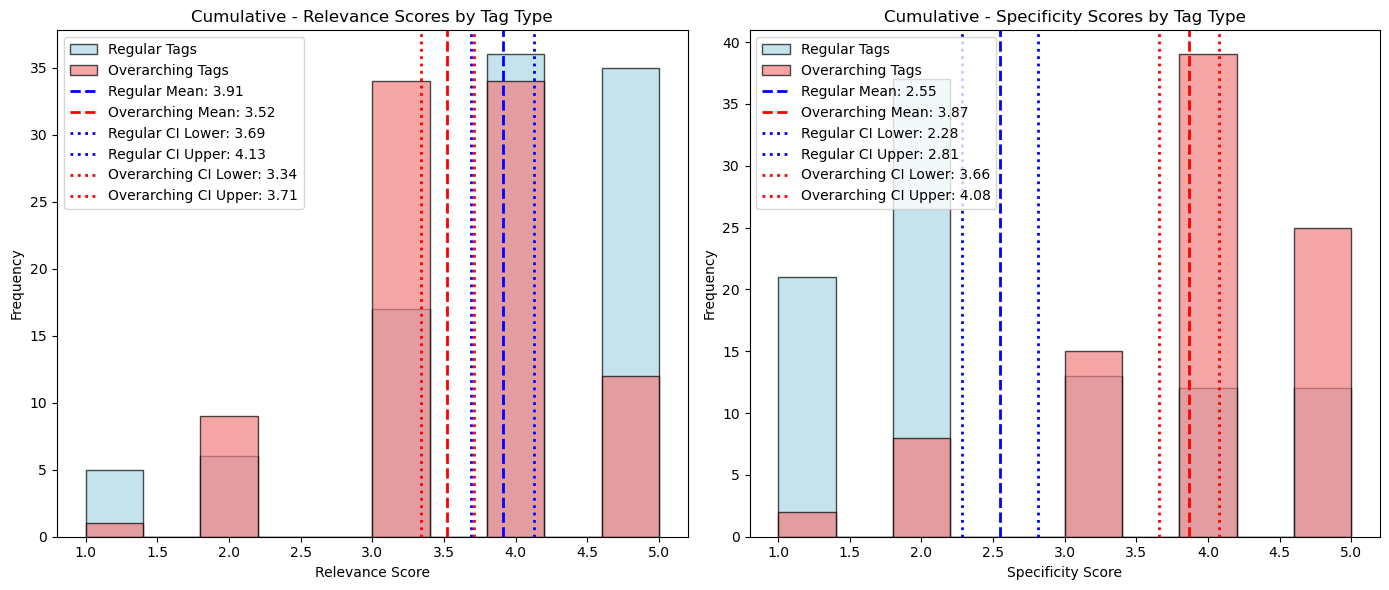

In [173]:
doc_relevance_columns_list = [
    model_first_document_relevance_columns,
    model_second_document_relevance_columns,
    model_third_document_relevance_columns
]

doc_spec_columns_list = [
    model_first_document_spec_columns,
    model_second_document_spec_columns,
    model_third_document_spec_columns
]

doc_tag_types_list = [
    model_first_document_tag_types,
    model_second_document_tag_types,
    model_third_document_tag_types
]

document_names = ['Document 1', 'Document 2', 'Document 3']

# Call the function for all documents and cumulative results
plot_relevance_specificity_multiple_documents(df_model_generated, 
                                              doc_relevance_columns_list, 
                                              doc_spec_columns_list, 
                                              doc_tag_types_list, 
                                              document_names)